# TAHAPAN 1: PREPROCESSING DATA

In [55]:
!pip install ipython-autotime
%load_ext autotime
!pip install category_encoders
!pip install scikit-learn==1.1.3
!pip install missingpy==0.2.0
!pip install scipy

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 25.4 s (started: 2024-10-19 14:06:46 +00:00)


In [56]:
import pandas as pd
import numpy as np
import category_encoders as ce
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

time: 1.09 ms (started: 2024-10-19 14:07:12 +00:00)


### Load Data

In [57]:
train_path = "https://github.com/drtaufiqh/csv-coba-coba/blob/main/train.csv?raw=true"
test_path = "https://github.com/drtaufiqh/csv-coba-coba/blob/main/test_id.csv?raw=true"

time: 607 µs (started: 2024-10-19 14:07:12 +00:00)


In [58]:
train = pd.read_csv(train_path)
train.head()

DataId who_region iso3                                       country_name  \
0       0      4_Eur  ESP                                              Spain   
1       1      4_Eur  ESP                                              Spain   
2       2      5_Emr  IRN                         Iran (Islamic Republic of)   
3       3      4_Eur  TUR                                           T√ºrkiye   
4       4      4_Eur  GBR  United Kingdom of Great Britain and Northern I...   

        city  year pm10_concentration pm25_concentration no2_concentration  \
0    Granada  2010             39.903    Tidak diketahui            40.815   
1    Teguise  2010             21.166              6.707             7.536   
2     Tehran  2010             93.986    Tidak diketahui   Tidak diketahui   
3     Edirne  2010             64.097    Tidak diketahui   Tidak diketahui   
4  Edinburgh  2010             14.213              9.488            27.358   

      pm10_tempcov     pm25_tempcov      no2_tempcov type_of_stations  \
0               93  Tidak diketahui               99        Somewhere   
1               99  Tidak diketahui               97        Somewhere   
2  Tidak diketahui  Tidak diketahui  Tidak diketahui        Somewhere   
3               93  Tidak diketahui  Tidak diketahui        Somewhere   
4  Tidak diketahui               94               99        Somewhere   

   number_of_stations population   latitude  longitude  who_ms  \
0                   1     495901  37.185960  -3.608474       1   
1                   1      21101  28.990311 -13.516550       1   
2                   1    9134708  35.711115  51.421332       1   
3                   1     152628  41.658890  26.585278       1   
4                   1     536775  55.962477  -3.314348       1   

  Air_quality_category  
0               Safety  
1               Safety  
2               Safety  
3               Safety  
4               Safety

time: 1.15 s (started: 2024-10-19 14:07:12 +00:00)


In [59]:
test = pd.read_csv(test_path)
test.head()

DataId who_region iso3 country_name           city  year  \
0   26095      4_Eur  CHE  Switzerland     Langenthal  2018   
1   26096      6_Wpr  CHN        China        Chuzhou  2018   
2   26097      2_Amr  MEX       Mexico    Guadalajara  2018   
3   26098      6_Wpr  CHN        China  Baijiantan Qu  2018   
4   26099      4_Eur  FRA       France      Marseille  2018   

  pm10_concentration pm25_concentration no2_concentration     pm10_tempcov  \
0    Tidak diketahui    Tidak diketahui              13.0  Tidak diketahui   
1    Tidak diketahui              50.05   Tidak diketahui  Tidak diketahui   
2               47.0               25.0   Tidak diketahui  Tidak diketahui   
3    Tidak diketahui             31.802   Tidak diketahui  Tidak diketahui   
4             22.641             12.489            31.348               94   

      pm25_tempcov      no2_tempcov               type_of_stations  \
0  Tidak diketahui  Tidak diketahui                      Somewhere   
1               92  Tidak diketahui                      Somewhere   
2  Tidak diketahui  Tidak diketahui                      Somewhere   
3               96  Tidak diketahui                      Somewhere   
4               97               99  Urban, Urban, Urban, Suburban   

   number_of_stations       population   latitude   longitude  who_ms  
0                   1  Tidak diketahui  47.210826    7.786322       1  
1                   1           522062  32.299925  118.311925       1  
2                   1          5179479  20.666700 -103.333300       1  
3                   1            50422  45.688600   85.118600       1  
4                   4           895431  44.381175    5.930100       1

time: 788 ms (started: 2024-10-19 14:07:13 +00:00)


### Understanding Data

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25999 entries, 0 to 25998
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DataId                25999 non-null  int64  
 1   who_region            25999 non-null  object 
 2   iso3                  25999 non-null  object 
 3   country_name          25999 non-null  object 
 4   city                  25999 non-null  object 
 5   year                  25999 non-null  int64  
 6   pm10_concentration    25999 non-null  object 
 7   pm25_concentration    25999 non-null  object 
 8   no2_concentration     25999 non-null  object 
 9   pm10_tempcov          25999 non-null  object 
 10  pm25_tempcov          25999 non-null  object 
 11  no2_tempcov           25999 non-null  object 
 12  type_of_stations      25999 non-null  object 
 13  number_of_stations    25999 non-null  int64  
 14  population            25999 non-null  object 
 15  latitude           

In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14005 entries, 0 to 14004
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DataId              14005 non-null  int64  
 1   who_region          14005 non-null  object 
 2   iso3                14005 non-null  object 
 3   country_name        14005 non-null  object 
 4   city                14005 non-null  object 
 5   year                14005 non-null  int64  
 6   pm10_concentration  14005 non-null  object 
 7   pm25_concentration  14005 non-null  object 
 8   no2_concentration   14005 non-null  object 
 9   pm10_tempcov        14005 non-null  object 
 10  pm25_tempcov        14005 non-null  object 
 11  no2_tempcov         14005 non-null  object 
 12  type_of_stations    14005 non-null  object 
 13  number_of_stations  14005 non-null  int64  
 14  population          14005 non-null  object 
 15  latitude            14005 non-null  float64
 16  long

In [62]:
train.isna().sum()

DataId                  0
who_region              0
iso3                    0
country_name            0
city                    0
year                    0
pm10_concentration      0
pm25_concentration      0
no2_concentration       0
pm10_tempcov            0
pm25_tempcov            0
no2_tempcov             0
type_of_stations        0
number_of_stations      0
population              0
latitude                0
longitude               0
who_ms                  0
Air_quality_category    0
dtype: int64

time: 20.9 ms (started: 2024-10-19 14:07:14 +00:00)


In [63]:
test.isna().sum()

DataId                0
who_region            0
iso3                  0
country_name          0
city                  0
year                  0
pm10_concentration    0
pm25_concentration    0
no2_concentration     0
pm10_tempcov          0
pm25_tempcov          0
no2_tempcov           0
type_of_stations      0
number_of_stations    0
population            0
latitude              0
longitude             0
who_ms                0
dtype: int64

time: 13.4 ms (started: 2024-10-19 14:07:14 +00:00)


In [64]:
train.describe()

DataId          year  number_of_stations      latitude  \
count  25999.000000  25999.000000        25999.000000  25999.000000   
mean   13055.089350   2014.474672            1.305127     39.610661   
std     7541.119456      2.346176            1.469442     17.127429   
min        0.000000   2010.000000            1.000000    -53.158316   
25%     6514.500000   2013.000000            1.000000     36.962300   
50%    13071.000000   2015.000000            1.000000     43.840800   
75%    19589.500000   2016.000000            1.000000     49.220400   
max    26094.000000   2018.000000           40.000000     69.677498   

          longitude        who_ms  
count  25999.000000  25999.000000  
mean       8.174975      0.998846  
std       57.981313      0.033950  
min     -159.366240      0.000000  
25%       -2.418600      1.000000  
50%        9.668300      1.000000  
75%       21.538783      1.000000  
max      178.450000      1.000000

time: 38.2 ms (started: 2024-10-19 14:07:14 +00:00)


In [65]:
test.describe()

DataId          year  number_of_stations      latitude  \
count  14005.000000  14005.000000        14005.000000  14005.000000   
mean   33091.361728   2019.510746            1.429704     40.853818   
std     4044.289712      1.034662            1.970071     14.667113   
min    24057.000000   2018.000000            1.000000    -53.158300   
25%    29591.000000   2019.000000            1.000000     37.584900   
50%    33092.000000   2019.000000            1.000000     43.822800   
75%    36593.000000   2020.000000            1.000000     49.118267   
max    40094.000000   2022.000000           59.000000     69.655250   

          longitude        who_ms  
count  14005.000000  14005.000000  
mean      14.547747      0.998715  
std       56.940803      0.035829  
min     -159.366240      0.000000  
25%        0.227200      1.000000  
50%       11.904500      1.000000  
75%       26.265200      1.000000  
max      176.883422      1.000000

time: 36 ms (started: 2024-10-19 14:07:14 +00:00)


Mengambil variabel target dari data training

In [66]:
target_var = train.pop('Air_quality_category')
target_var

0        Safety
1        Safety
2        Safety
3        Safety
4        Safety
          ...  
25994    Safety
25995    Safety
25996    Safety
25997    Safety
25998    Safety
Name: Air_quality_category, Length: 25999, dtype: object

time: 9 ms (started: 2024-10-19 14:07:14 +00:00)


In [67]:
target_var.value_counts()

Air_quality_category
Safety       25921
Dangerous       78
Name: count, dtype: int64

time: 8.11 ms (started: 2024-10-19 14:07:14 +00:00)


Menghapus kolom conuntry_name karena sebenarnya sama dengan kolom iso3

In [68]:
train = train.drop(columns=['country_name'])
test = test.drop(columns=['country_name'])

time: 9.29 ms (started: 2024-10-19 14:07:14 +00:00)


Mengecek jumlah masing-masing nilai unik pada setiap variabel yang ada

In [69]:
for var in train.columns:
    print(train[var].value_counts())
    print('--'*45)

DataId
0        1
17420    1
17430    1
17429    1
17428    1
        ..
8696     1
8695     1
8694     1
8693     1
26094    1
Name: count, Length: 25999, dtype: int64
------------------------------------------------------------------------------------------
who_region
4_Eur      17166
2_Amr       4483
6_Wpr       2733
3_Sear      1181
5_Emr        281
1_Afr        125
7_NonMS       30
Name: count, dtype: int64
------------------------------------------------------------------------------------------
iso3
USA    2732
ITA    2498
CHN    2180
ESP    2180
DEU    2113
       ... 
CUB       1
URY       1
MDV       1
TZA       1
UZB       1
Name: count, Length: 109, dtype: int64
------------------------------------------------------------------------------------------
city
Cuenca           14
Santo Andre      13
Salamanca        13
Anyang           12
West Coast       11
                 ..
Buron             1
Mieczyslawow      1
Gaddapotharam     1
Promenade         1
Guangling Qu      1
N

In [70]:
for var in test.columns:
    print(test[var].value_counts())
    print('--'*45)

DataId
26095    1
35436    1
35425    1
35426    1
35427    1
        ..
30767    1
30768    1
30769    1
30770    1
24878    1
Name: count, Length: 14005, dtype: int64
------------------------------------------------------------------------------------------
who_region
4_Eur      9635
6_Wpr      1920
2_Amr      1838
3_Sear      374
5_Emr       143
1_Afr        77
7_NonMS      18
Name: count, dtype: int64
------------------------------------------------------------------------------------------
iso3
CHN    1666
ITA    1537
ESP    1163
USA    1156
DEU    1153
       ... 
LAO       1
DZA       1
KGZ       1
CUB       1
MNG       1
Name: count, Length: 102, dtype: int64
------------------------------------------------------------------------------------------
city
Arad        9
Montana     9
Cuenca      7
Laval       7
Kingston    6
           ..
Manama      1
Xi Xiang    1
Xialu Qu    1
Baohe Qu    1
Rajshahi    1
Name: count, Length: 5315, dtype: int64
----------------------------------

Hapus kolom city karena terlalu banyak kategori, berpotensi mengganggu kestabilan model

In [71]:
train = train.drop(columns=['city'])
test = test.drop(columns=['city'])

time: 10.1 ms (started: 2024-10-19 14:07:14 +00:00)


Mengubah isian Tidak diketahui menjadi nan

In [72]:
columns_to_replace = ['pm10_concentration', 'pm25_concentration', 'no2_concentration',
                      'pm10_tempcov', 'pm25_tempcov', 'no2_tempcov', 'population']

# Mengganti 'Tidak diketahui' dengan NaN
train[columns_to_replace] = train[columns_to_replace].replace('Tidak diketahui', np.nan)
test[columns_to_replace] = test[columns_to_replace].replace('Tidak diketahui', np.nan)

time: 37.1 ms (started: 2024-10-19 14:07:14 +00:00)


In [73]:
# Melihat persentase missing value data training dari tiap-tiap fitur:
missing_values = pd.DataFrame({'Percentage' : (train.isnull().sum()/len(train)) * 100},
                              index=train.columns)
missing_values = missing_values[missing_values['Percentage']>0].sort_values(
    by='Percentage',
    ascending=False)
missing_values.head(10)

Percentage
pm25_tempcov         62.952421
pm25_concentration   49.936536
pm10_tempcov         45.786376
no2_tempcov          43.447825
population           39.674603
no2_concentration    33.912843
pm10_concentration   26.877957

time: 25.3 ms (started: 2024-10-19 14:07:14 +00:00)


In [74]:
# Melihat persentase missing value data testing dari tiap-tiap fitur:
missing_values = pd.DataFrame({'Percentage' : (test.isnull().sum()/len(test)) * 100},
                              index=test.columns)
missing_values = missing_values[missing_values['Percentage']>0].sort_values(
    by='Percentage',
    ascending=False)
missing_values.head(10)

Percentage
population           52.481257
pm25_tempcov         50.589075
pm10_tempcov         40.764013
pm25_concentration   38.229204
no2_tempcov          37.957872
pm10_concentration   31.617280
no2_concentration    30.667619

time: 23.3 ms (started: 2024-10-19 14:07:14 +00:00)


Dari hasil di atas, terlihat bahwa persntase missing value belum ada yang mencapai 70-75%, jadi tidak perlu ada variabel yang di-drop dikarenakan missing value

Memodifikasi isian variabel type_of_stations agar lebih tersturktur sesuai dengan nilai uniknya saja

In [75]:
def get_unique_stations(station):
    # Memisahkan isian berdasarkan koma, menghapus spasi, dan mengubahnya menjadi set untuk mendapatkan nilai unik
    unique_stations = set([s.strip() for s in station.split(',')])
    # Menggabungkan kembali nilai-nilai unik dengan koma sebagai pemisah
    return ', '.join(unique_stations)

time: 741 µs (started: 2024-10-19 14:07:14 +00:00)


In [76]:
train['type_of_stations'] = train['type_of_stations'].apply(get_unique_stations)
train['type_of_stations'].value_counts()

type_of_stations
Somewhere                                                                         12458
Urban                                                                              6227
Rural                                                                              3193
Suburban                                                                           2925
Suburban, Urban                                                                     569
Urban, Suburban                                                                     292
Rural, Urban                                                                        106
Rural, Suburban                                                                      78
Residential And Commercial Area                                                      43
Rural, Suburban, Urban                                                               30
Suburban, Rural, Urban                                                               30
Rural, Urban, Suburban                                                               19
Residential And Commercial Area, Urban Traffic                                       13
Urban, Rural, Suburban                                                               10
Residential And Commercial Area, Urban Traffic/Residential And Commercial Area        4
Industrial, Urban                                                                     1
Rural, Industrial, Urban                                                              1
Name: count, dtype: int64

time: 39.9 ms (started: 2024-10-19 14:07:14 +00:00)


In [77]:
test['type_of_stations'] = test['type_of_stations'].apply(get_unique_stations)
test['type_of_stations'].value_counts()

type_of_stations
Urban                                                                             4511
Somewhere                                                                         4215
Rural                                                                             2264
Suburban                                                                          2005
Suburban, Urban                                                                    403
Urban, Suburban                                                                    209
Background                                                                          76
Rural, Urban                                                                        66
Traffic                                                                             55
Rural, Suburban                                                                     49
Residential And Commercial Area                                                     26
Rural, Suburban, Urban                                                              26
Suburban, Rural, Urban                                                              19
Background, Traffic                                                                 18
Industrial                                                                          16
Rural, Urban, Suburban                                                              14
Residential And Commercial Area, Urban Traffic                                       8
Urban, Rural, Suburban                                                               8
Rural, Industrial, Urban                                                             4
Industrial, Urban                                                                    4
Residential And Commercial Area, Urban Traffic/Residential And Commercial Area       3
Residential                                                                          3
Fond Urbain, Traffic                                                                 2
Residential - industrial                                                             1
Name: count, dtype: int64

time: 44.8 ms (started: 2024-10-19 14:07:14 +00:00)


In [78]:
print('Kolom data training:')
print(train.columns)
print('Kolom data testing:')
print(test.columns)

Kolom data training:
Index(['DataId', 'who_region', 'iso3', 'year', 'pm10_concentration',
       'pm25_concentration', 'no2_concentration', 'pm10_tempcov',
       'pm25_tempcov', 'no2_tempcov', 'type_of_stations', 'number_of_stations',
       'population', 'latitude', 'longitude', 'who_ms'],
      dtype='object')
Kolom data testing:
Index(['DataId', 'who_region', 'iso3', 'year', 'pm10_concentration',
       'pm25_concentration', 'no2_concentration', 'pm10_tempcov',
       'pm25_tempcov', 'no2_tempcov', 'type_of_stations', 'number_of_stations',
       'population', 'latitude', 'longitude', 'who_ms'],
      dtype='object')
time: 5.92 ms (started: 2024-10-19 14:07:14 +00:00)


In [79]:
train = pd.concat([train, target_var], axis=1)
train

DataId who_region iso3  year pm10_concentration pm25_concentration  \
0           0      4_Eur  ESP  2010             39.903                NaN   
1           1      4_Eur  ESP  2010             21.166              6.707   
2           2      5_Emr  IRN  2010             93.986                NaN   
3           3      4_Eur  TUR  2010             64.097                NaN   
4           4      4_Eur  GBR  2010             14.213              9.488   
...       ...        ...  ...   ...                ...                ...   
25994   26090      4_Eur  TUR  2018             38.166             17.921   
25995   26091      4_Eur  ISL  2018              5.612              3.597   
25996   26092      4_Eur  ESP  2018                NaN                NaN   
25997   26093      4_Eur  ESP  2018             29.472                NaN   
25998   26094      2_Amr  USA  2018                NaN                6.1   

      no2_concentration pm10_tempcov pm25_tempcov no2_tempcov  \
0                40.815           93          NaN          99   
1                 7.536           99          NaN          97   
2                   NaN          NaN          NaN         NaN   
3                   NaN           93          NaN         NaN   
4                27.358          NaN           94          99   
...                 ...          ...          ...         ...   
25994            29.412           56           61          39   
25995             1.834          100          100         100   
25996             5.073          NaN          NaN          97   
25997            20.129           97          NaN          98   
25998               NaN          NaN          NaN         NaN   

      type_of_stations  number_of_stations population   latitude  longitude  \
0            Somewhere                   1     495901  37.185960  -3.608474   
1            Somewhere                   1      21101  28.990311 -13.516550   
2            Somewhere                   1    9134708  35.711115  51.421332   
3            Somewhere                   1     152628  41.658890  26.585278   
4            Somewhere                   1     536775  55.962477  -3.314348   
...                ...                 ...        ...        ...        ...   
25994            Urban                   1        NaN  40.726200  31.604900   
25995            Rural                   2        NaN  64.353900 -21.797400   
25996            Rural                   1        NaN  40.691700   0.084700   
25997            Urban                   1      87484  40.629800  -3.171600   
25998        Somewhere                   1      13651  44.443800 -95.817890   

       who_ms Air_quality_category  
0           1               Safety  
1           1               Safety  
2           1               Safety  
3           1               Safety  
4           1               Safety  
...       ...                  ...  
25994       1               Safety  
25995       1               Safety  
25996       1               Safety  
25997       1               Safety  
25998       1               Safety  

[25999 rows x 17 columns]

time: 165 ms (started: 2024-10-19 14:07:14 +00:00)


Mapping atau encode khusus pada variabel target

In [80]:
mapping_target = {
    'Dangerous': 0,
    'Safety': 1
}

train['Air_quality_category'] = train['Air_quality_category'].map(mapping_target)
train

DataId who_region iso3  year pm10_concentration pm25_concentration  \
0           0      4_Eur  ESP  2010             39.903                NaN   
1           1      4_Eur  ESP  2010             21.166              6.707   
2           2      5_Emr  IRN  2010             93.986                NaN   
3           3      4_Eur  TUR  2010             64.097                NaN   
4           4      4_Eur  GBR  2010             14.213              9.488   
...       ...        ...  ...   ...                ...                ...   
25994   26090      4_Eur  TUR  2018             38.166             17.921   
25995   26091      4_Eur  ISL  2018              5.612              3.597   
25996   26092      4_Eur  ESP  2018                NaN                NaN   
25997   26093      4_Eur  ESP  2018             29.472                NaN   
25998   26094      2_Amr  USA  2018                NaN                6.1   

      no2_concentration pm10_tempcov pm25_tempcov no2_tempcov  \
0                40.815           93          NaN          99   
1                 7.536           99          NaN          97   
2                   NaN          NaN          NaN         NaN   
3                   NaN           93          NaN         NaN   
4                27.358          NaN           94          99   
...                 ...          ...          ...         ...   
25994            29.412           56           61          39   
25995             1.834          100          100         100   
25996             5.073          NaN          NaN          97   
25997            20.129           97          NaN          98   
25998               NaN          NaN          NaN         NaN   

      type_of_stations  number_of_stations population   latitude  longitude  \
0            Somewhere                   1     495901  37.185960  -3.608474   
1            Somewhere                   1      21101  28.990311 -13.516550   
2            Somewhere                   1    9134708  35.711115  51.421332   
3            Somewhere                   1     152628  41.658890  26.585278   
4            Somewhere                   1     536775  55.962477  -3.314348   
...                ...                 ...        ...        ...        ...   
25994            Urban                   1        NaN  40.726200  31.604900   
25995            Rural                   2        NaN  64.353900 -21.797400   
25996            Rural                   1        NaN  40.691700   0.084700   
25997            Urban                   1      87484  40.629800  -3.171600   
25998        Somewhere                   1      13651  44.443800 -95.817890   

       who_ms  Air_quality_category  
0           1                     1  
1           1                     1  
2           1                     1  
3           1                     1  
4           1                     1  
...       ...                   ...  
25994       1                     1  
25995       1                     1  
25996       1                     1  
25997       1                     1  
25998       1                     1  

[25999 rows x 17 columns]

time: 149 ms (started: 2024-10-19 14:07:15 +00:00)


Menerapkan target encoding pada variabel-variabel kategorik

In [90]:
# Daftar kolom yang ingin diencode
categorical_columns = ['who_region', 'iso3', 'type_of_stations']

# Misal target kolom adalah 'Air_quality_category'
target_column = 'Air_quality_category'

# Target encoding
encoder = ce.TargetEncoder(cols=categorical_columns)
train_encoded = encoder.fit_transform(train[categorical_columns], train[target_column])
test_encoded = encoder.transform(test[categorical_columns])

# Menggabungkan kembali dengan dataset asli (tanpa kolom target)
train_encoded = pd.concat([train.drop(columns=categorical_columns), train_encoded], axis=1)
test_encoded = pd.concat([test.drop(columns=categorical_columns), test_encoded], axis=1)

time: 176 ms (started: 2024-10-19 15:15:30 +00:00)


In [91]:
print('Kolom data training encoded:')
print(train_encoded.columns)
print('Kolom data testing encoded:')
print(test_encoded.columns)

Kolom data training encoded:
Index(['DataId', 'year', 'pm10_concentration', 'pm25_concentration',
       'no2_concentration', 'pm10_tempcov', 'pm25_tempcov', 'no2_tempcov',
       'number_of_stations', 'population', 'latitude', 'longitude', 'who_ms',
       'Air_quality_category', 'who_region', 'iso3', 'type_of_stations'],
      dtype='object')
Kolom data testing encoded:
Index(['DataId', 'year', 'pm10_concentration', 'pm25_concentration',
       'no2_concentration', 'pm10_tempcov', 'pm25_tempcov', 'no2_tempcov',
       'number_of_stations', 'population', 'latitude', 'longitude', 'who_ms',
       'who_region', 'iso3', 'type_of_stations'],
      dtype='object')
time: 1.85 ms (started: 2024-10-19 15:15:38 +00:00)


### Imputasi Missing Value

In [92]:
train_encoded = train_encoded.drop(columns=['DataId'])
test_encoded = test_encoded.drop(columns=['DataId'])

time: 8.57 ms (started: 2024-10-19 15:15:57 +00:00)


In [93]:
target_var2 = train_encoded.pop('Air_quality_category')

time: 1.37 ms (started: 2024-10-19 15:16:00 +00:00)


In [97]:
n_estimators = 250
imputer = MissForest(n_estimators = n_estimators)

time: 815 µs (started: 2024-10-19 15:18:44 +00:00)


In [98]:
train_imputed = imputer.fit_transform(train_encoded)
train_imputed = pd.DataFrame(train_imputed, columns=train_encoded.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 1


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 3


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 4
time: 14min 19s (started: 2024-10-19 15:19:22 +00:00)


In [99]:
test_imputed = imputer.fit_transform(test_encoded)
test_imputed = pd.DataFrame(test_imputed, columns=test_encoded.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 1


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Iteration: 3
time: 6min (started: 2024-10-19 15:33:42 +00:00)


In [100]:
train_imputed.head()

year  pm10_concentration  pm25_concentration  no2_concentration  \
0  2010.0              39.903           17.601428          40.815000   
1  2010.0              21.166            6.707000           7.536000   
2  2010.0              93.986           37.244984          72.243372   
3  2010.0              64.097           32.354388          25.043496   
4  2010.0              14.213            9.488000          27.358000   

   pm10_tempcov  pm25_tempcov  no2_tempcov  number_of_stations  population  \
0        93.000        71.144       99.000                 1.0    495901.0   
1        99.000        94.688       97.000                 1.0     21101.0   
2        49.864        53.892       36.108                 1.0   9134708.0   
3        93.000        86.528       91.020                 1.0    152628.0   
4        85.864        94.000       99.000                 1.0    536775.0   

    latitude  longitude  who_ms  who_region      iso3  type_of_stations  
0  37.185960  -3.608474     1.0    0.999942  1.000000          0.993819  
1  28.990311 -13.516550     1.0    0.999942  1.000000          0.993819  
2  35.711115  51.421332     1.0    0.957295  0.992366          0.993819  
3  41.658890  26.585278     1.0    0.999942  1.000000          0.993819  
4  55.962477  -3.314348     1.0    0.999942  1.000000          0.993819

time: 57.8 ms (started: 2024-10-19 15:42:43 +00:00)


In [101]:
test_imputed.head()

year  pm10_concentration  pm25_concentration  no2_concentration  \
0  2018.0           13.742948            9.897964          13.000000   
1  2018.0           85.921016           50.050000          22.821556   
2  2018.0           47.000000           25.000000          37.093872   
3  2018.0           56.273076           31.802000          31.386124   
4  2018.0           22.641000           12.489000          31.348000   

   pm10_tempcov  pm25_tempcov  no2_tempcov  number_of_stations   population  \
0        92.844        88.896       93.468                 1.0   132310.036   
1        91.288        92.000       91.472                 1.0   522062.000   
2        85.796        81.816       84.468                 1.0  5179479.000   
3        93.532        96.000       92.772                 1.0    50422.000   
4        94.000        97.000       99.000                 4.0   895431.000   

    latitude   longitude  who_ms  who_region     iso3  type_of_stations  
0  47.210826    7.786322     1.0    0.999942  1.00000          0.993819  
1  32.299925  118.311925     1.0    0.995975  0.99633          0.993819  
2  20.666700 -103.333300     1.0    1.000000  1.00000          0.993819  
3  45.688600   85.118600     1.0    0.995975  0.99633          0.993819  
4  44.381175    5.930100     1.0    0.999942  1.00000          1.000000

time: 52.5 ms (started: 2024-10-19 15:42:44 +00:00)


Menggabungkan data training hasil imputasi dengan target variabel

In [102]:
train_imputed = pd.concat([train_imputed, target_var2], axis=1)
train_imputed.head()

year  pm10_concentration  pm25_concentration  no2_concentration  \
0  2010.0              39.903           17.601428          40.815000   
1  2010.0              21.166            6.707000           7.536000   
2  2010.0              93.986           37.244984          72.243372   
3  2010.0              64.097           32.354388          25.043496   
4  2010.0              14.213            9.488000          27.358000   

   pm10_tempcov  pm25_tempcov  no2_tempcov  number_of_stations  population  \
0        93.000        71.144       99.000                 1.0    495901.0   
1        99.000        94.688       97.000                 1.0     21101.0   
2        49.864        53.892       36.108                 1.0   9134708.0   
3        93.000        86.528       91.020                 1.0    152628.0   
4        85.864        94.000       99.000                 1.0    536775.0   

    latitude  longitude  who_ms  who_region      iso3  type_of_stations  \
0  37.185960  -3.608474     1.0    0.999942  1.000000          0.993819   
1  28.990311 -13.516550     1.0    0.999942  1.000000          0.993819   
2  35.711115  51.421332     1.0    0.957295  0.992366          0.993819   
3  41.658890  26.585278     1.0    0.999942  1.000000          0.993819   
4  55.962477  -3.314348     1.0    0.999942  1.000000          0.993819   

   Air_quality_category  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1

time: 64.5 ms (started: 2024-10-19 15:42:54 +00:00)


In [103]:
train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25999 entries, 0 to 25998
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  25999 non-null  float64
 1   pm10_concentration    25999 non-null  float64
 2   pm25_concentration    25999 non-null  float64
 3   no2_concentration     25999 non-null  float64
 4   pm10_tempcov          25999 non-null  float64
 5   pm25_tempcov          25999 non-null  float64
 6   no2_tempcov           25999 non-null  float64
 7   number_of_stations    25999 non-null  float64
 8   population            25999 non-null  float64
 9   latitude              25999 non-null  float64
 10  longitude             25999 non-null  float64
 11  who_ms                25999 non-null  float64
 12  who_region            25999 non-null  float64
 13  iso3                  25999 non-null  float64
 14  type_of_stations      25999 non-null  float64
 15  Air_quality_categor

In [104]:
test_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14005 entries, 0 to 14004
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                14005 non-null  float64
 1   pm10_concentration  14005 non-null  float64
 2   pm25_concentration  14005 non-null  float64
 3   no2_concentration   14005 non-null  float64
 4   pm10_tempcov        14005 non-null  float64
 5   pm25_tempcov        14005 non-null  float64
 6   no2_tempcov         14005 non-null  float64
 7   number_of_stations  14005 non-null  float64
 8   population          14005 non-null  float64
 9   latitude            14005 non-null  float64
 10  longitude           14005 non-null  float64
 11  who_ms              14005 non-null  float64
 12  who_region          14005 non-null  float64
 13  iso3                14005 non-null  float64
 14  type_of_stations    14005 non-null  float64
dtypes: float64(15)
memory usage: 1.6 MB
time: 8.36 ms (st

Membulatkan hasil imputasi

In [105]:
int_components = ['year','number_of_stations', 'population','who_ms']

train_imputed[int_components] = train_imputed[int_components].astype('int')
test_imputed[int_components] = test_imputed[int_components].astype('int')

time: 10.8 ms (started: 2024-10-19 15:43:19 +00:00)


### Simpan Hasil Preprocessing

In [ ]:
train_imputed.to_csv('train_clean.csv', index=False)
test_imputed.to_csv('test_clean.csv', index=False)

time: 347 ms (started: 2024-10-19 05:20:59 +00:00)


# TAHAPAN 2: ANALISIS DATA EKSPLORATIF

In [ ]:
!pip install hvplot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

Definisikan path dan variabel target

In [ ]:
# Definisikan link URL data train
train_path ='https://github.com/drtaufiqh/csv-coba-coba/blob/main/train_clean.csv?raw=true'
kolom_target = 'Air_quality_category'
test_path ='https://github.com/drtaufiqh/csv-coba-coba/blob/main/test_clean.csv?raw=true'

#**A. EXPLORATORY DATA ANALYSIS FOR DATA TRAINING**

---





#**1. IMPORT DATA**

## 1.1 Baca Data

In [ ]:
# Baca data
df = pd.read_csv(train_path)
df.head()

year  pm10_concentration  pm25_concentration  no2_concentration  \
0  2010              39.903           17.912924          40.815000   
1  2010              21.166            6.707000           7.536000   
2  2010              93.986           38.193936          69.274356   
3  2010              64.097           37.167284          24.051136   
4  2010              14.213            9.488000          27.358000   

   pm10_tempcov  pm25_tempcov  no2_tempcov  number_of_stations  population  \
0        93.000        61.204       99.000                   1      495901   
1        99.000        93.604       97.000                   1       21101   
2        62.652        53.436       35.192                   1     9134708   
3        93.000        87.232       92.580                   1      152628   
4        85.752        94.000       99.000                   1      536775   

    latitude  longitude  who_ms  who_region      iso3  type_of_stations  \
0  37.185960  -3.608474       1    0.999942  1.000000          0.993819   
1  28.990311 -13.516550       1    0.999942  1.000000          0.993819   
2  35.711115  51.421332       1    0.957295  0.992366          0.993819   
3  41.658890  26.585278       1    0.999942  1.000000          0.993819   
4  55.962477  -3.314348       1    0.999942  1.000000          0.993819   

   Air_quality_category  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1

## 1.2 Informasi Data

###1.2.1 Dimensi Data

In [ ]:
# Tampilkan dimensi data
df.shape

(25999, 16)

###1.2.2 Kolom Data

In [ ]:
# Tampilkan kolom data
df.columns

Index(['year', 'pm10_concentration', 'pm25_concentration', 'no2_concentration',
       'pm10_tempcov', 'pm25_tempcov', 'no2_tempcov', 'number_of_stations',
       'population', 'latitude', 'longitude', 'who_ms', 'who_region', 'iso3',
       'type_of_stations', 'Air_quality_category'],
      dtype='object')

###1.2.3 Tipe Data

In [ ]:
# Tampilkan tipe variabel pada data
df.dtypes

year                      int64
pm10_concentration      float64
pm25_concentration      float64
no2_concentration       float64
pm10_tempcov            float64
pm25_tempcov            float64
no2_tempcov             float64
number_of_stations        int64
population                int64
latitude                float64
longitude               float64
who_ms                    int64
who_region              float64
iso3                    float64
type_of_stations        float64
Air_quality_category      int64
dtype: object

###1.2.4 Cek Missing Value

In [ ]:
# Cek missing value
df.isna().sum()

year                    0
pm10_concentration      0
pm25_concentration      0
no2_concentration       0
pm10_tempcov            0
pm25_tempcov            0
no2_tempcov             0
number_of_stations      0
population              0
latitude                0
longitude               0
who_ms                  0
who_region              0
iso3                    0
type_of_stations        0
Air_quality_category    0
dtype: int64

###1.2.5 Rincian Data

In [ ]:
# Informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25999 entries, 0 to 25998
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  25999 non-null  int64  
 1   pm10_concentration    25999 non-null  float64
 2   pm25_concentration    25999 non-null  float64
 3   no2_concentration     25999 non-null  float64
 4   pm10_tempcov          25999 non-null  float64
 5   pm25_tempcov          25999 non-null  float64
 6   no2_tempcov           25999 non-null  float64
 7   number_of_stations    25999 non-null  int64  
 8   population            25999 non-null  int64  
 9   latitude              25999 non-null  float64
 10  longitude             25999 non-null  float64
 11  who_ms                25999 non-null  int64  
 12  who_region            25999 non-null  float64
 13  iso3                  25999 non-null  float64
 14  type_of_stations      25999 non-null  float64
 15  Air_quality_categor

#**2. RINGKASAN STATISTIK**

In [ ]:
# Ringkasan statistik semua variabel
df.describe()

year  pm10_concentration  pm25_concentration  \
count  25999.000000        25999.000000        25999.000000   
mean    2014.474672           33.234304           19.281049   
std        2.346176           31.205671           17.350599   
min     2010.000000            0.730000            1.000000   
25%     2013.000000           17.032000            9.824098   
50%     2015.000000           22.221000           13.800000   
75%     2016.000000           34.994500           21.505090   
max     2018.000000          540.000000          436.440000   

       no2_concentration  pm10_tempcov  pm25_tempcov   no2_tempcov  \
count       25999.000000  25999.000000  25999.000000  25999.000000   
mean           21.148635     86.158182     84.449698     70.605307   
std            13.428265     19.194017     19.660803     36.271368   
min             0.004000      0.000000      0.000000      0.000000   
25%            12.209658     83.602000     81.764000     51.850000   
50%            18.893000     93.000000     91.000000     92.000000   
75%            27.199000     97.284000     96.000000     97.000000   
max           210.675000    100.000000    100.000000    100.000000   

       number_of_stations    population      latitude     longitude  \
count        25999.000000  2.599900e+04  25999.000000  25999.000000   
mean             1.305127  5.699121e+05     39.610661      8.174975   
std              1.469442  1.712923e+06     17.127429     57.981313   
min              1.000000  6.000000e+00    -53.158316   -159.366240   
25%              1.000000  6.910500e+04     36.962300     -2.418600   
50%              1.000000  1.169940e+05     43.840800      9.668300   
75%              1.000000  4.003200e+05     49.220400     21.538783   
max             40.000000  3.739313e+07     69.677498    178.450000   

             who_ms    who_region          iso3  type_of_stations  \
count  25999.000000  25999.000000  25999.000000      25999.000000   
mean       0.998846      0.996999      0.997367          0.996998   
std        0.033950      0.010363      0.011644          0.003051   
min        0.000000      0.954276      0.840317          0.993819   
25%        1.000000      0.999942      0.999987          0.993819   
50%        1.000000      0.999942      1.000000          0.999658   
75%        1.000000      0.999942      1.000000          1.000000   
max        1.000000      1.000000      1.000000          1.000000   

       Air_quality_category  
count          25999.000000  
mean               0.997000  
std                0.054692  
min                0.000000  
25%                1.000000  
50%                1.000000  
75%                1.000000  
max                1.000000

In [ ]:
# # Memilih kolom numerik secara otomatis
# num = df.select_dtypes(include=['number']).columns.tolist()

# # Menghapus "tahun_kelahiran" dari list num jika kolom tersebut ada
# if 'tahun_kelahiran' in num:
#     num.remove('tahun_kelahiran')

# num = ['pendapatan','jumlah_anak_balita', 'jumlah_anak_remaja', 'terakhir_belanja', 'belanja_buah', 'belanja_daging',	'belanja_ikan', 'belanja_kue', 'pembelian_diskon', 'pembelian_web',	'pembelian_toko','keluhan','day_after']
num = ['year',
        'pm10_concentration',
        'pm25_concentration',
        'no2_concentration',
        'pm10_tempcov',
        'pm25_tempcov',
        'no2_tempcov',
        'number_of_stations',
        'population',
        'latitude',
        'longitude',
        # 'who_ms',
        # 'who_region',
        # 'iso3',
        # 'type_of_stations',
        'Air_quality_category']
df_num = df[num]
df_num.describe()

year  pm10_concentration  pm25_concentration  \
count  25999.000000        25999.000000        25999.000000   
mean    2014.474672           33.234304           19.281049   
std        2.346176           31.205671           17.350599   
min     2010.000000            0.730000            1.000000   
25%     2013.000000           17.032000            9.824098   
50%     2015.000000           22.221000           13.800000   
75%     2016.000000           34.994500           21.505090   
max     2018.000000          540.000000          436.440000   

       no2_concentration  pm10_tempcov  pm25_tempcov   no2_tempcov  \
count       25999.000000  25999.000000  25999.000000  25999.000000   
mean           21.148635     86.158182     84.449698     70.605307   
std            13.428265     19.194017     19.660803     36.271368   
min             0.004000      0.000000      0.000000      0.000000   
25%            12.209658     83.602000     81.764000     51.850000   
50%            18.893000     93.000000     91.000000     92.000000   
75%            27.199000     97.284000     96.000000     97.000000   
max           210.675000    100.000000    100.000000    100.000000   

       number_of_stations    population      latitude     longitude  \
count        25999.000000  2.599900e+04  25999.000000  25999.000000   
mean             1.305127  5.699121e+05     39.610661      8.174975   
std              1.469442  1.712923e+06     17.127429     57.981313   
min              1.000000  6.000000e+00    -53.158316   -159.366240   
25%              1.000000  6.910500e+04     36.962300     -2.418600   
50%              1.000000  1.169940e+05     43.840800      9.668300   
75%              1.000000  4.003200e+05     49.220400     21.538783   
max             40.000000  3.739313e+07     69.677498    178.450000   

       Air_quality_category  
count          25999.000000  
mean               0.997000  
std                0.054692  
min                0.000000  
25%                1.000000  
50%                1.000000  
75%                1.000000  
max                1.000000

#**3. EKSPLORASI DATA**

##3.1 Distribusi jumlah tiap label

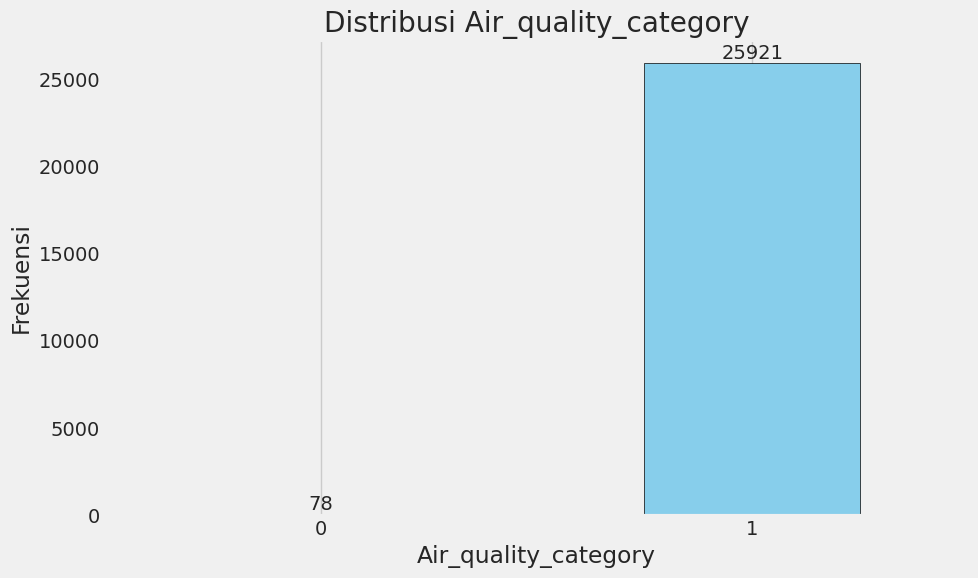

In [ ]:
# Menghitung jumlah observasi untuk setiap nilai dalam variabel kolom_target
kolom_target_counts = df[kolom_target].value_counts().sort_index()
# Plot bar chart
plt.figure(figsize=(10, 6))
kolom_target_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribusi '+kolom_target)
plt.xlabel(kolom_target)
plt.ylabel('Frekuensi')
plt.grid(axis='y')
# Menambahkan label nilai frekuensi di atas setiap bar
for i, value in enumerate(kolom_target_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


##3.2 Boxplot dan cek *outlier* tiap variabel

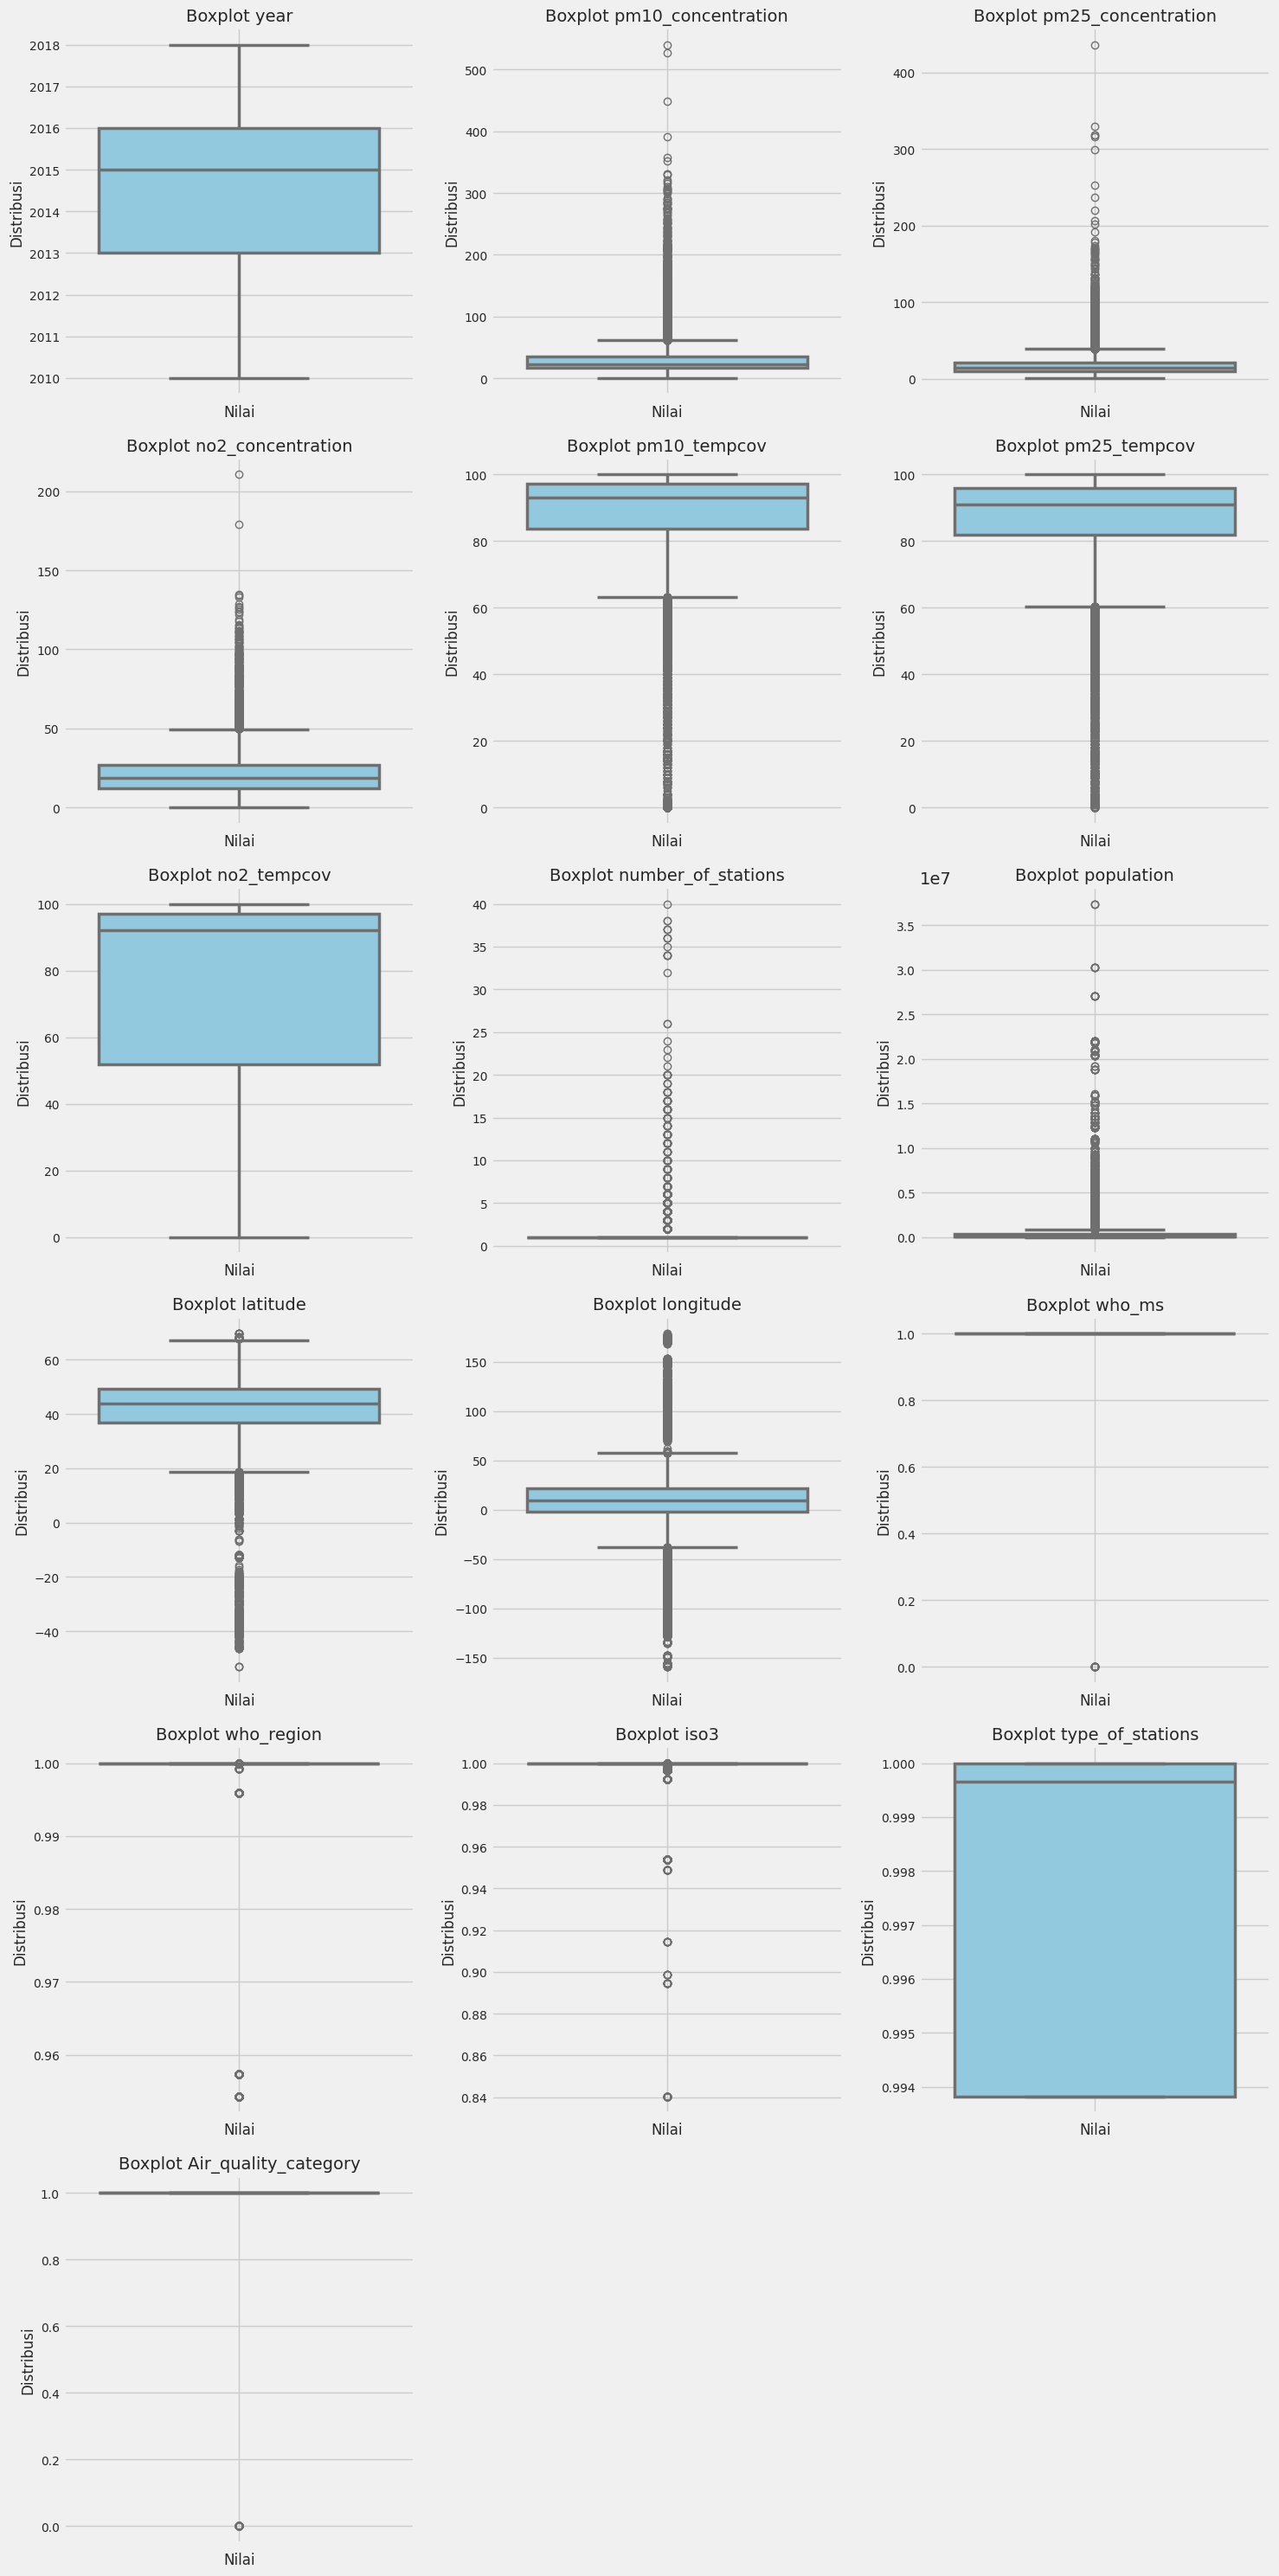

In [ ]:
# Menentukan jumlah baris dan kolom subplot yang sesuai
num_rows = (len(df.columns) - 1) // 3 + 1
num_cols = min(len(df.columns), 3)

# Membuat satu figure untuk semua boxplot
plt.figure(figsize=(15, 5 * num_rows))

# Iterasi melalui setiap kolom dan membuat boxplot di subplot yang sesuai
for i, column in enumerate(df.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=df[column], color='skyblue', linewidth=2.5)
    plt.title(f'Boxplot {column}', fontsize=14)
    plt.xlabel('Nilai', fontsize=12)
    plt.ylabel('Distribusi', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)  # Rotasi label sumbu x agar lebih mudah dibaca
    plt.yticks(fontsize=10)  # Ukuran font untuk label sumbu y
    plt.grid(True)  # Menambahkan grid

plt.tight_layout()
plt.show()


Membuat Sebaran Data berdasarkan Kategori Kualitas Udara

<ipython-input-14-f83571556ab3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=kolom_target, y=column, data=df, palette='Set2', linewidth=2.5)
<ipython-input-14-f83571556ab3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=kolom_target, y=column, data=df, palette='Set2', linewidth=2.5)
<ipython-input-14-f83571556ab3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=kolom_target, y=column, data=df, palette='Set2', linewidth=2.5)
<ipython-input-14-f83571556ab3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is depre

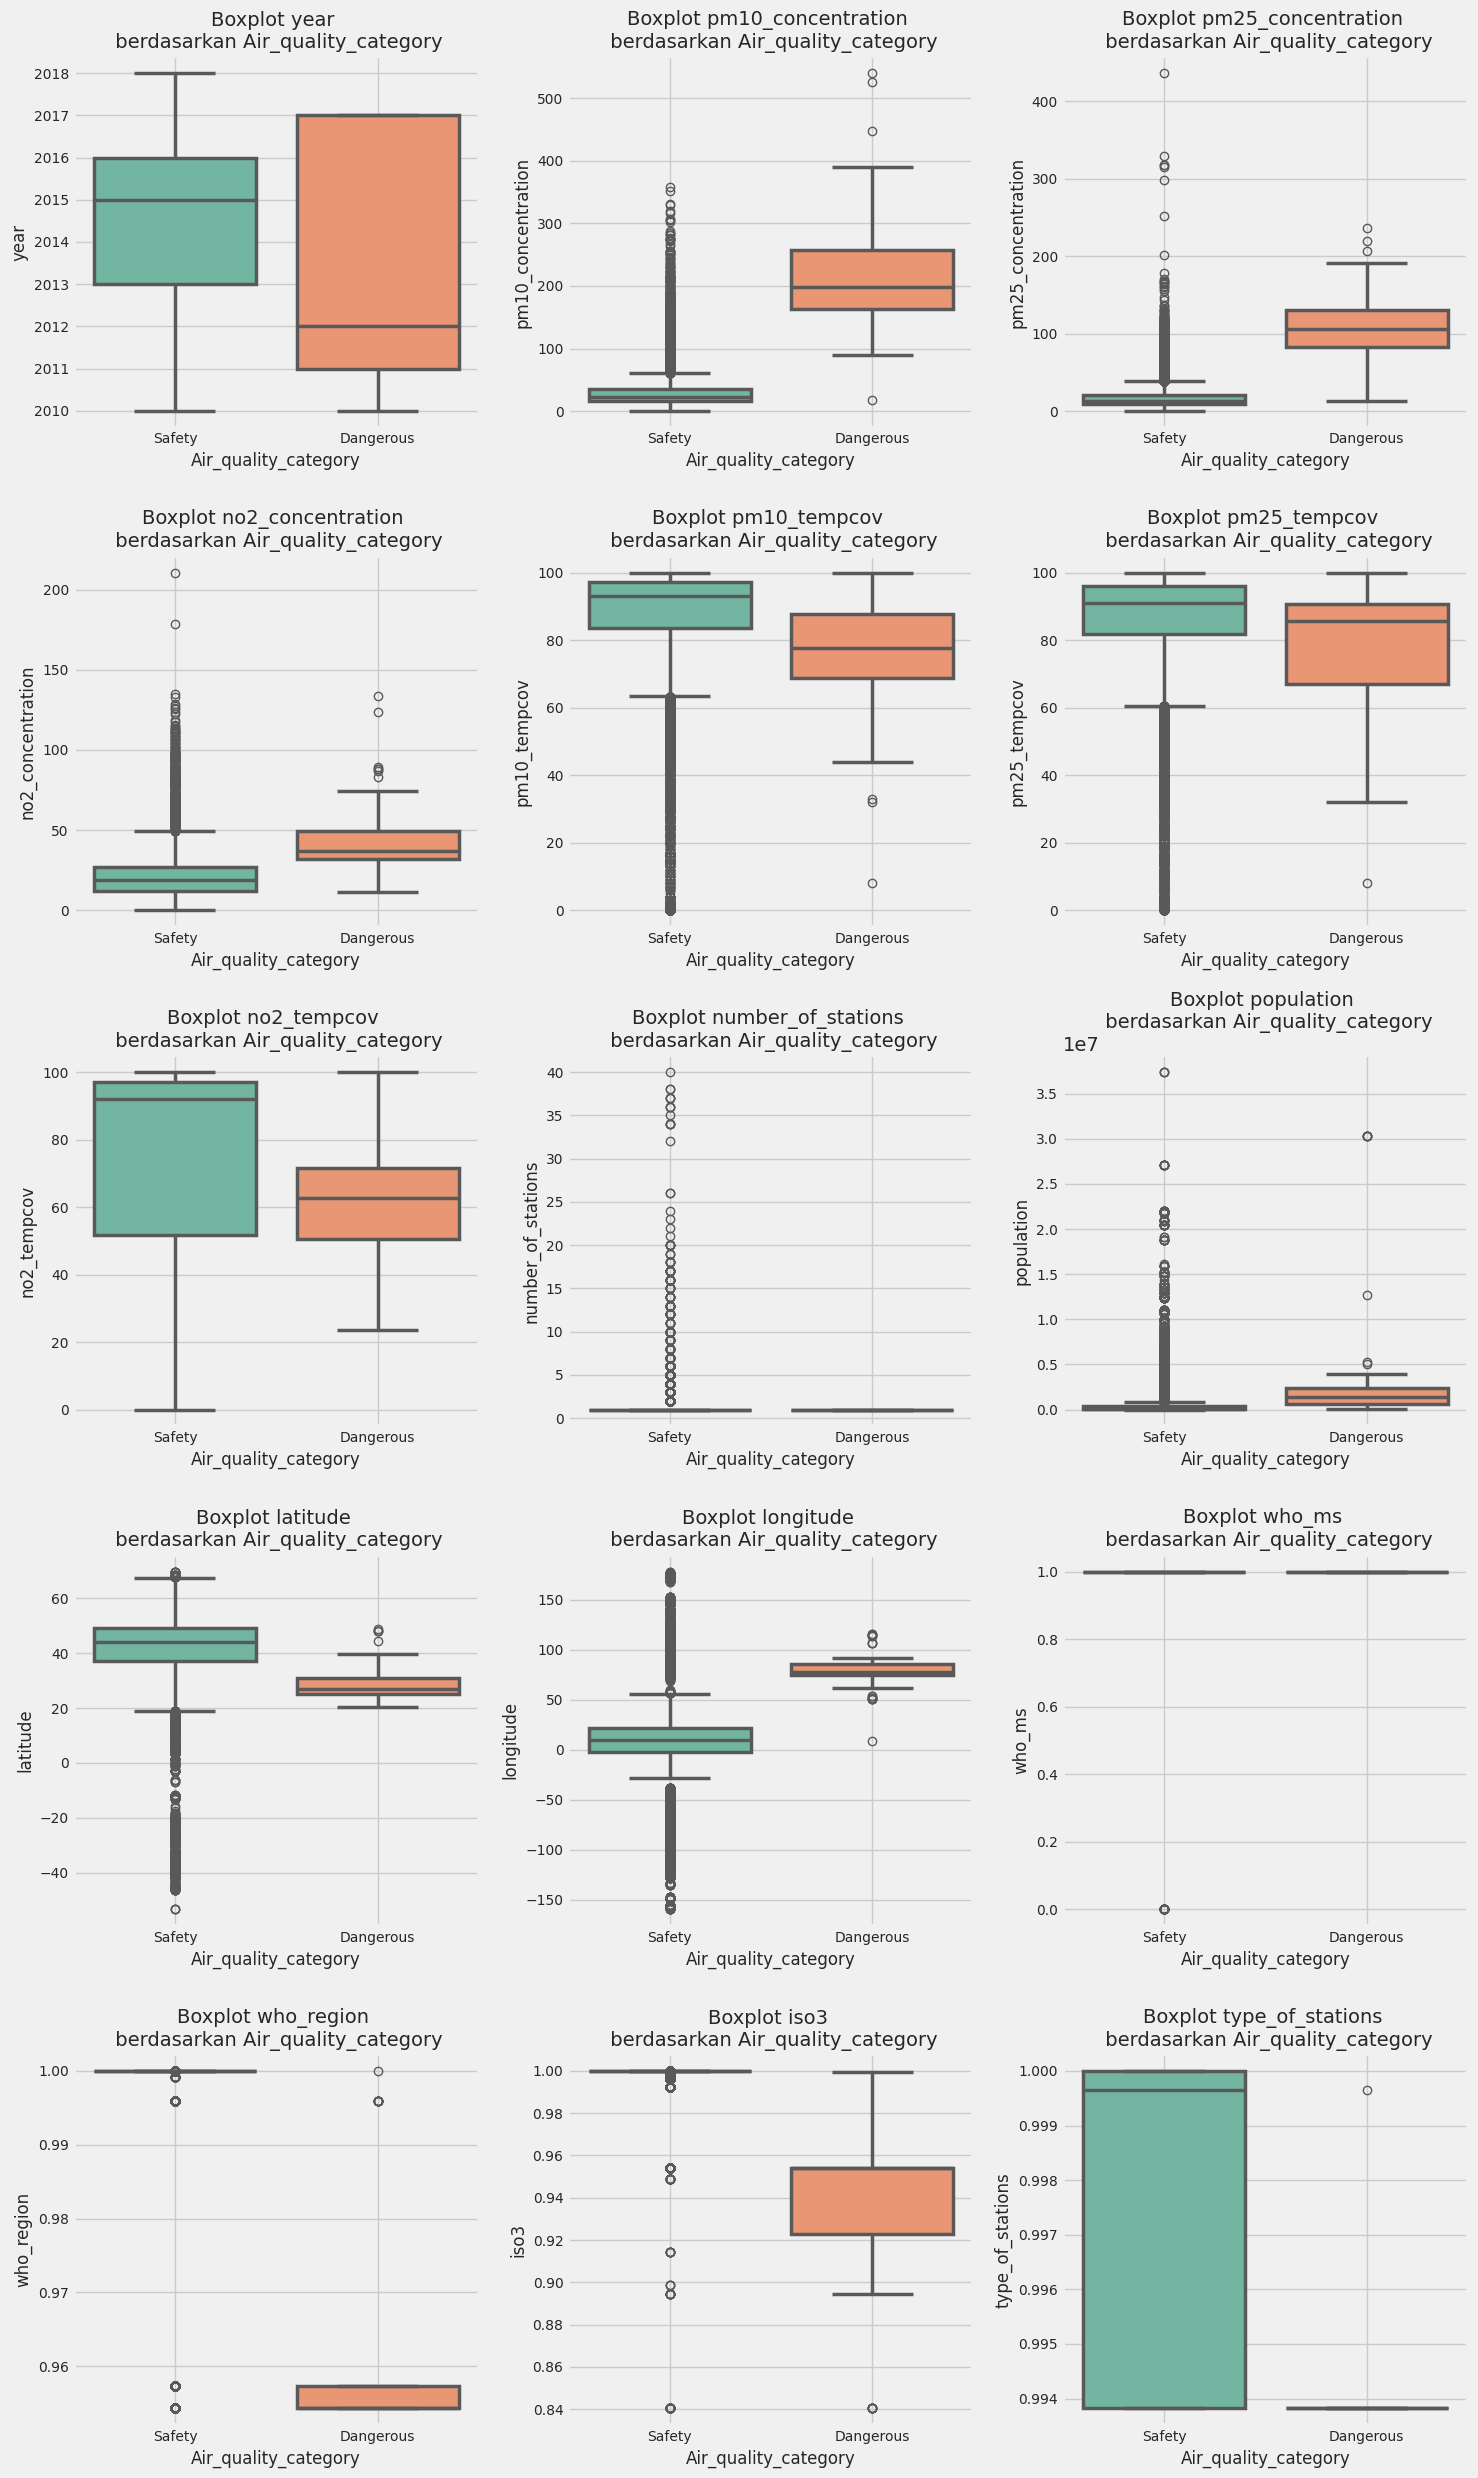

In [ ]:
# Tentukan jumlah baris dan kolom subplot yang sesuai
num_rows = (len(df.columns) - 2) // 3 + 1  # -2 karena 1 untuk kolom target
num_cols = min(len(df.columns) - 1, 3)  # Menghindari penggunaan kolom target dalam perhitungan

# Membuat satu figure untuk semua boxplot
plt.figure(figsize=(15, 5 * num_rows))

# Mapping nilai 1 -> 'Safety' dan 0 -> 'Dangerous'
df[kolom_target] = df[kolom_target].map({1: 'Safety', 0: 'Dangerous'})

# Iterasi melalui setiap kolom (kecuali kolom target) dan membuat boxplot di subplot yang sesuai
for i, column in enumerate(df.drop(columns=[kolom_target]).columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=kolom_target, y=column, data=df, palette='Set2', linewidth=2.5)
    plt.title(f'Boxplot {column} \n berdasarkan {kolom_target}', fontsize=14)
    plt.xlabel(f'{kolom_target}', fontsize=12)
    plt.ylabel(f'{column}', fontsize=12)
    plt.xticks(rotation=0, fontsize=10)  # Rotasi label sumbu x agar lebih mudah dibaca
    plt.yticks(fontsize=10)  # Ukuran font untuk label sumbu y
    plt.grid(True)  # Menambahkan grid

# Mapping nilai kembalikan semula
df[kolom_target] = df[kolom_target].map({'Safety':1,'Dangerous':0})

plt.tight_layout()
plt.show()

In [ ]:
# Membuat fungsi untuk menghitung jumlah outlier
def count_outliers(series):
    # Menghitung quartile pertama (Q1) dan quartile ketiga (Q3)
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    # Menghitung IQR (Interquartile Range)
    IQR = Q3 - Q1
    # Menentukan batas atas dan batas bawah untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Menghitung jumlah outlier
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers.sum()

# Menghitung jumlah outlier untuk setiap variabel
outlier_counts = df.apply(count_outliers)
print(outlier_counts)

year                       0
pm10_concentration      3223
pm25_concentration      2607
no2_concentration        781
pm10_tempcov            2192
pm25_tempcov            2368
no2_tempcov                0
number_of_stations      3164
population              3615
latitude                1830
longitude               8481
who_ms                    30
who_region              8833
iso3                    6293
type_of_stations           0
Air_quality_category      78
dtype: int64


In [ ]:
# Fungsi untuk menghitung persentase outlier
def count_outliers_percentage(series):
    # Menghitung quartile pertama (Q1) dan quartile ketiga (Q3)
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    # Menghitung IQR (Interquartile Range)
    IQR = Q3 - Q1
    # Menentukan batas atas dan batas bawah untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Menghitung jumlah outlier
    outliers = (series < lower_bound) | (series > upper_bound)
    # Menghitung persentase outlier
    percentage_outliers = outliers.sum() / len(series) * 100
    return percentage_outliers

# Menghitung persentase outlier untuk setiap variabel
outlier_percentages = df.apply(count_outliers_percentage)
print(outlier_percentages)

year                     0.000000
pm10_concentration      12.396631
pm25_concentration      10.027309
no2_concentration        3.003962
pm10_tempcov             8.431094
pm25_tempcov             9.108043
no2_tempcov              0.000000
number_of_stations      12.169699
population              13.904381
latitude                 7.038732
longitude               32.620485
who_ms                   0.115389
who_region              33.974384
iso3                    24.204777
type_of_stations         0.000000
Air_quality_category     0.300012
dtype: float64


##3.3 Histogram tiap variabel

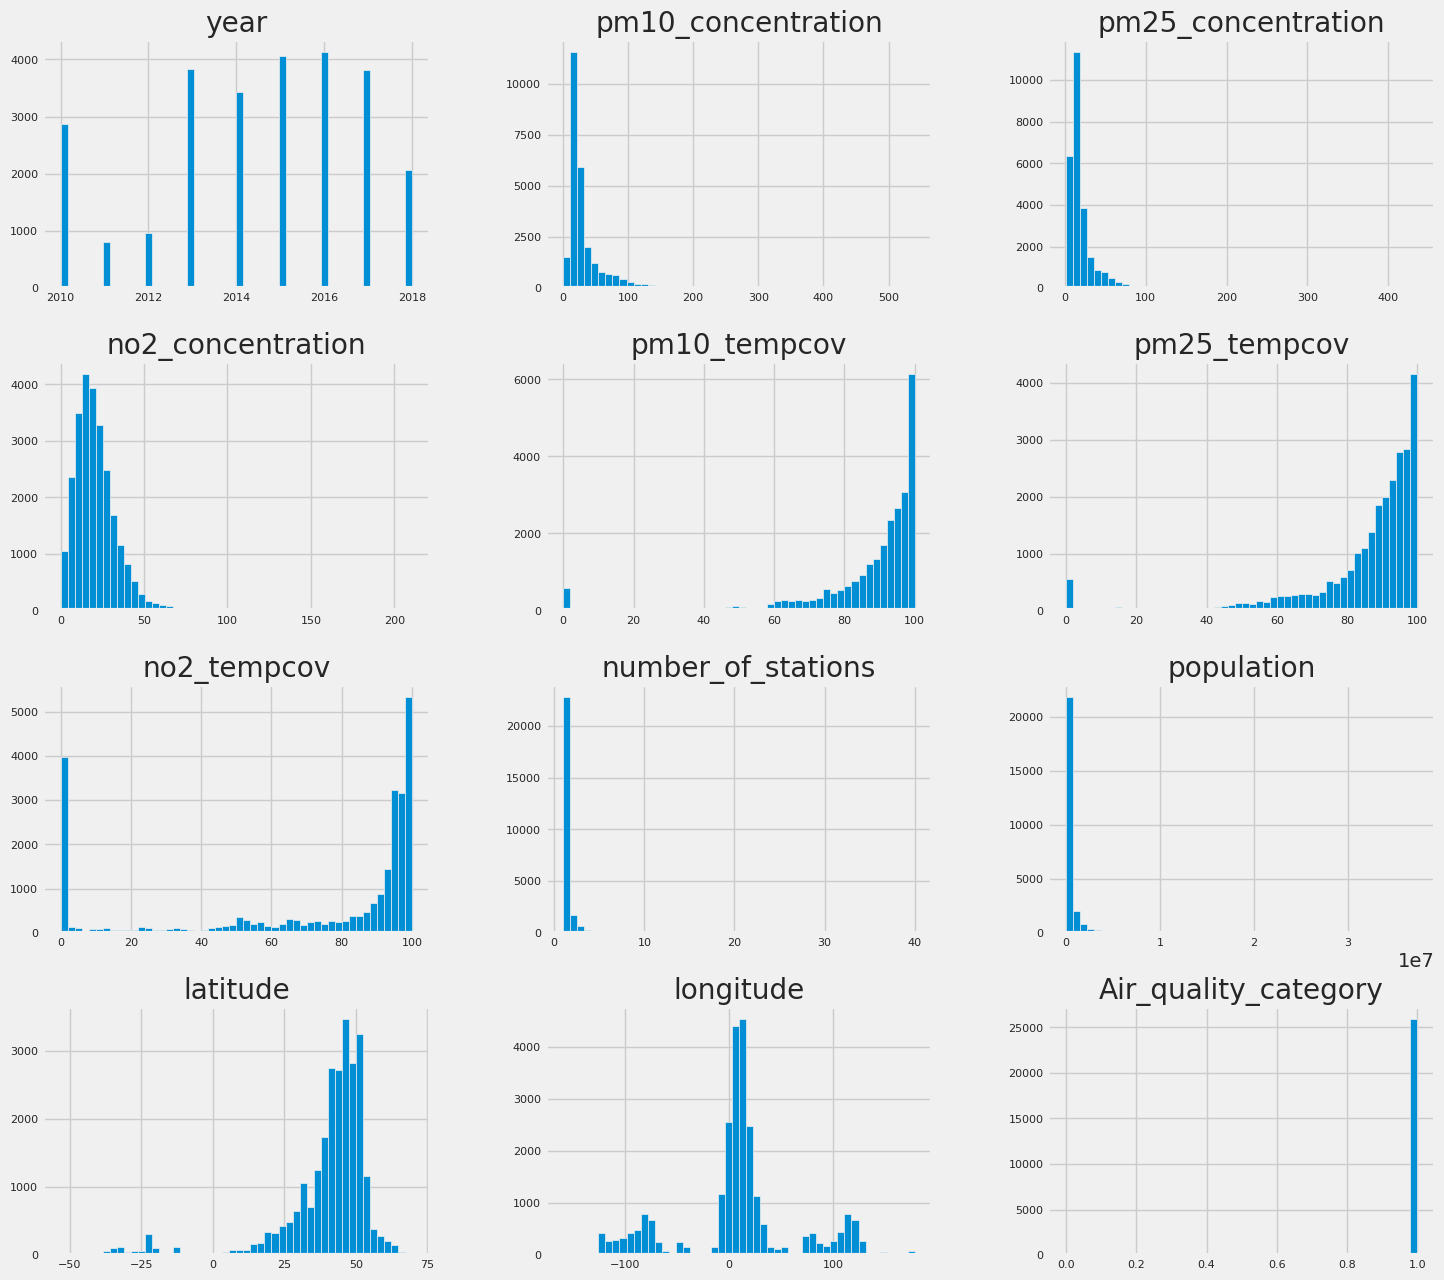

In [ ]:
# Histogram data numerik
df_num.hist(figsize=(16, 15), bins=50, xlabelsize=8, ylabelsize=8);

##3.4 Matriks Korelasi dan Heatmap

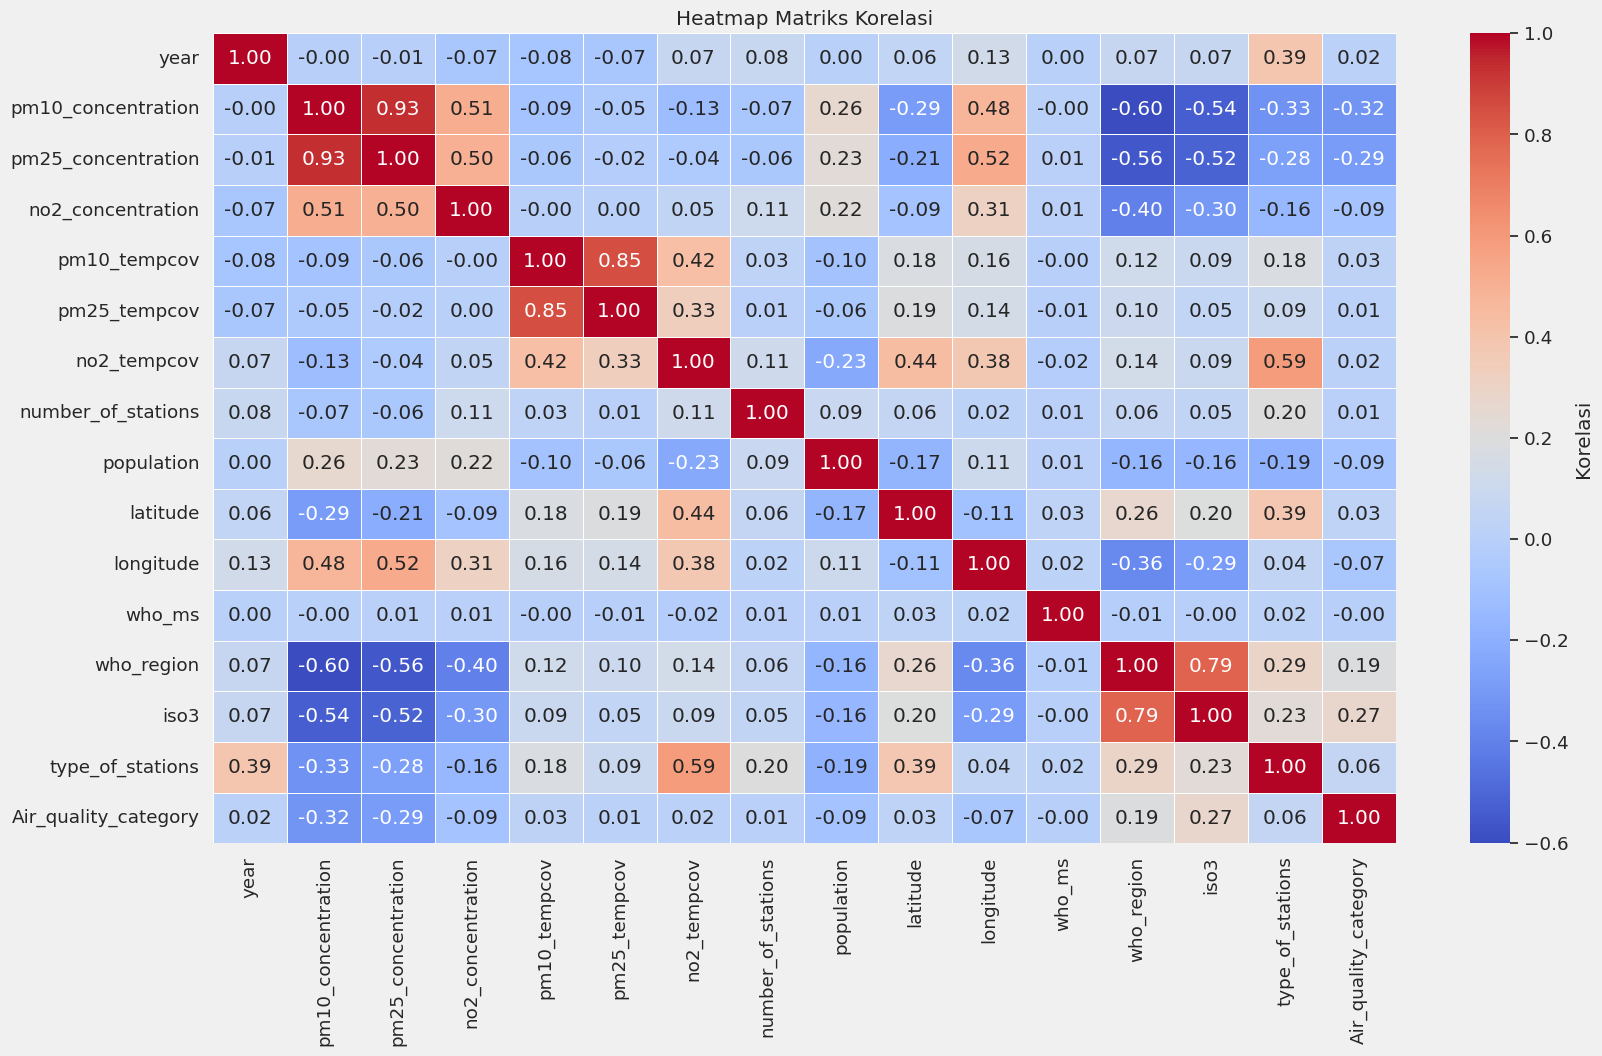

In [ ]:
# Matriks korelasi
correlation_matrix = df.corr()

# Set up ukuran dan gaya plot
plt.figure(figsize=(17, 10))
sns.set(font_scale=1.2)

# Buat heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.5,
            cbar_kws={'label': 'Korelasi'})

# Tambahkan judul
plt.title('Heatmap Matriks Korelasi')

# Tampilkan plot
plt.show()

##3.5 Pair Plot

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


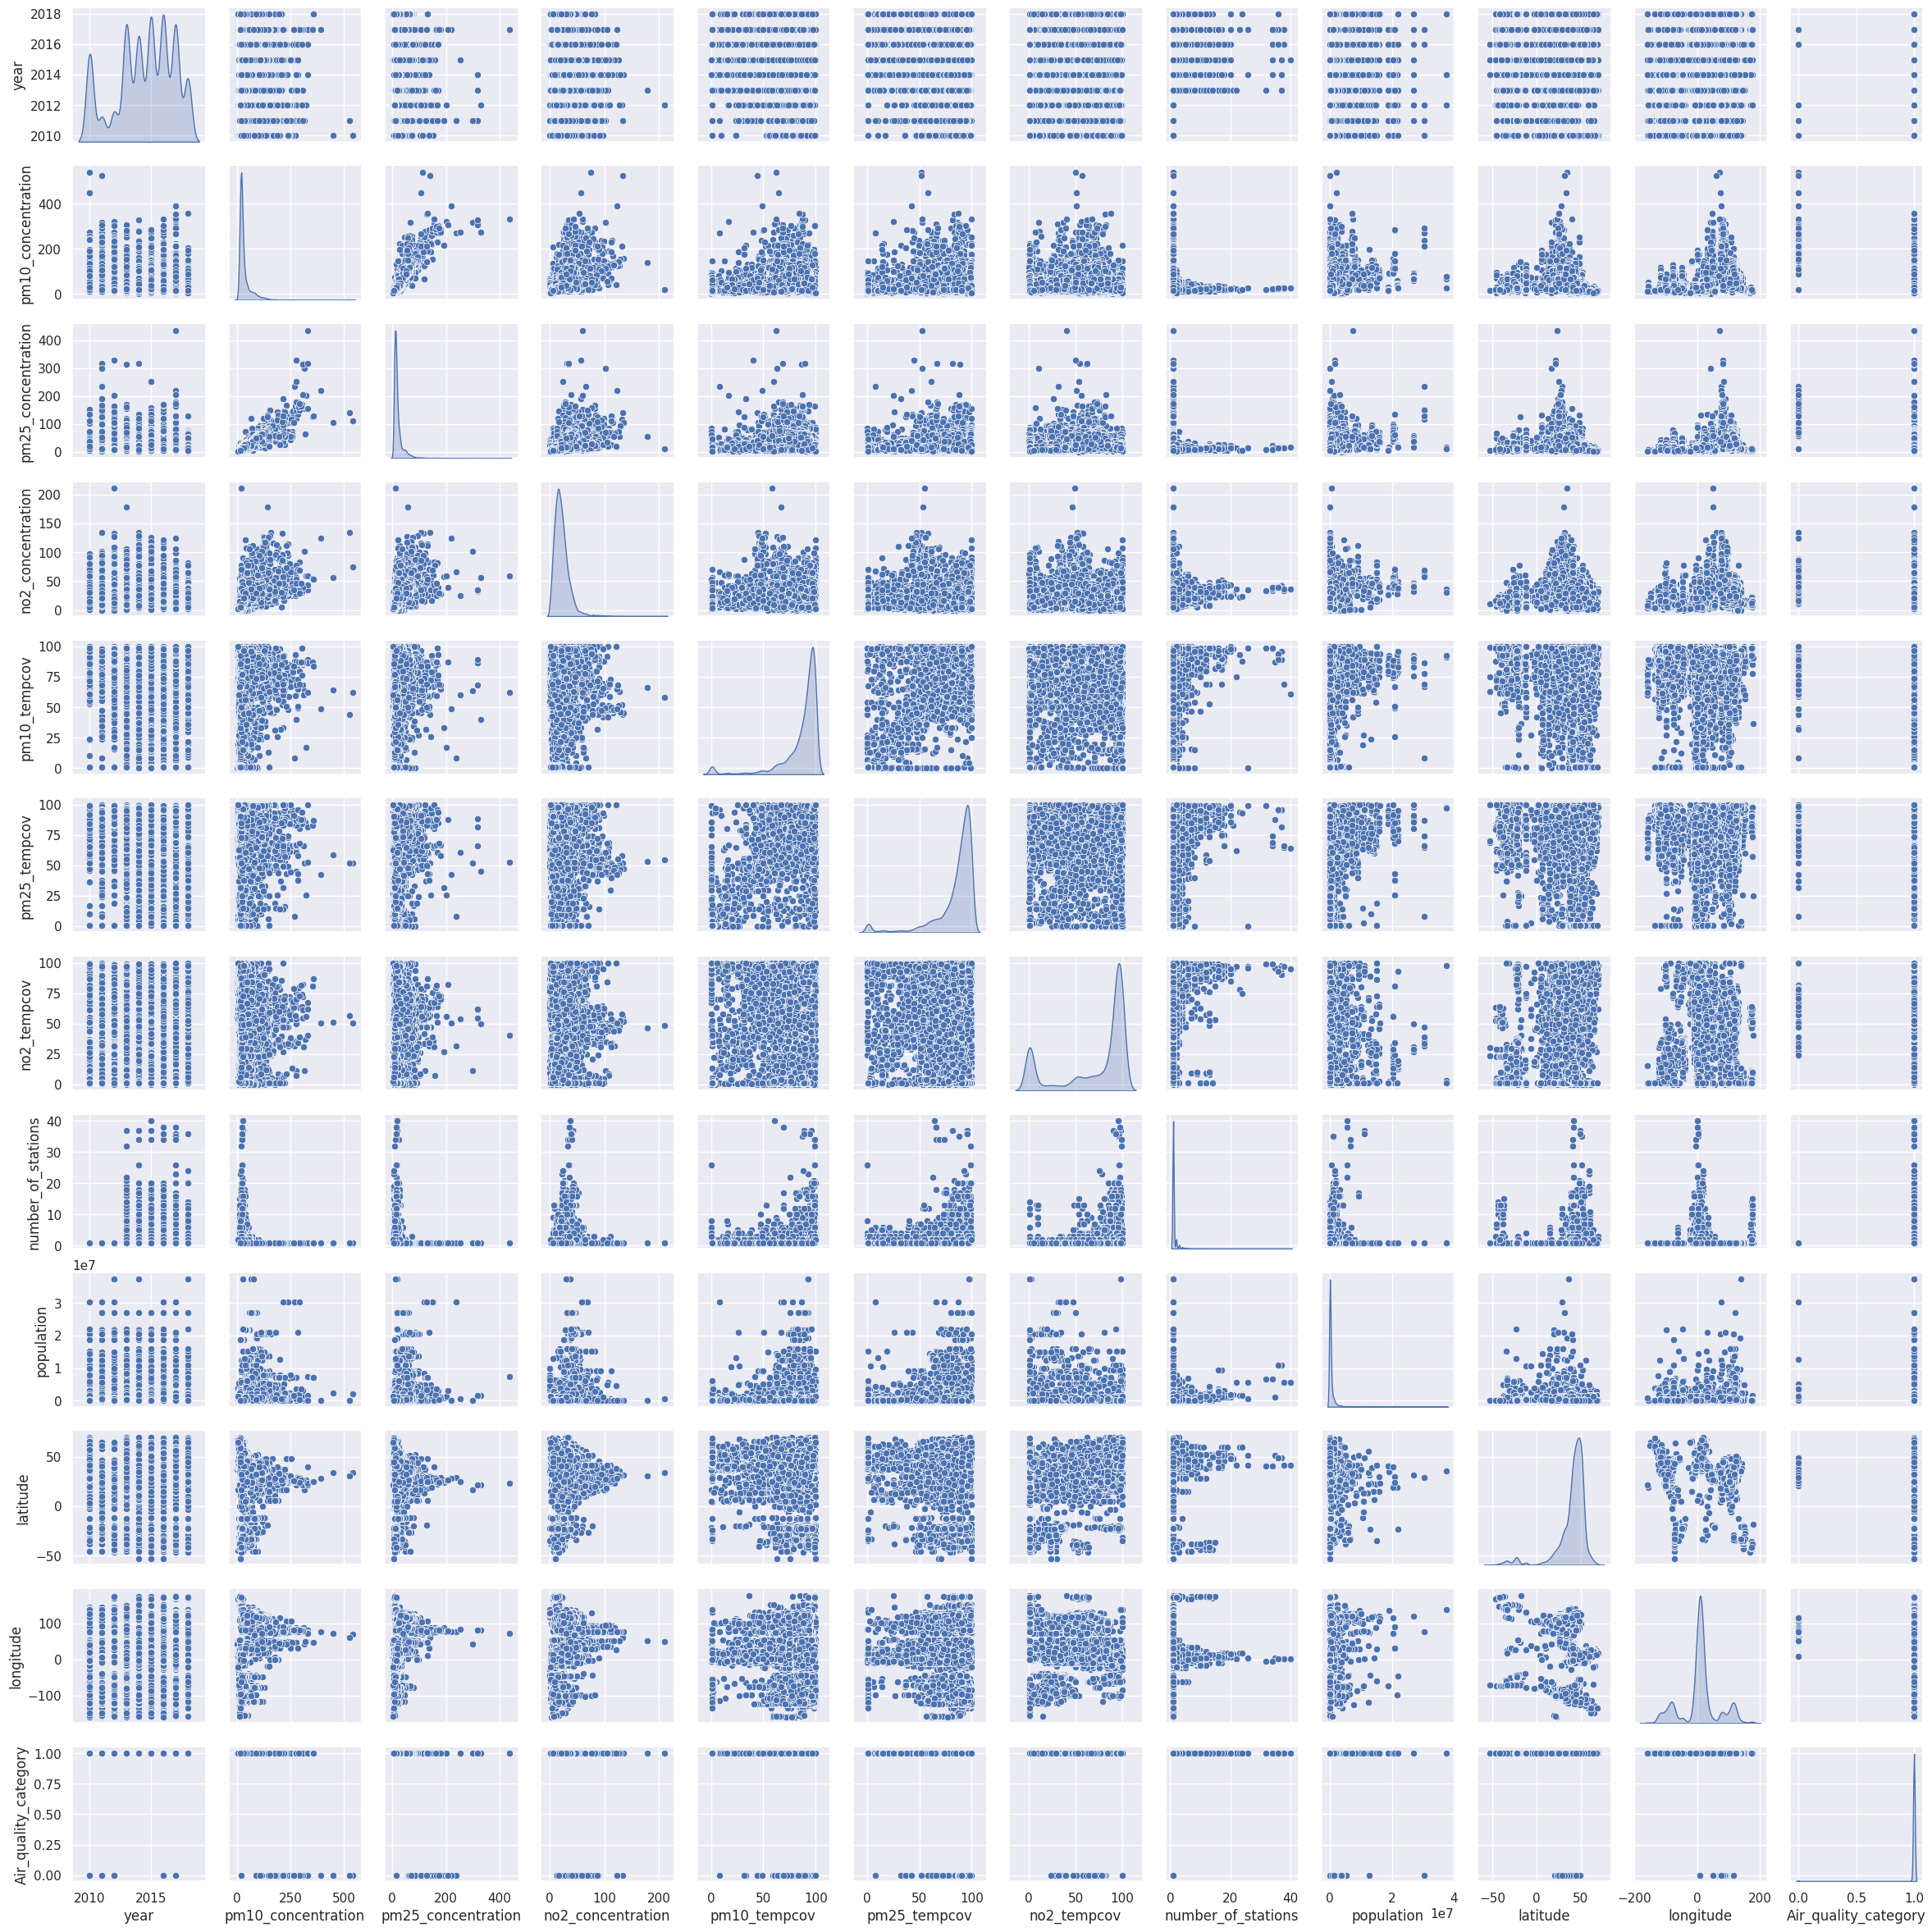

In [ ]:
sns.set()
sns.pairplot(df_num,size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

#**4. EDA LABEL KOLOM TARGET**

##4.1 Ringkasan Statistik

In [ ]:
# Membuat daftar label yang akan diperiksa
# labels_to_check = [0, 1, 2, 3, 4, 5, 6]
labels_to_check = sorted(df[kolom_target].unique().tolist())
# Inisialisasi dictionary untuk menyimpan ringkasan statistik
summary_statistics_dict = {}

# Loop untuk setiap label
for label in labels_to_check:
    # Membuat subset DataFrame untuk label tertentu
    subset_df = df[df[kolom_target] == label]
    # Menghitung ringkasan statistik untuk subset DataFrame
    summary_statistics = subset_df.describe()
    # Menambahkan ringkasan statistik ke dictionary
    summary_statistics_dict[label] = summary_statistics

# Membuat dataframe dari dictionary ringkasan statistik
summary_statistics_df = pd.concat(summary_statistics_dict, axis=1)

# Transposisi dataframe agar lebih mudah dibaca
summary_statistics_df = summary_statistics_df.transpose()

# Menampilkan ringkasan statistik
print("Ringkasan statistik untuk setiap label:")
summary_statistics_df

Ringkasan statistik untuk setiap label:


count          mean           std           min  \
0 year                     78.0  2.013782e+03  2.742865e+00   2010.000000   
  pm10_concentration       78.0  2.171495e+02  8.418189e+01     18.346288   
  pm25_concentration       78.0  1.108407e+02  4.029707e+01     13.190060   
  no2_concentration        78.0  4.373218e+01  2.197927e+01     11.233000   
  pm10_tempcov             78.0  7.593969e+01  1.575201e+01      8.000000   
  pm25_tempcov             78.0  7.949969e+01  1.750100e+01      8.000000   
  no2_tempcov              78.0  5.928067e+01  1.770710e+01     23.520000   
  number_of_stations       78.0  1.000000e+00  0.000000e+00      1.000000   
  population               78.0  3.439581e+06  7.277048e+06  50664.000000   
  latitude                 78.0  2.891214e+01  6.160623e+00     20.312778   
  longitude                78.0  7.974332e+01  1.730193e+01      9.031400   
  who_ms                   78.0  1.000000e+00  0.000000e+00      1.000000   
  who_region               78.0  9.612066e-01  1.510788e-02      0.954276   
  iso3                     78.0  9.394012e-01  4.260434e-02      0.840317   
  type_of_stations         78.0  9.938941e-01  6.611238e-04      0.993819   
  Air_quality_category     78.0  0.000000e+00  0.000000e+00      0.000000   
1 year                  25921.0  2.014477e+03  2.344634e+00   2010.000000   
  pm10_concentration    25921.0  3.268088e+01  2.921606e+01      0.730000   
  pm25_concentration    25921.0  1.900553e+01  1.648703e+01      1.000000   
  no2_concentration     25921.0  2.108068e+01  1.333741e+01      0.004000   
  pm10_tempcov          25921.0  8.618893e+01  1.919549e+01      0.000000   
  pm25_tempcov          25921.0  8.446459e+01  1.966536e+01      0.000000   
  no2_tempcov           25921.0  7.063938e+01  3.630775e+01      0.000000   
  number_of_stations    25921.0  1.306045e+00  1.471556e+00      1.000000   
  population            25921.0  5.612769e+05  1.661555e+06      6.000000   
  latitude              25921.0  3.964285e+01  1.713982e+01    -53.158316   
  longitude             25921.0  7.959615e+00  5.792754e+01   -159.366240   
  who_ms                25921.0  9.988426e-01  3.400100e-02      0.000000   
  who_region            25921.0  9.971067e-01  1.015684e-02      0.954276   
  iso3                  25921.0  9.975410e-01  1.097582e-02      0.840317   
  type_of_stations      25921.0  9.970071e-01  3.050717e-03      0.993819   
  Air_quality_category  25921.0  1.000000e+00  0.000000e+00      1.000000   

                                  25%           50%           75%  \
0 year                    2011.000000  2.012000e+03  2.017000e+03   
  pm10_concentration       163.494250  1.978650e+02  2.570500e+02   
  pm25_concentration        82.765000  1.059750e+02  1.314725e+02   
  no2_concentration         31.812116  3.704618e+01  4.945200e+01   
  pm10_tempcov              68.727000  7.756800e+01  8.771100e+01   
  pm25_tempcov              67.120000  8.581000e+01  9.080100e+01   
  no2_tempcov               50.585000  6.258200e+01  7.151500e+01   
  number_of_stations         1.000000  1.000000e+00  1.000000e+00   
  population            648614.500000  1.377371e+06  2.389547e+06   
  latitude                  25.203121  2.679350e+01  3.099858e+01   
  longitude                 74.911937  7.823480e+01  8.589158e+01   
  who_ms                     1.000000  1.000000e+00  1.000000e+00   
  who_region                 0.954276  9.542760e-01  9.572954e-01   
  iso3                       0.923043  9.540000e-01  9.540000e-01   
  type_of_stations           0.993819  9.938192e-01  9.938192e-01   
  Air_quality_category       0.000000  0.000000e+00  0.000000e+00   
1 year                    2013.000000  2.015000e+03  2.016000e+03   
  pm10_concentration        17.004000  2.218800e+01  3.478079e+01   
  pm25_concentration         9.808040  1.377167e+01  2.138318e+01   
  no2_concentration         12.188000  1.885000e+01  2.711344e+01   
  pm10_tempcov              83.7120

##4.2 Cek *Outliers*

In [ ]:
# CEK OUTLIERS
# Membuat fungsi untuk menghitung jumlah outlier berdasarkan label
def count_outliers_by_label(series, label):
    # Mengambil subset data berdasarkan label
    subset_series = series[df[kolom_target] == label]
    # Menghitung jumlah outlier menggunakan fungsi sebelumnya
    return count_outliers(subset_series)

# Loop untuk setiap label
for label in labels_to_check:
    # Menghitung jumlah outlier untuk setiap variabel berdasarkan label
    outlier_counts_by_label = df.apply(lambda col: count_outliers_by_label(col, label))
    # Menampilkan hasil untuk label tersebut
    print(f"\nJumlah outlier untuk setiap variabel pada label {label}:")
    print(outlier_counts_by_label)



Jumlah outlier untuk setiap variabel pada label 0:
year                     0
pm10_concentration       4
pm25_concentration       3
no2_concentration        7
pm10_tempcov             3
pm25_tempcov             1
no2_tempcov              0
number_of_stations       0
population               8
latitude                 5
longitude               18
who_ms                   0
who_region              12
iso3                     8
type_of_stations         1
Air_quality_category     0
dtype: int64

Jumlah outlier untuk setiap variabel pada label 1:
year                       0
pm10_concentration      3174
pm25_concentration      2568
no2_concentration        769
pm10_tempcov            2209
pm25_tempcov            2365
no2_tempcov                0
number_of_stations      3164
population              3619
latitude                1846
longitude               8432
who_ms                    30
who_region              8756
iso3                    6281
type_of_stations           0
Air_quality_cate

##4.3 Histogram

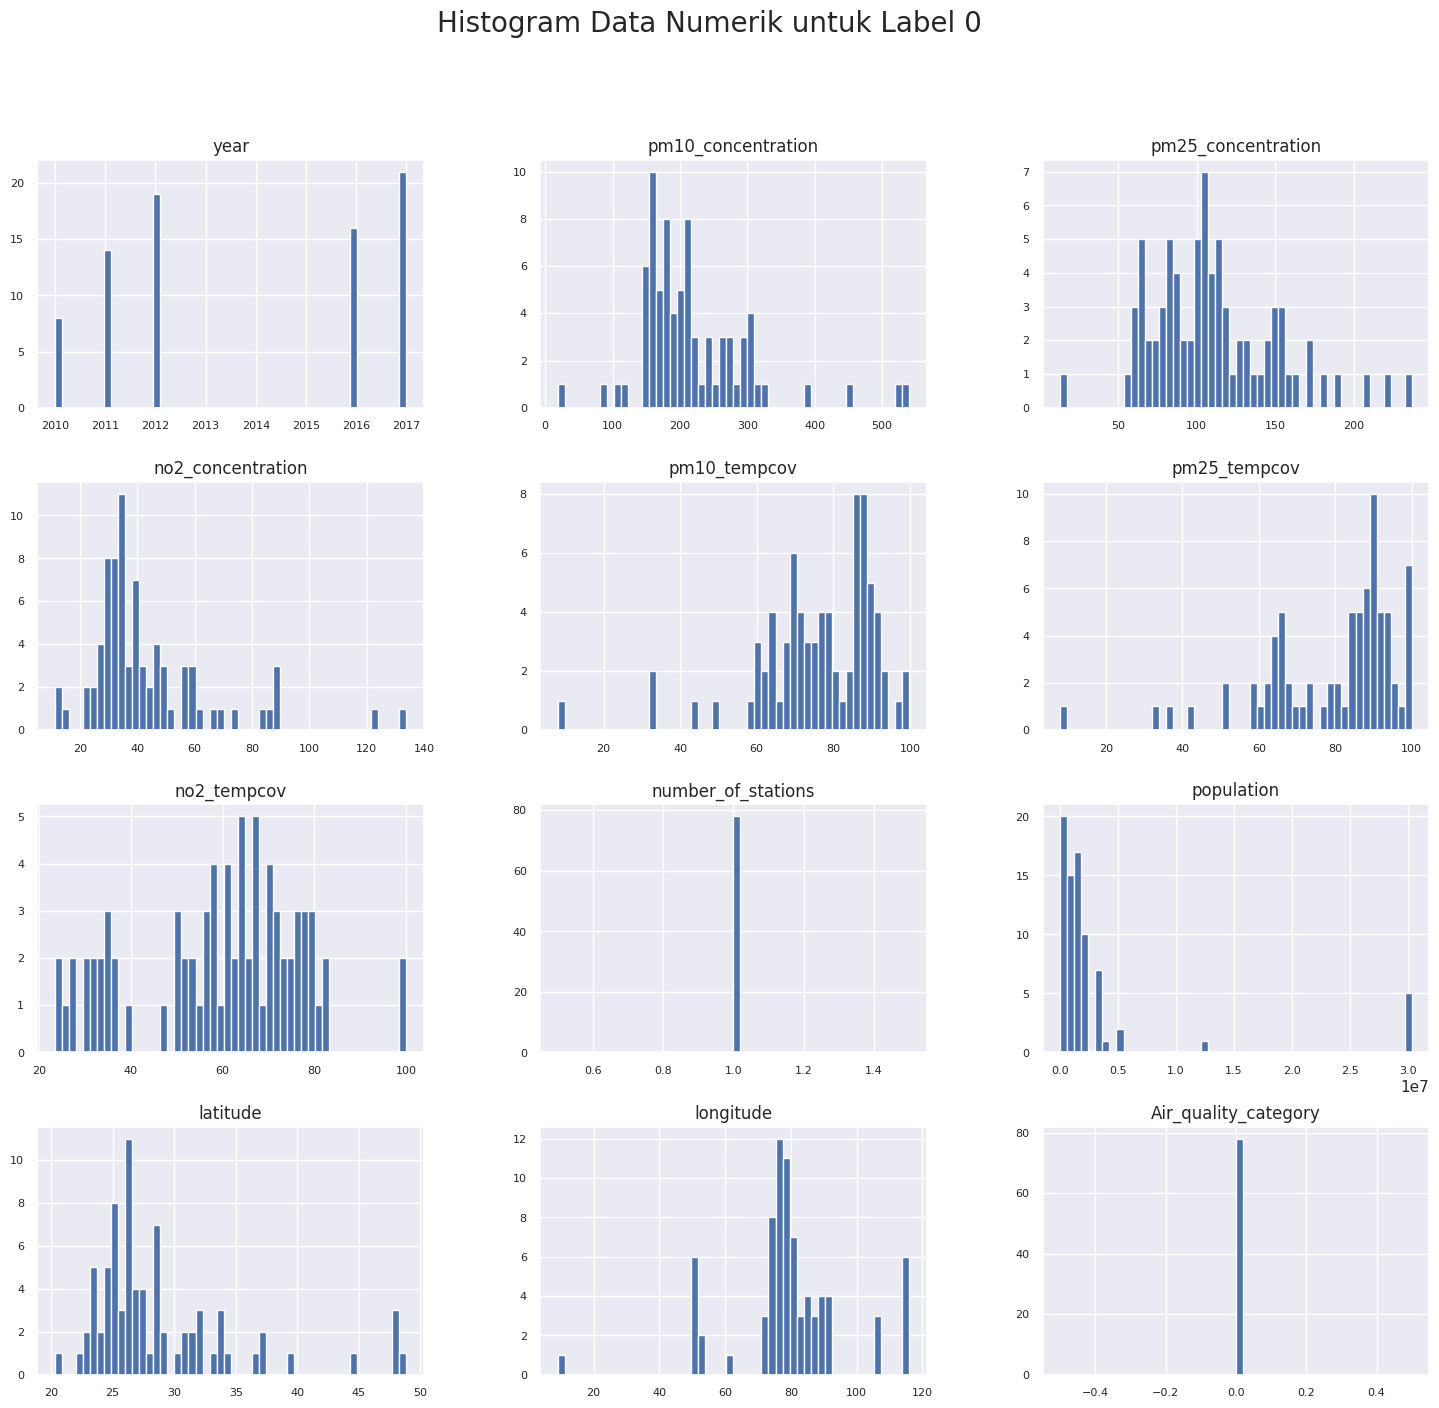

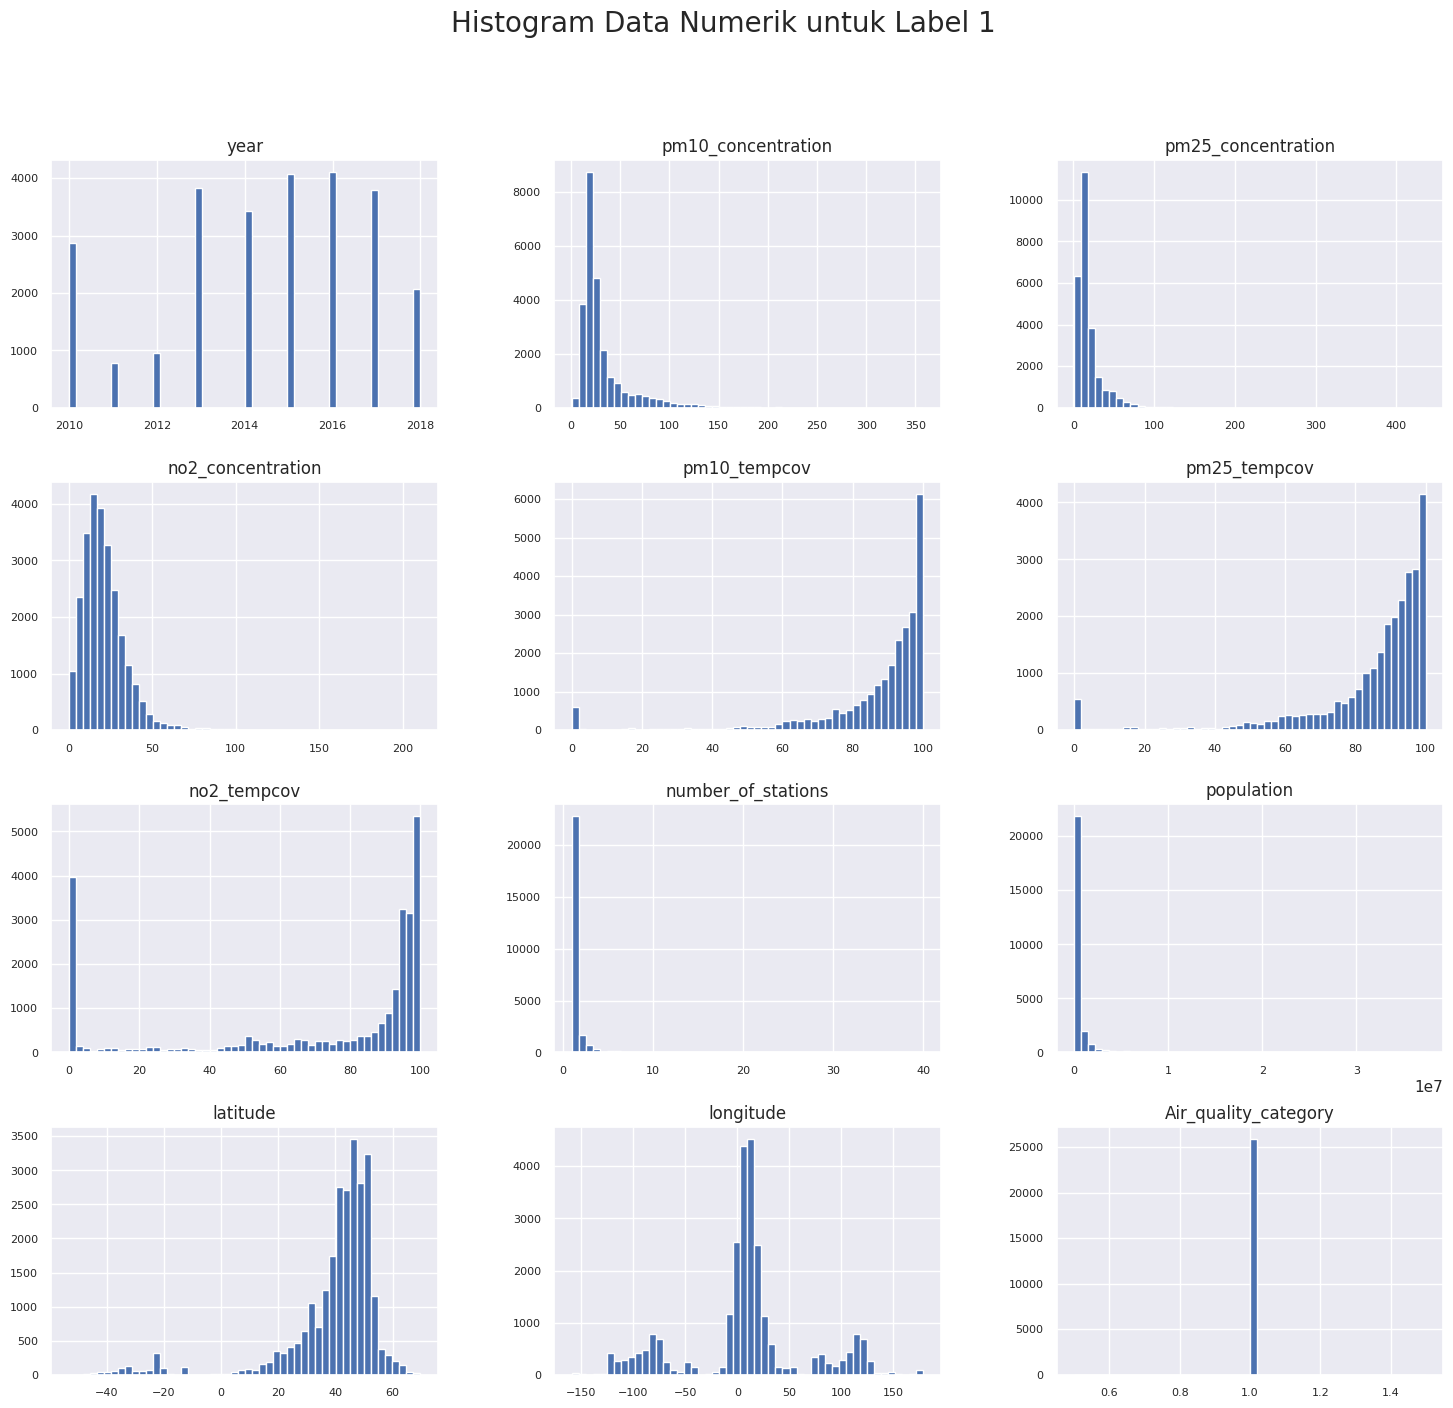

In [ ]:
# DISTRIBUSI DATA

# Loop untuk setiap label
for label in labels_to_check:
    # Membuat subset DataFrame untuk label tertentu
    subset_df = df_num[df[kolom_target] == label]
    # Membuat histogram untuk subset DataFrame
    subset_df.hist(figsize=(16, 15), bins=50, xlabelsize=8, ylabelsize=8)
    # Menambahkan judul untuk setiap subplot
    plt.suptitle(f"Histogram Data Numerik untuk Label {label}", fontsize=20)
    # Menampilkan histogram
    plt.show()

##4.4 Heatmap Korelasi

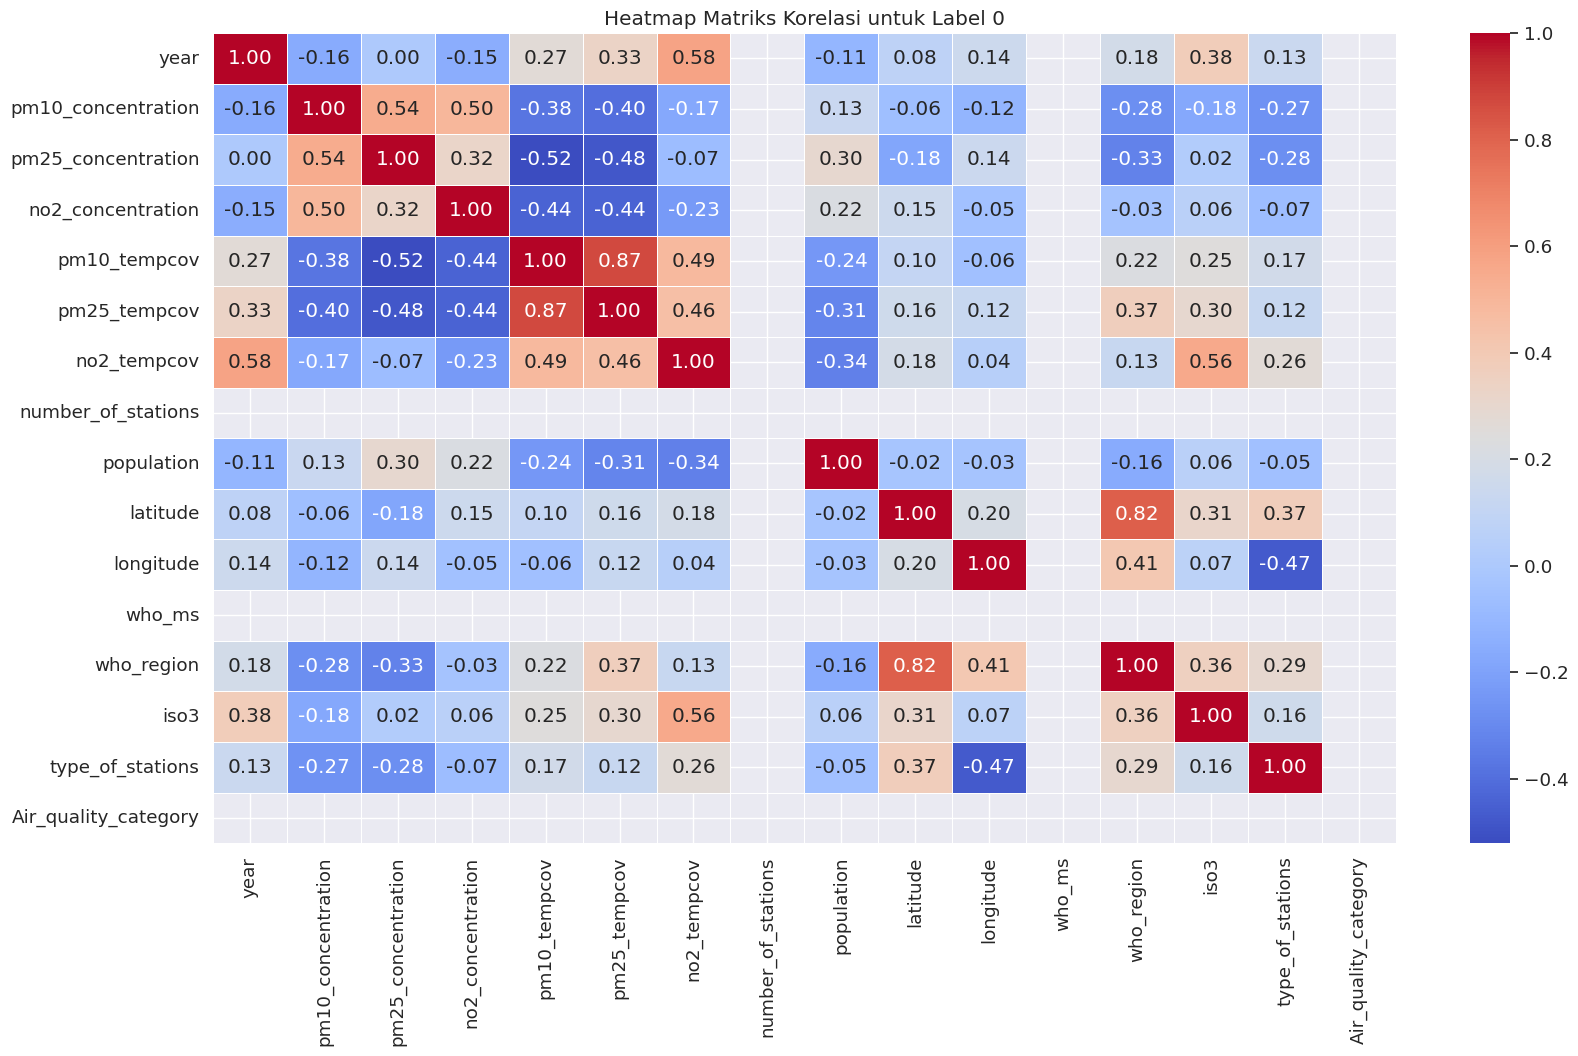

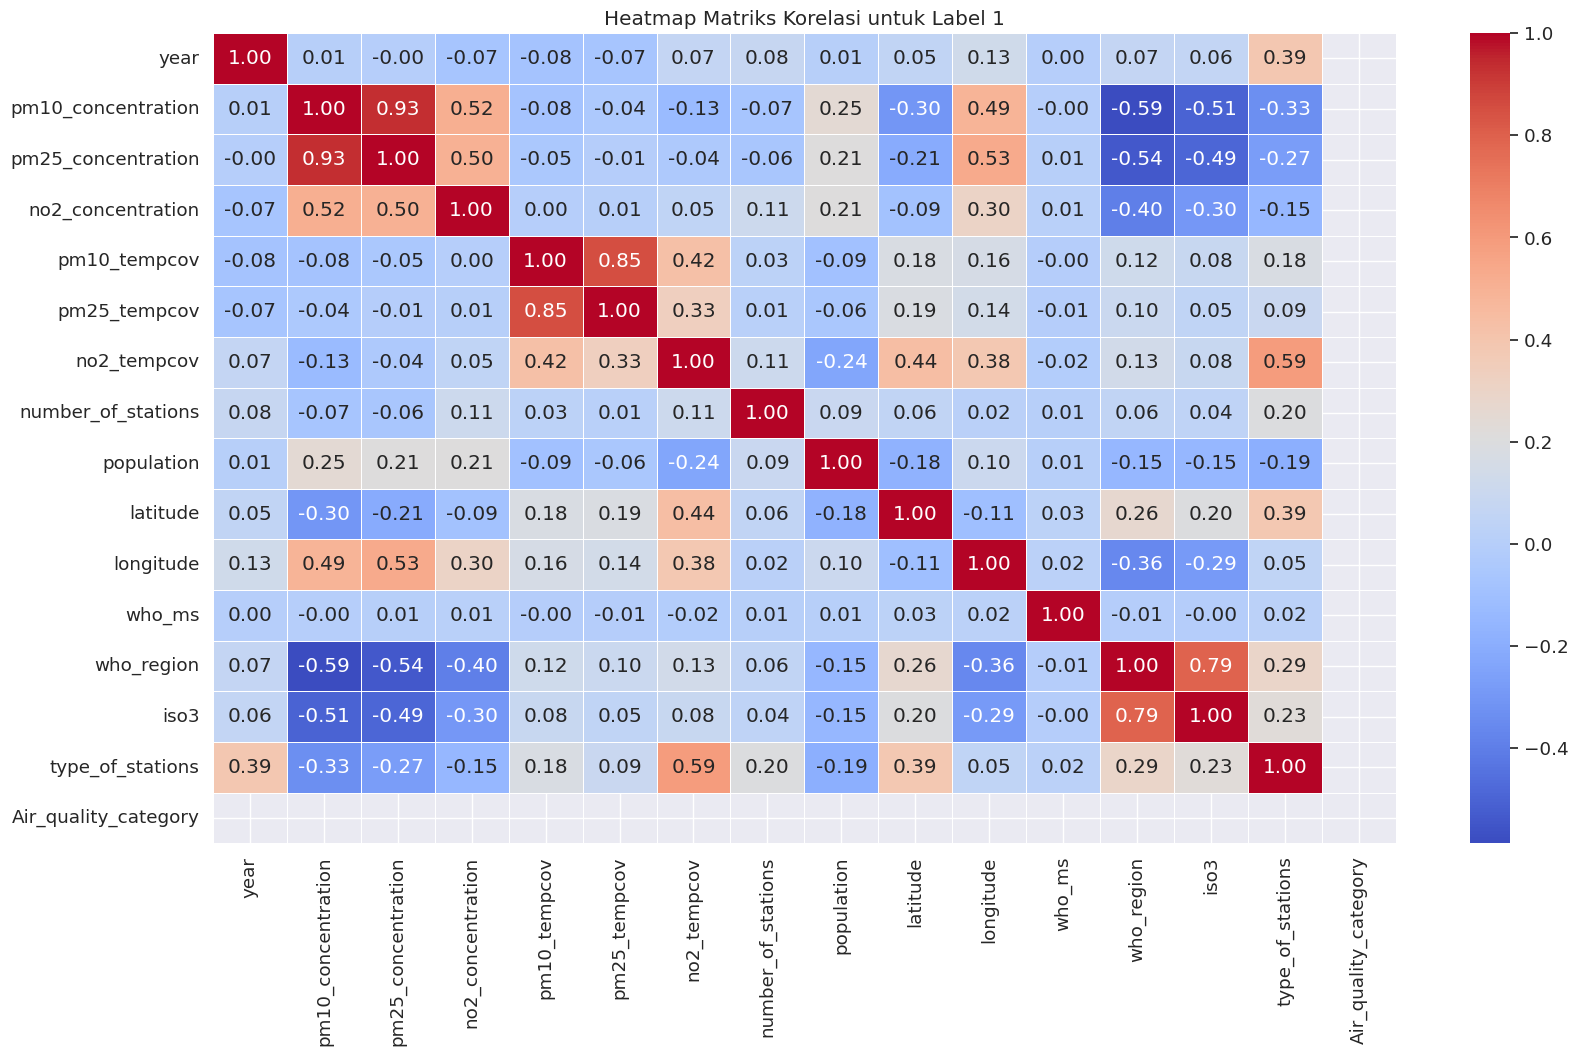

In [ ]:
# Loop untuk setiap label
for label in labels_to_check:
    # Membuat subset DataFrame untuk label tertentu
    subset_df = df[df[kolom_target] == label]

    # Menghitung matriks korelasi untuk subset DataFrame
    correlation_matrix = subset_df.corr()

    # Set up ukuran dan gaya plot
    plt.figure(figsize=(17, 10))
    sns.set(font_scale=1.2)

    # Buat heatmap untuk matriks korelasi
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

    # Tambahkan judul
    plt.title(f'Heatmap Matriks Korelasi untuk Label {label}')

    # Tampilkan plot
    plt.show()

In [ ]:
df[df[kolom_target] == 0]["number_of_stations"].value_counts()
df[df[kolom_target] == 0]["iso3"].value_counts()

iso3
0.954000    46
0.840317     8
0.996330     8
0.894588     4
0.914503     3
0.898685     3
0.948665     2
0.894486     2
0.992366     1
0.999527     1
Name: count, dtype: int64

##4.5 Violin Plot

<ipython-input-23-de78a1391a4a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=kolom_target, y=column, data=df, palette="coolwarm")


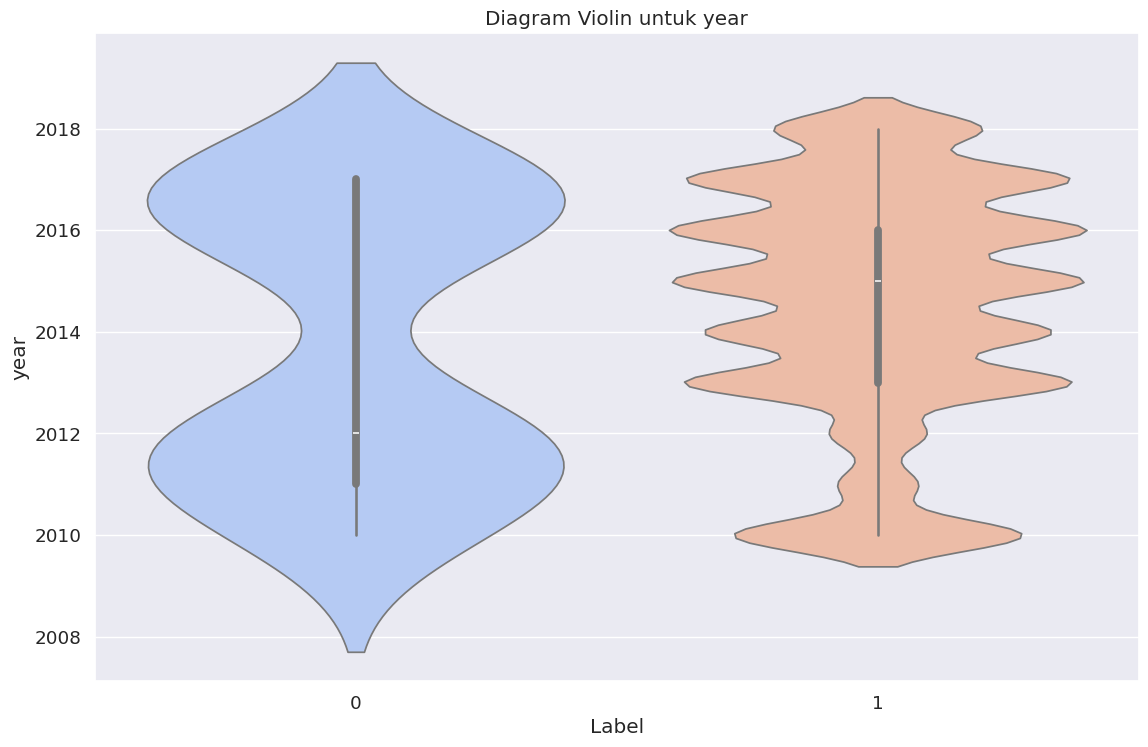

<ipython-input-23-de78a1391a4a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=kolom_target, y=column, data=df, palette="coolwarm")


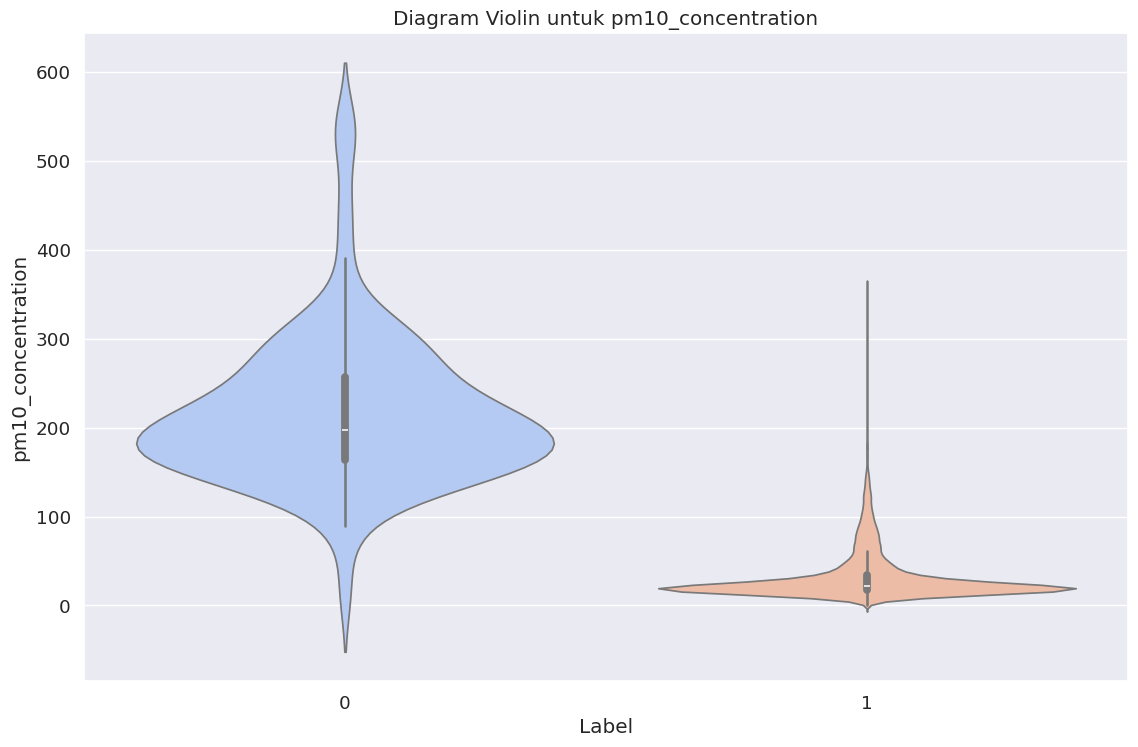

<ipython-input-23-de78a1391a4a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=kolom_target, y=column, data=df, palette="coolwarm")


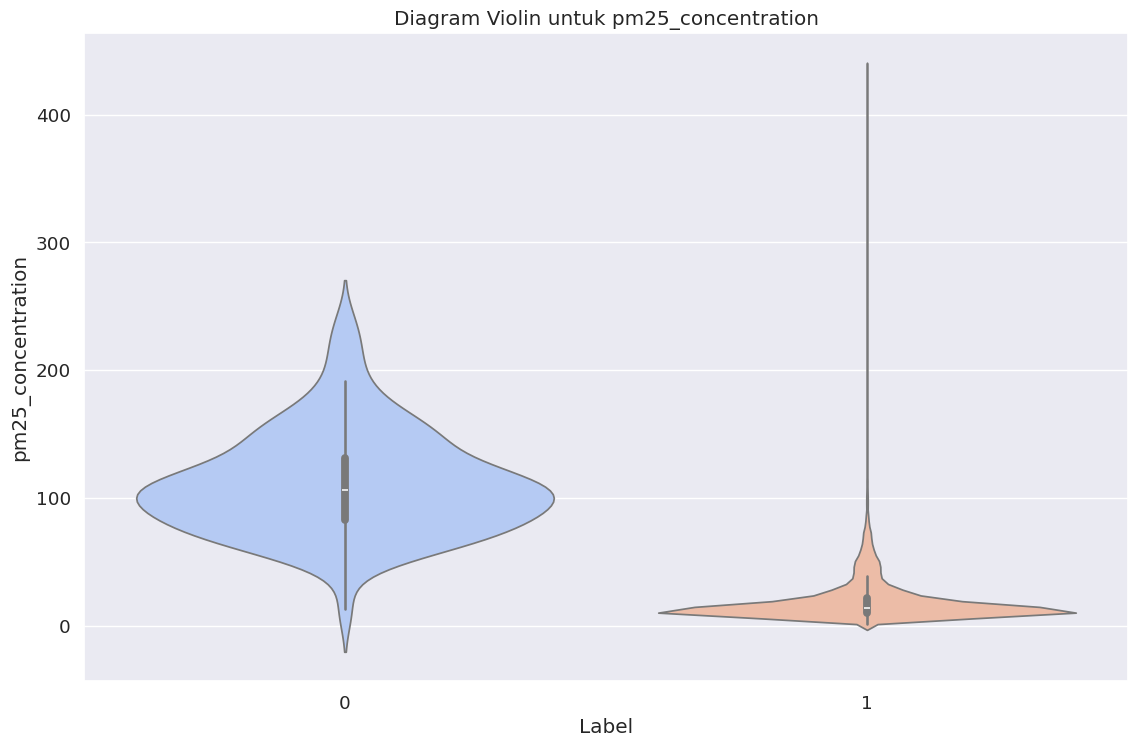

<ipython-input-23-de78a1391a4a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=kolom_target, y=column, data=df, palette="coolwarm")


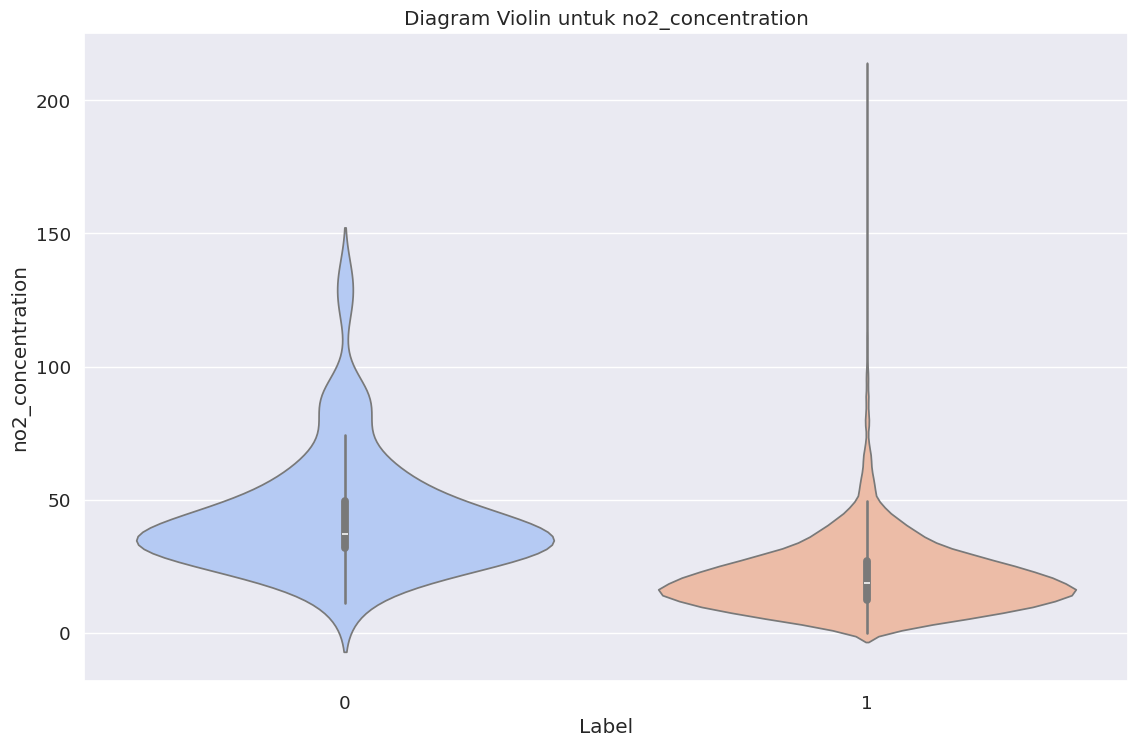

<ipython-input-23-de78a1391a4a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=kolom_target, y=column, data=df, palette="coolwarm")


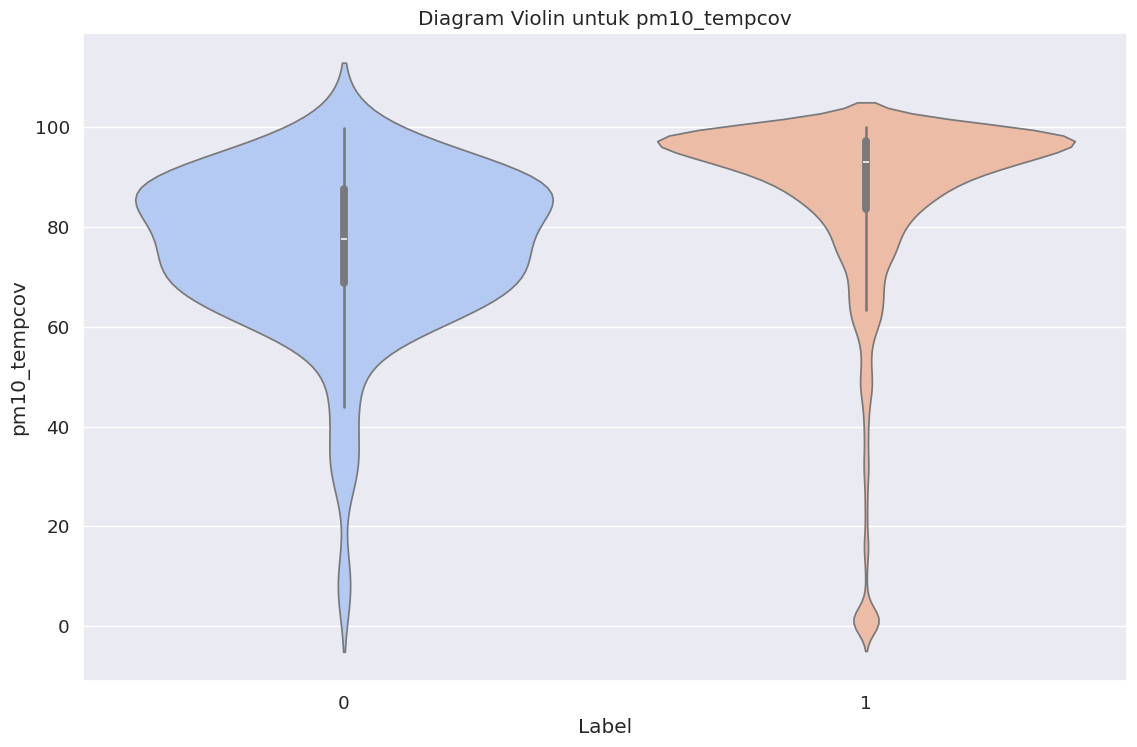

<ipython-input-23-de78a1391a4a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=kolom_target, y=column, data=df, palette="coolwarm")


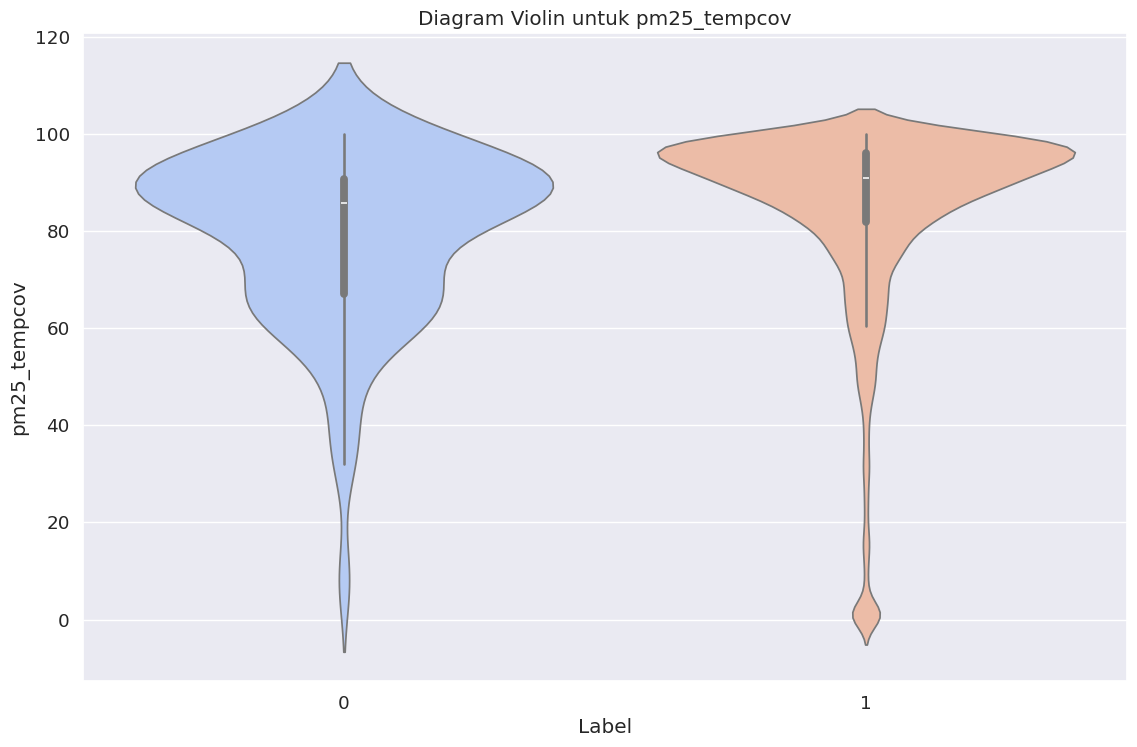

<ipython-input-23-de78a1391a4a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=kolom_target, y=column, data=df, palette="coolwarm")


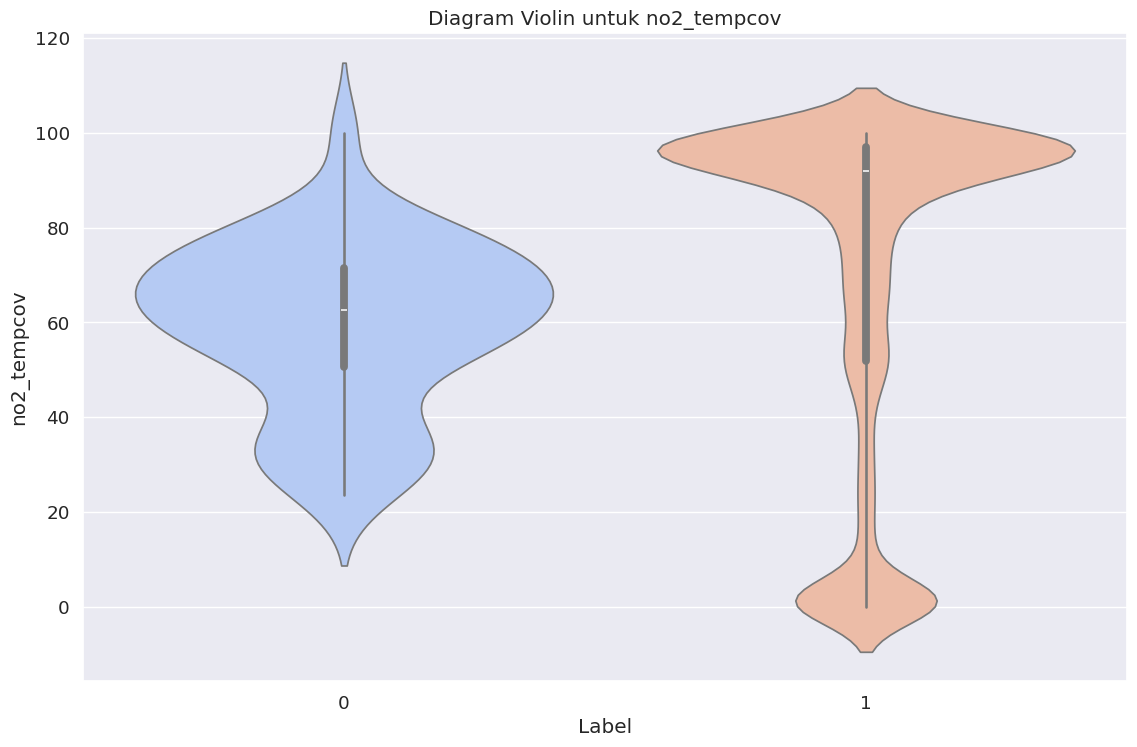

<ipython-input-23-de78a1391a4a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=kolom_target, y=column, data=df, palette="coolwarm")


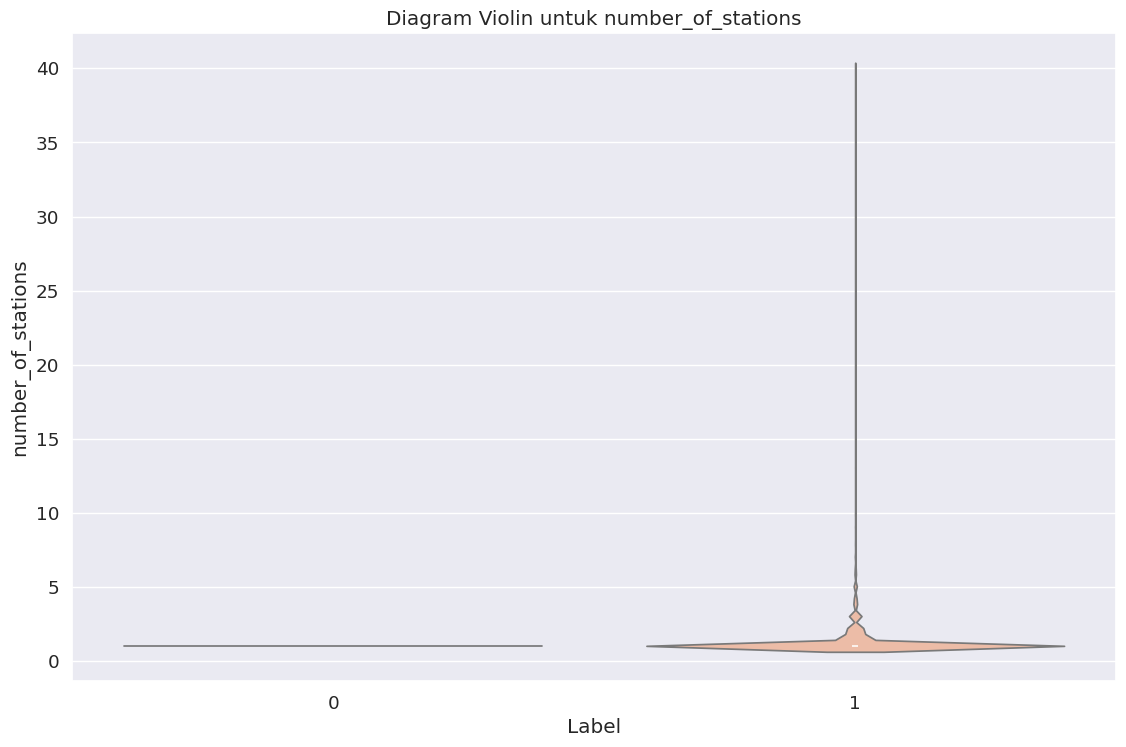

<ipython-input-23-de78a1391a4a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=kolom_target, y=column, data=df, palette="coolwarm")


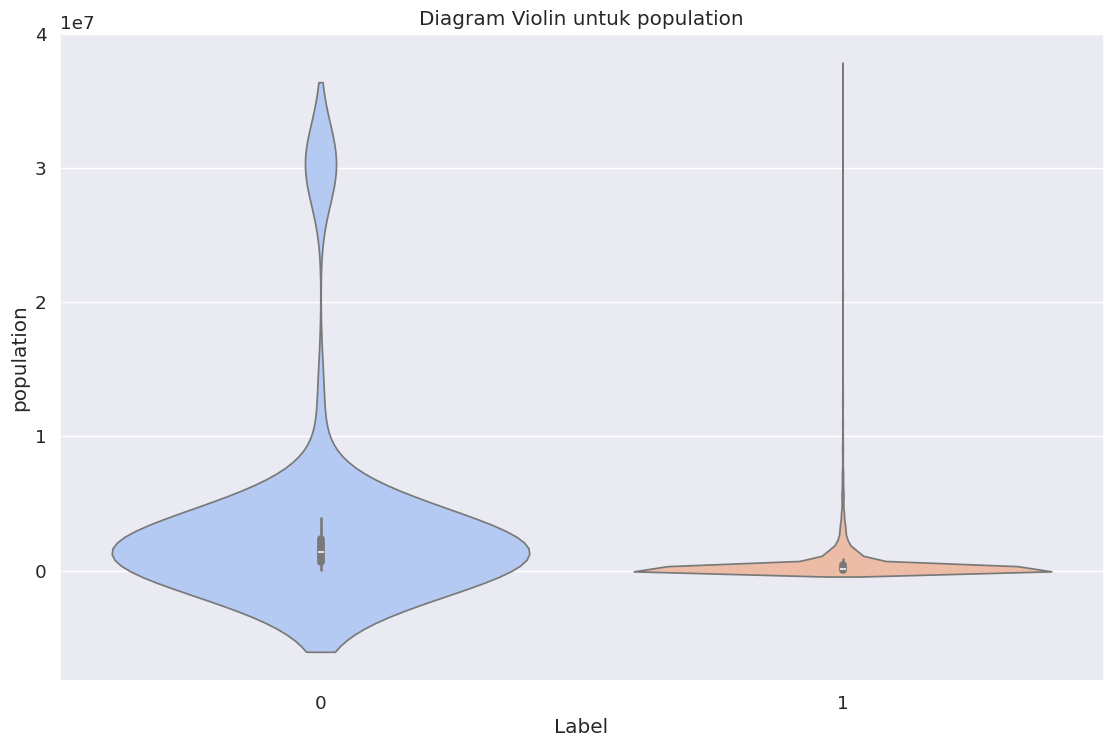

<ipython-input-23-de78a1391a4a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=kolom_target, y=column, data=df, palette="coolwarm")


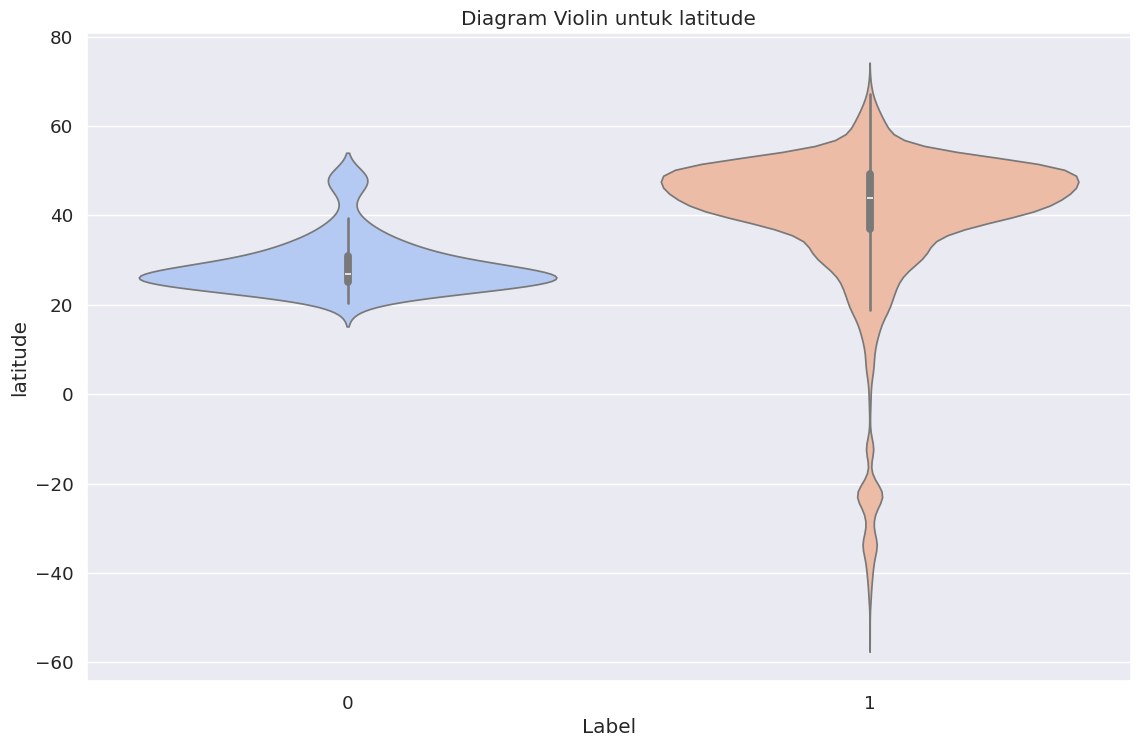

<ipython-input-23-de78a1391a4a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=kolom_target, y=column, data=df, palette="coolwarm")


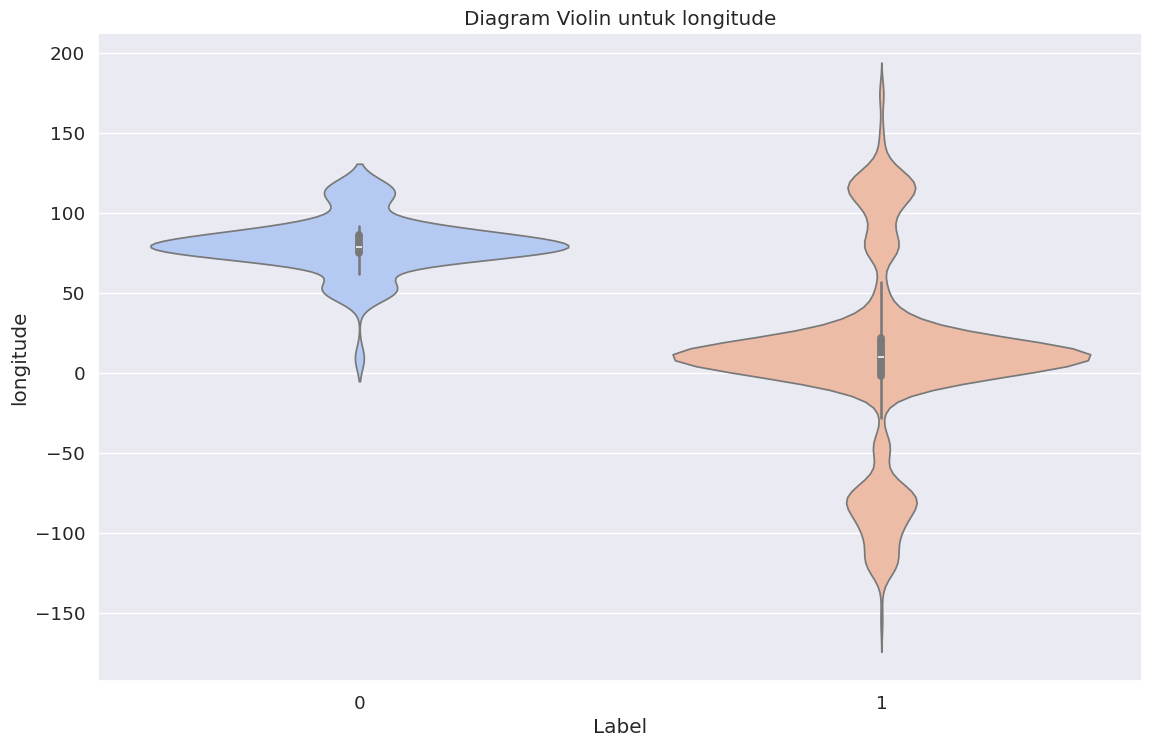

<ipython-input-23-de78a1391a4a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=kolom_target, y=column, data=df, palette="coolwarm")


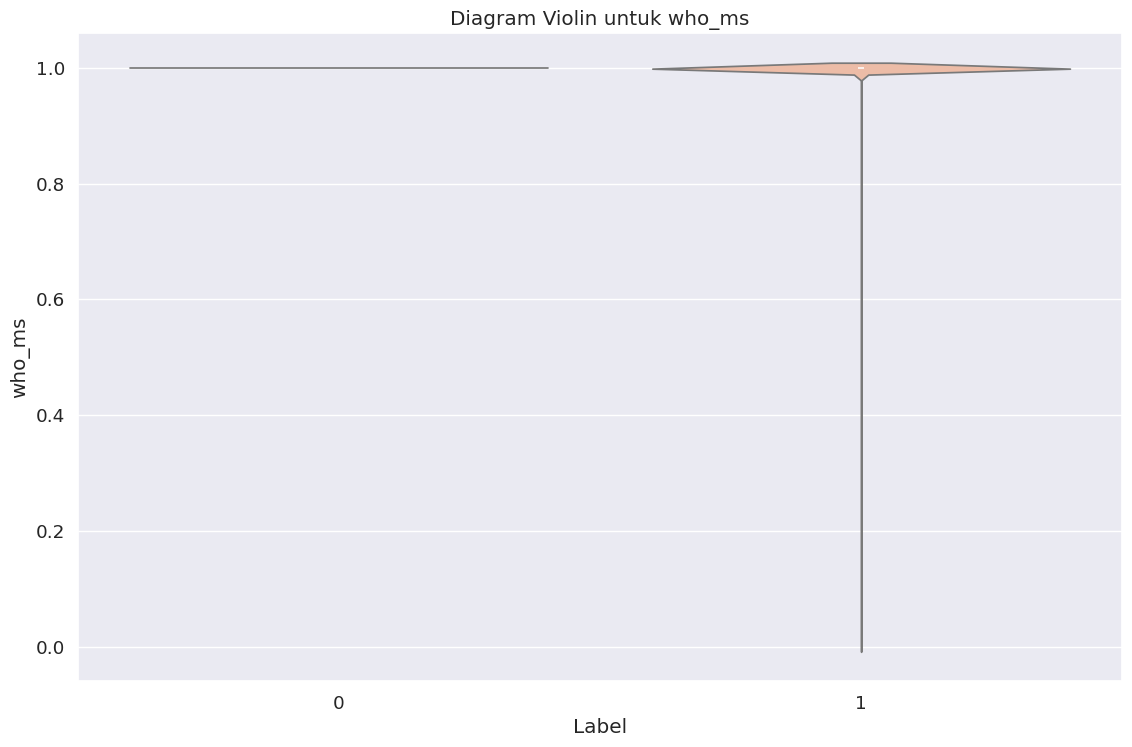

<ipython-input-23-de78a1391a4a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=kolom_target, y=column, data=df, palette="coolwarm")


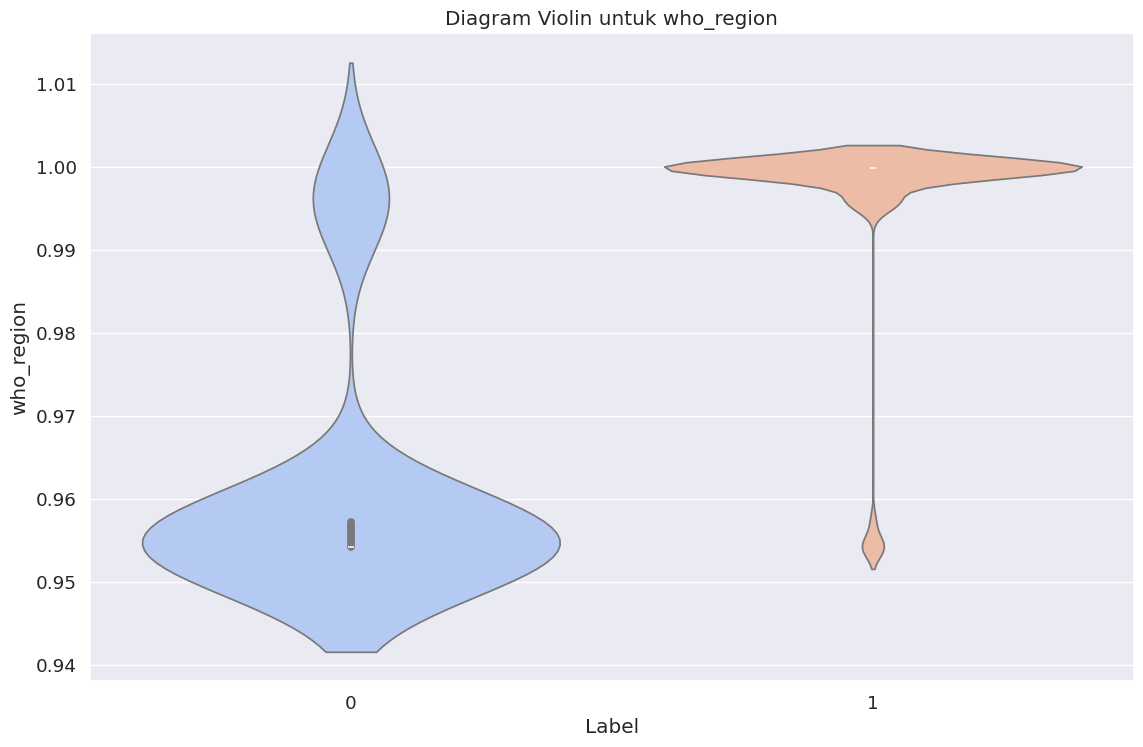

<ipython-input-23-de78a1391a4a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=kolom_target, y=column, data=df, palette="coolwarm")


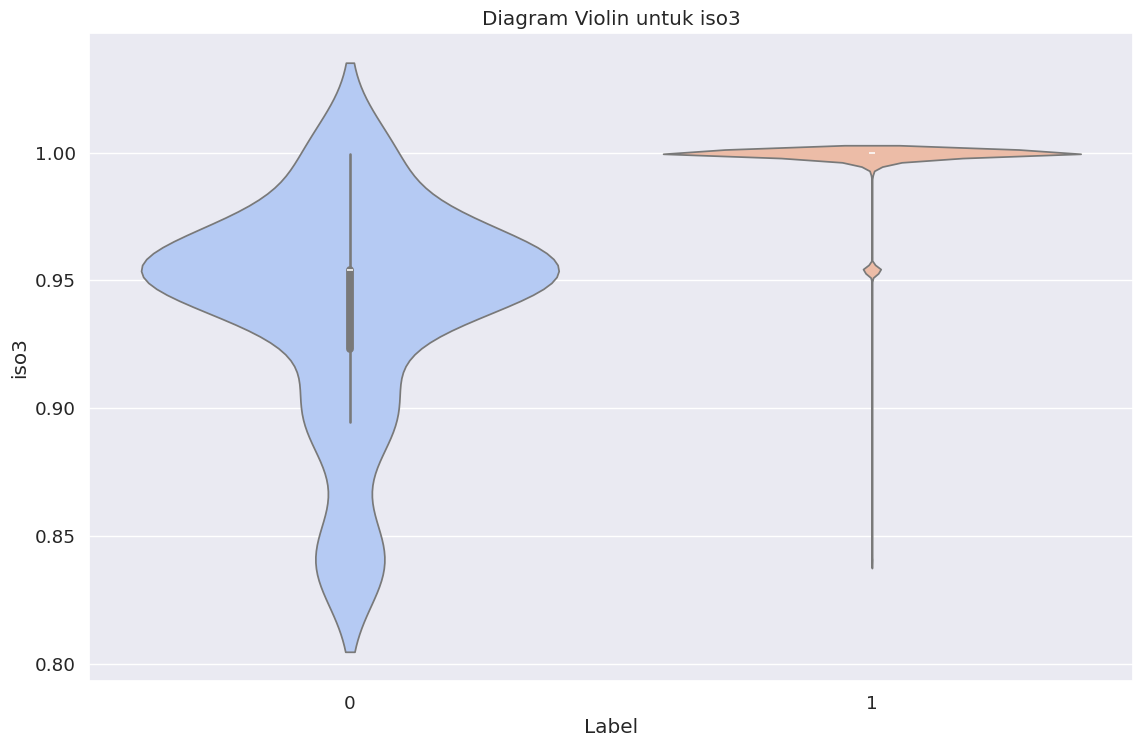

<ipython-input-23-de78a1391a4a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=kolom_target, y=column, data=df, palette="coolwarm")


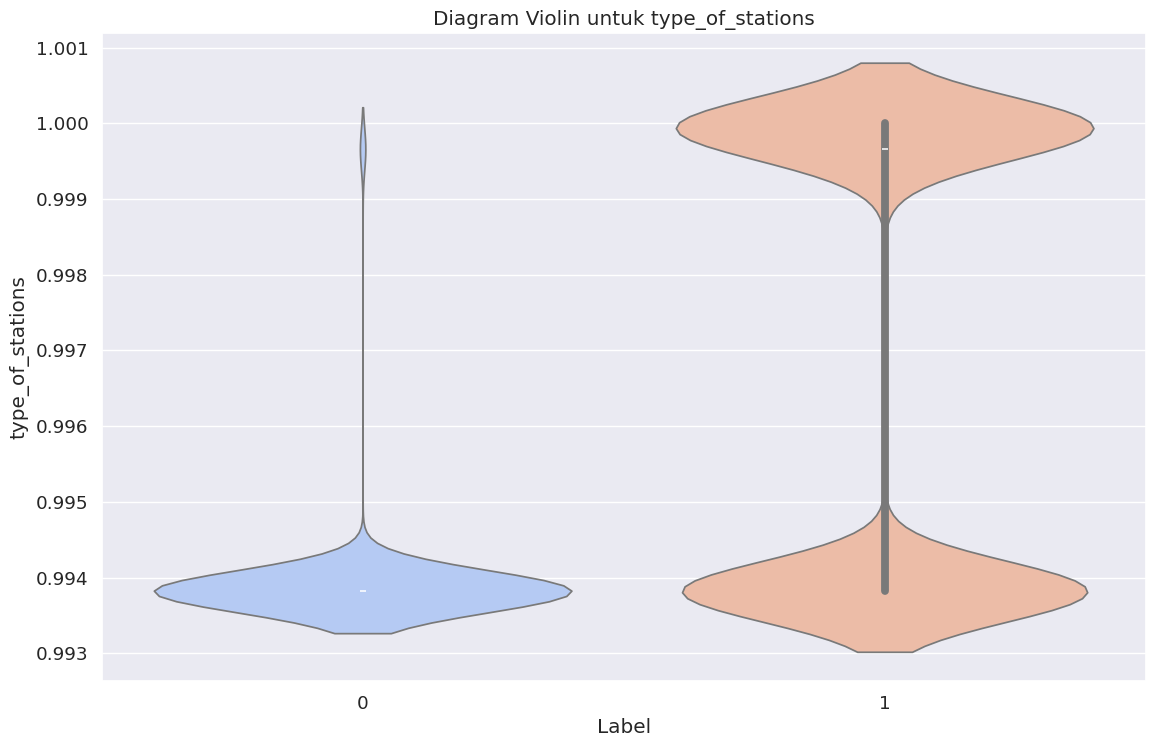

In [ ]:
# Loop untuk setiap variabel fitur kecuali kolom_target
for column in df.columns:
    # Lewati kolom kolom_target dan kolom yang bukan numerik
    if column != kolom_target and df[column].dtype != 'object':
        # Set up ukuran dan gaya plot
        plt.figure(figsize=(12, 8))
        sns.set(font_scale=1.2)

        # Buat diagram violin
        sns.violinplot(x=kolom_target, y=column, data=df, palette="coolwarm")

        # Tambahkan judul dan label sumbu
        plt.title(f'Diagram Violin untuk {column}')
        plt.xlabel('Label')
        plt.ylabel(column)

        # Tampilkan plot
        plt.show()

#**B. EXPLORATORY DATA ANALYSIS FOR DATA TESTING**

#**1. IMPORT DATA**

###1.1 Baca Data

In [ ]:
df_test = pd.read_csv(test_path)
df_test.head()

year  pm10_concentration  pm25_concentration  no2_concentration  \
0  2018           13.607092            9.717848          13.000000   
1  2018           94.784784           50.050000          24.668984   
2  2018           47.000000           25.000000          38.956828   
3  2018           46.026112           31.802000          28.027288   
4  2018           22.641000           12.489000          31.348000   

   pm10_tempcov  pm25_tempcov  no2_tempcov  number_of_stations  population  \
0        92.212        90.400       95.728                   1      136727   
1        91.640        92.000       91.956                   1      522062   
2        86.496        82.056       87.504                   1     5179479   
3        92.888        96.000       93.068                   1       50422   
4        94.000        97.000       99.000                   4      895431   

    latitude   longitude  who_ms  who_region     iso3  type_of_stations  
0  47.210826    7.786322       1    0.999942  1.00000          0.993819  
1  32.299925  118.311925       1    0.995975  0.99633          0.993819  
2  20.666700 -103.333300       1    1.000000  1.00000          0.993819  
3  45.688600   85.118600       1    0.995975  0.99633          0.993819  
4  44.381175    5.930100       1    0.999942  1.00000          1.000000

##1.2 Informasi Data

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14005 entries, 0 to 14004
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                14005 non-null  int64  
 1   pm10_concentration  14005 non-null  float64
 2   pm25_concentration  14005 non-null  float64
 3   no2_concentration   14005 non-null  float64
 4   pm10_tempcov        14005 non-null  float64
 5   pm25_tempcov        14005 non-null  float64
 6   no2_tempcov         14005 non-null  float64
 7   number_of_stations  14005 non-null  int64  
 8   population          14005 non-null  int64  
 9   latitude            14005 non-null  float64
 10  longitude           14005 non-null  float64
 11  who_ms              14005 non-null  int64  
 12  who_region          14005 non-null  float64
 13  iso3                14005 non-null  float64
 14  type_of_stations    14005 non-null  float64
dtypes: float64(11), int64(4)
memory usage: 1.6 MB


#**2. RINGKASAN STATISTIK**

In [ ]:
df_test.describe()

year  pm10_concentration  pm25_concentration  \
count  14005.000000        14005.000000        14005.000000   
mean    2019.510746           29.365522           16.144701   
std        1.034662           26.977140           12.761611   
min     2018.000000            1.700000            1.016000   
25%     2019.000000           14.880000            8.494256   
50%     2019.000000           19.700000           11.370692   
75%     2020.000000           31.849000           18.975156   
max     2022.000000          369.600000          137.000000   

       no2_concentration  pm10_tempcov  pm25_tempcov   no2_tempcov  \
count       14005.000000  14005.000000  14005.000000  14005.000000   
mean           18.592362     85.315365     82.606501     83.889463   
std            43.827389     22.346640     23.990940     23.971072   
min             0.002000      0.000000      0.000000      0.000000   
25%             9.679000     84.364000     78.184000     84.720000   
50%            15.280980     94.608000     93.368000     94.000000   
75%            22.409000     98.000000     98.000000     97.400000   
max          3670.314000    100.000000    100.000000    100.000000   

       number_of_stations    population      latitude     longitude  \
count        14005.000000  1.400500e+04  14005.000000  14005.000000   
mean             1.429704  5.027478e+05     40.853818     14.547747   
std              1.970071  1.456173e+06     14.667113     56.940803   
min              1.000000  5.000000e+00    -53.158300   -159.366240   
25%              1.000000  8.446500e+04     37.584900      0.227200   
50%              1.000000  1.201420e+05     43.822800     11.904500   
75%              1.000000  3.715910e+05     49.118267     26.265200   
max             59.000000  3.739313e+07     69.655250    176.883422   

             who_ms    who_region          iso3  type_of_stations  
count  14005.000000  14005.000000  14005.000000      14005.000000  
mean       0.998715      0.997750      0.998353          0.998050  
std        0.035829      0.008463      0.008095          0.002798  
min        0.000000      0.954276      0.840317          0.993819  
25%        1.000000      0.999942      0.999527          0.993819  
50%        1.000000      0.999942      1.000000          1.000000  
75%        1.000000      0.999942      1.000000          1.000000  
max        1.000000      1.000000      1.000000          1.000000

#**3. EKSPLORASI DATA**

###3.1 Boxplot

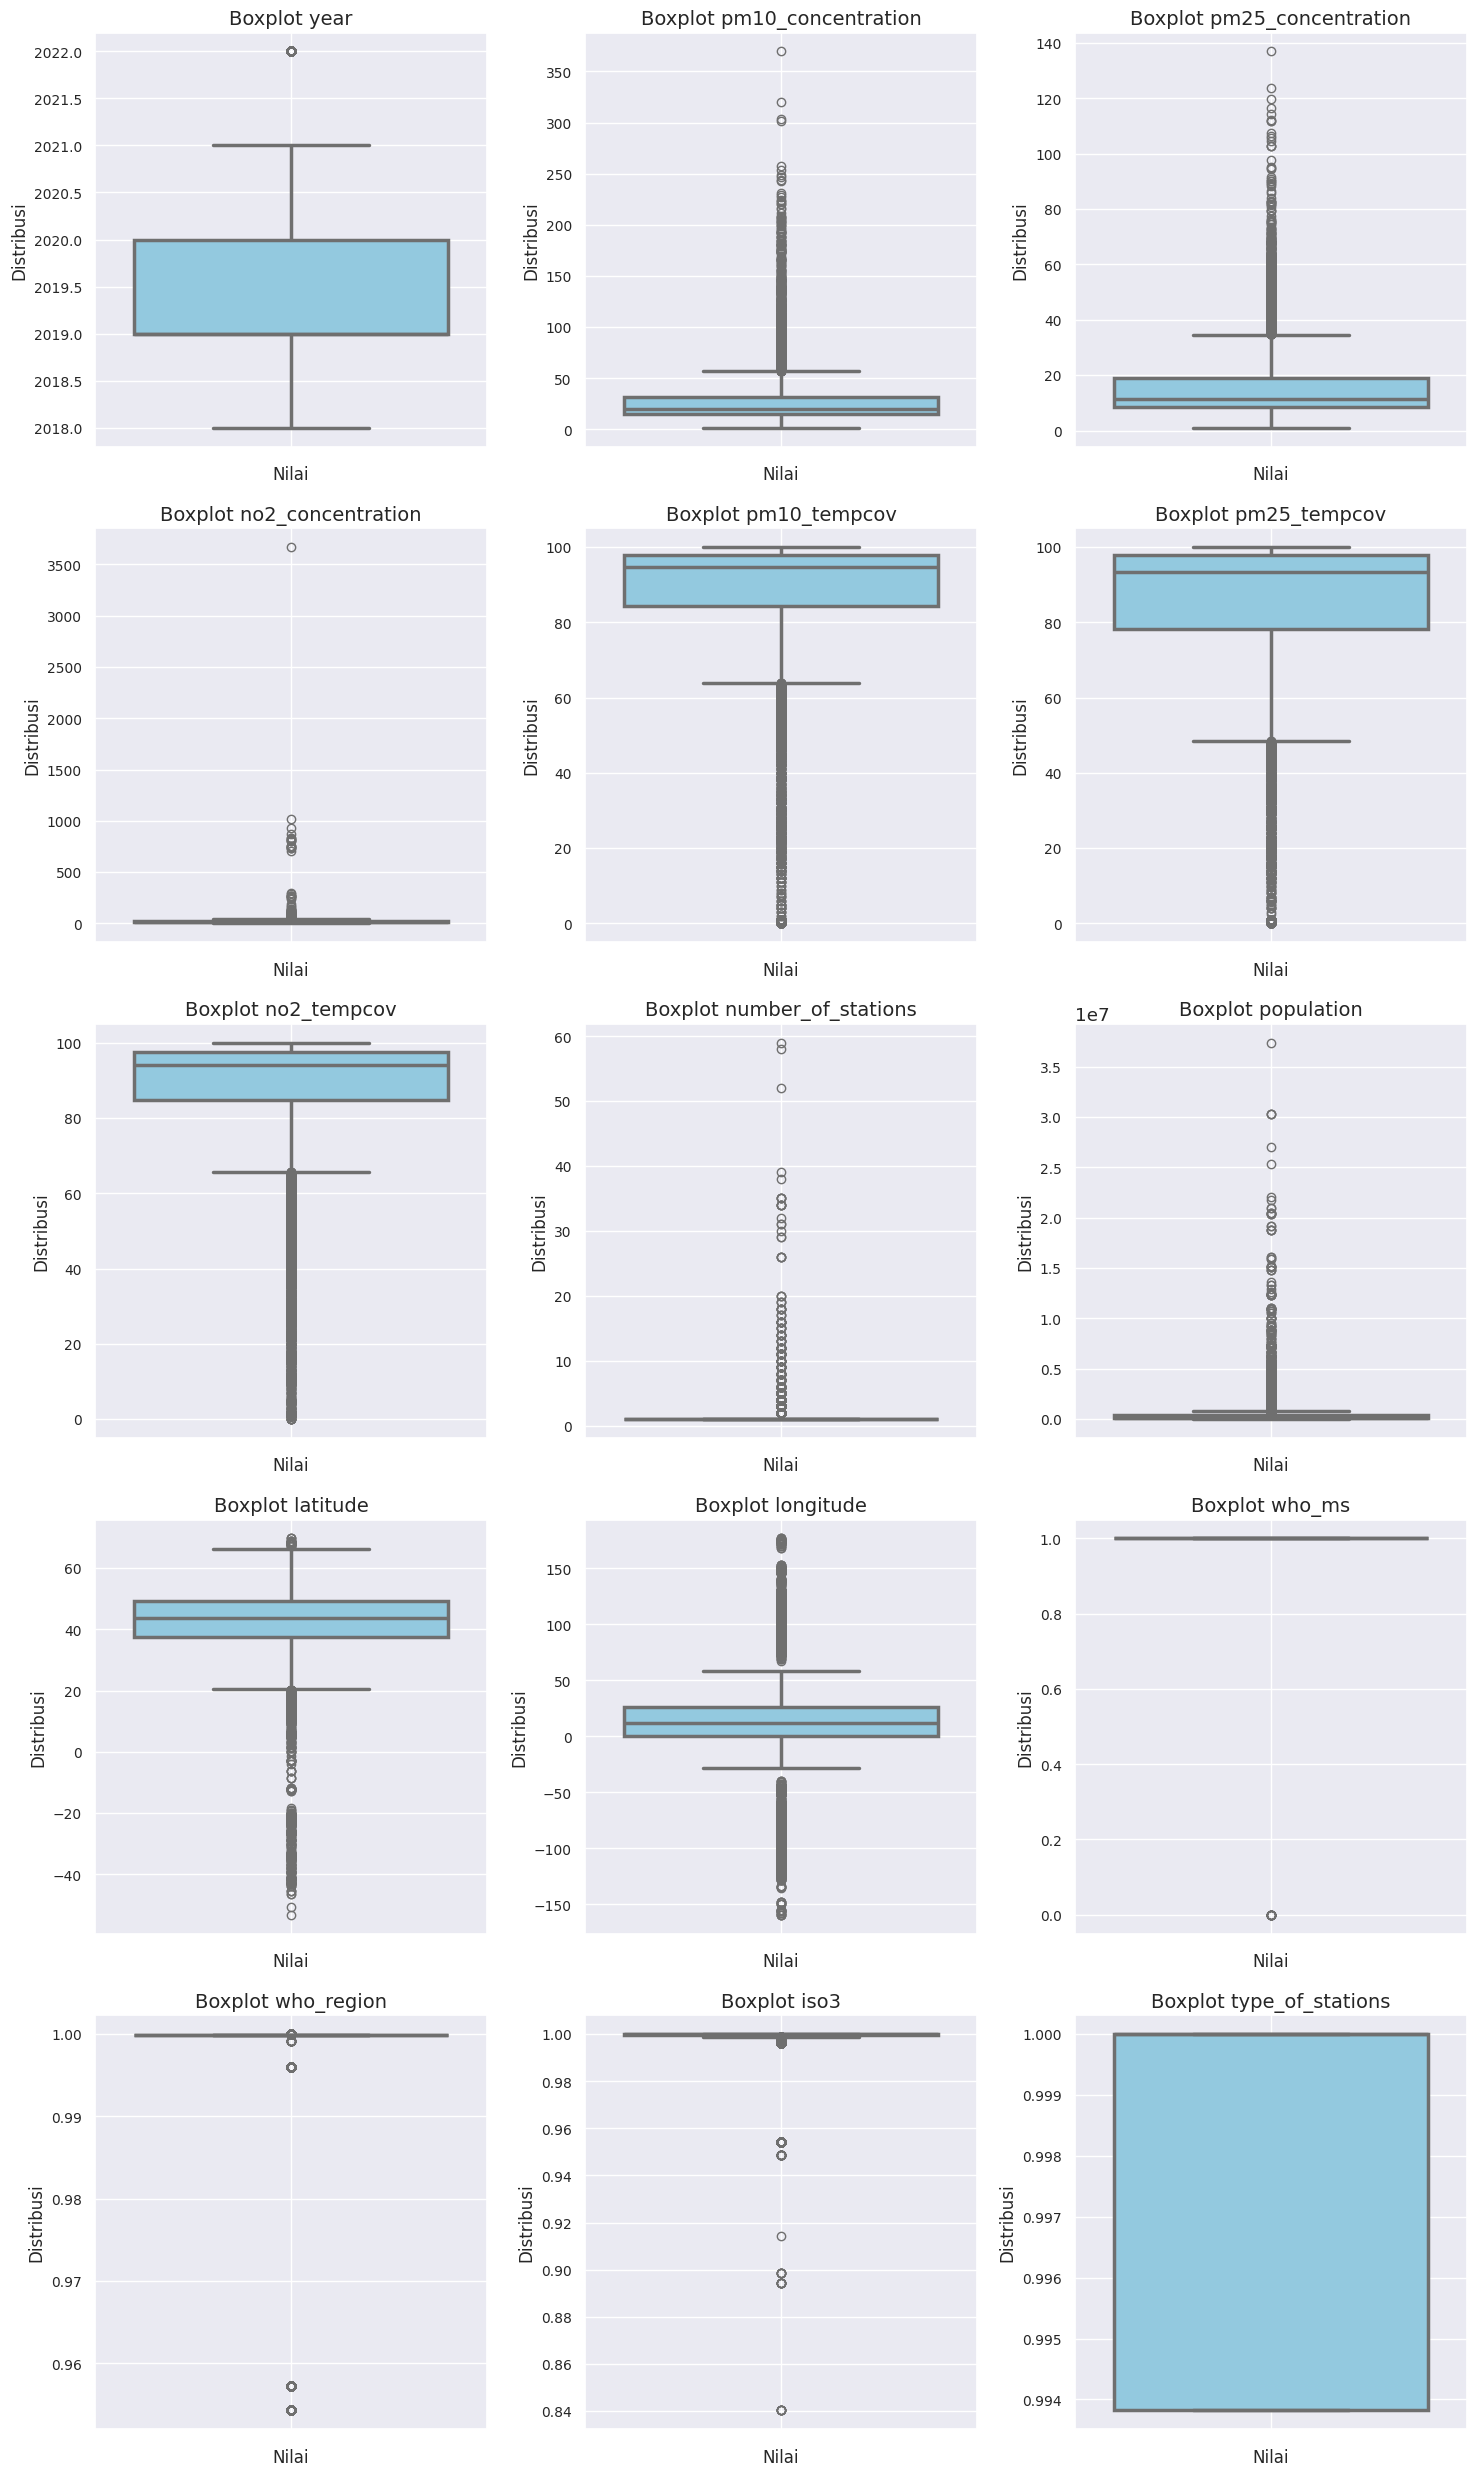

In [ ]:
# Menentukan jumlah baris dan kolom subplot yang sesuai
num_rows_test = (len(df_test.columns) - 1) // 3 + 1
num_cols_test = min(len(df_test.columns), 3)

# Membuat satu figure untuk semua boxplot
plt.figure(figsize=(15, 5 * num_rows_test))

# Iterasi melalui setiap kolom dan membuat boxplot di subplot yang sesuai
for i, column in enumerate(df_test.columns, 1):
    plt.subplot(num_rows_test, num_cols_test, i)
    sns.boxplot(data=df_test[column], color='skyblue', linewidth=2.5)
    plt.title(f'Boxplot {column}', fontsize=14)
    plt.xlabel('Nilai', fontsize=12)
    plt.ylabel('Distribusi', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)  # Rotasi label sumbu x agar lebih mudah dibaca
    plt.yticks(fontsize=10)  # Ukuran font untuk label sumbu y
    plt.grid(True)  # Menambahkan grid

plt.tight_layout()
plt.show()

###3.2 Histogram

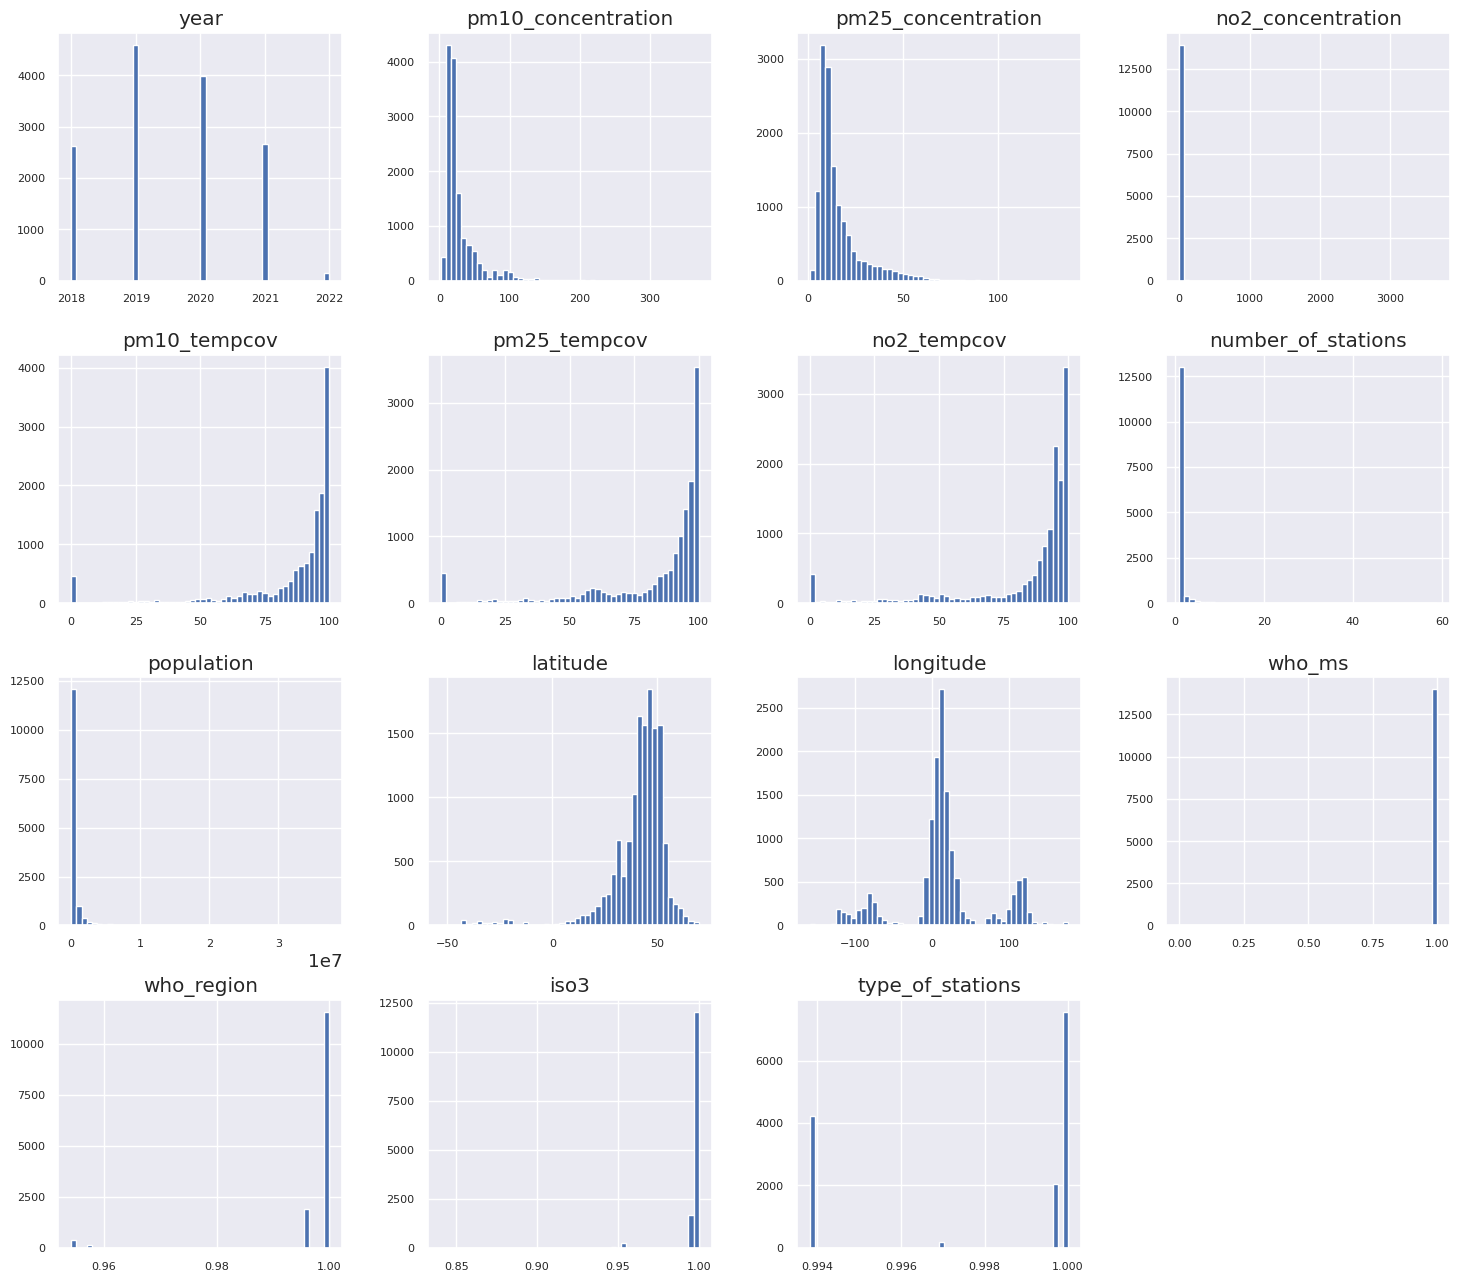

In [ ]:
# Histogram data numerik
df_test.hist(figsize=(16, 15), bins=50, xlabelsize=8, ylabelsize=8);

###3.3 Heatmap

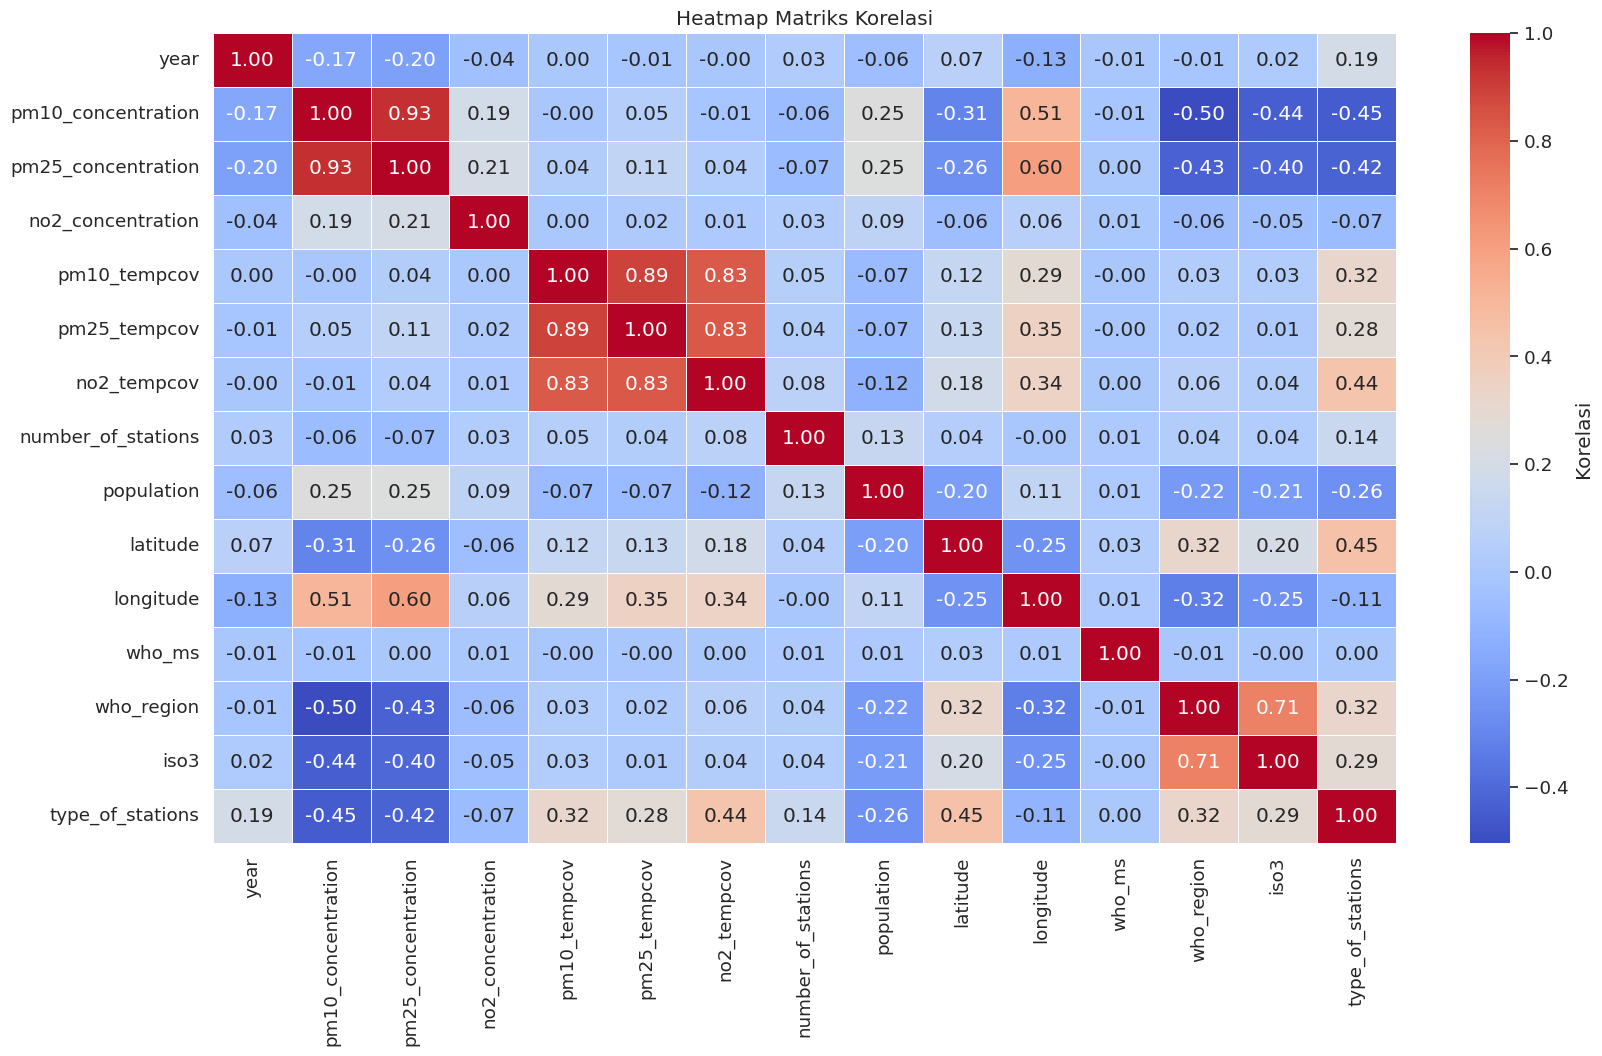

In [ ]:
# Matriks korelasi
correlation_matrix_test = df_test.corr()

# Set up ukuran dan gaya plot
plt.figure(figsize=(17, 10))
sns.set(font_scale=1.2)

# Buat heatmap
sns.heatmap(correlation_matrix_test,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.5,
            cbar_kws={'label': 'Korelasi'})

# Tambahkan judul
plt.title('Heatmap Matriks Korelasi')

# Tampilkan plot
plt.show()

###3.4 Pair Plot

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


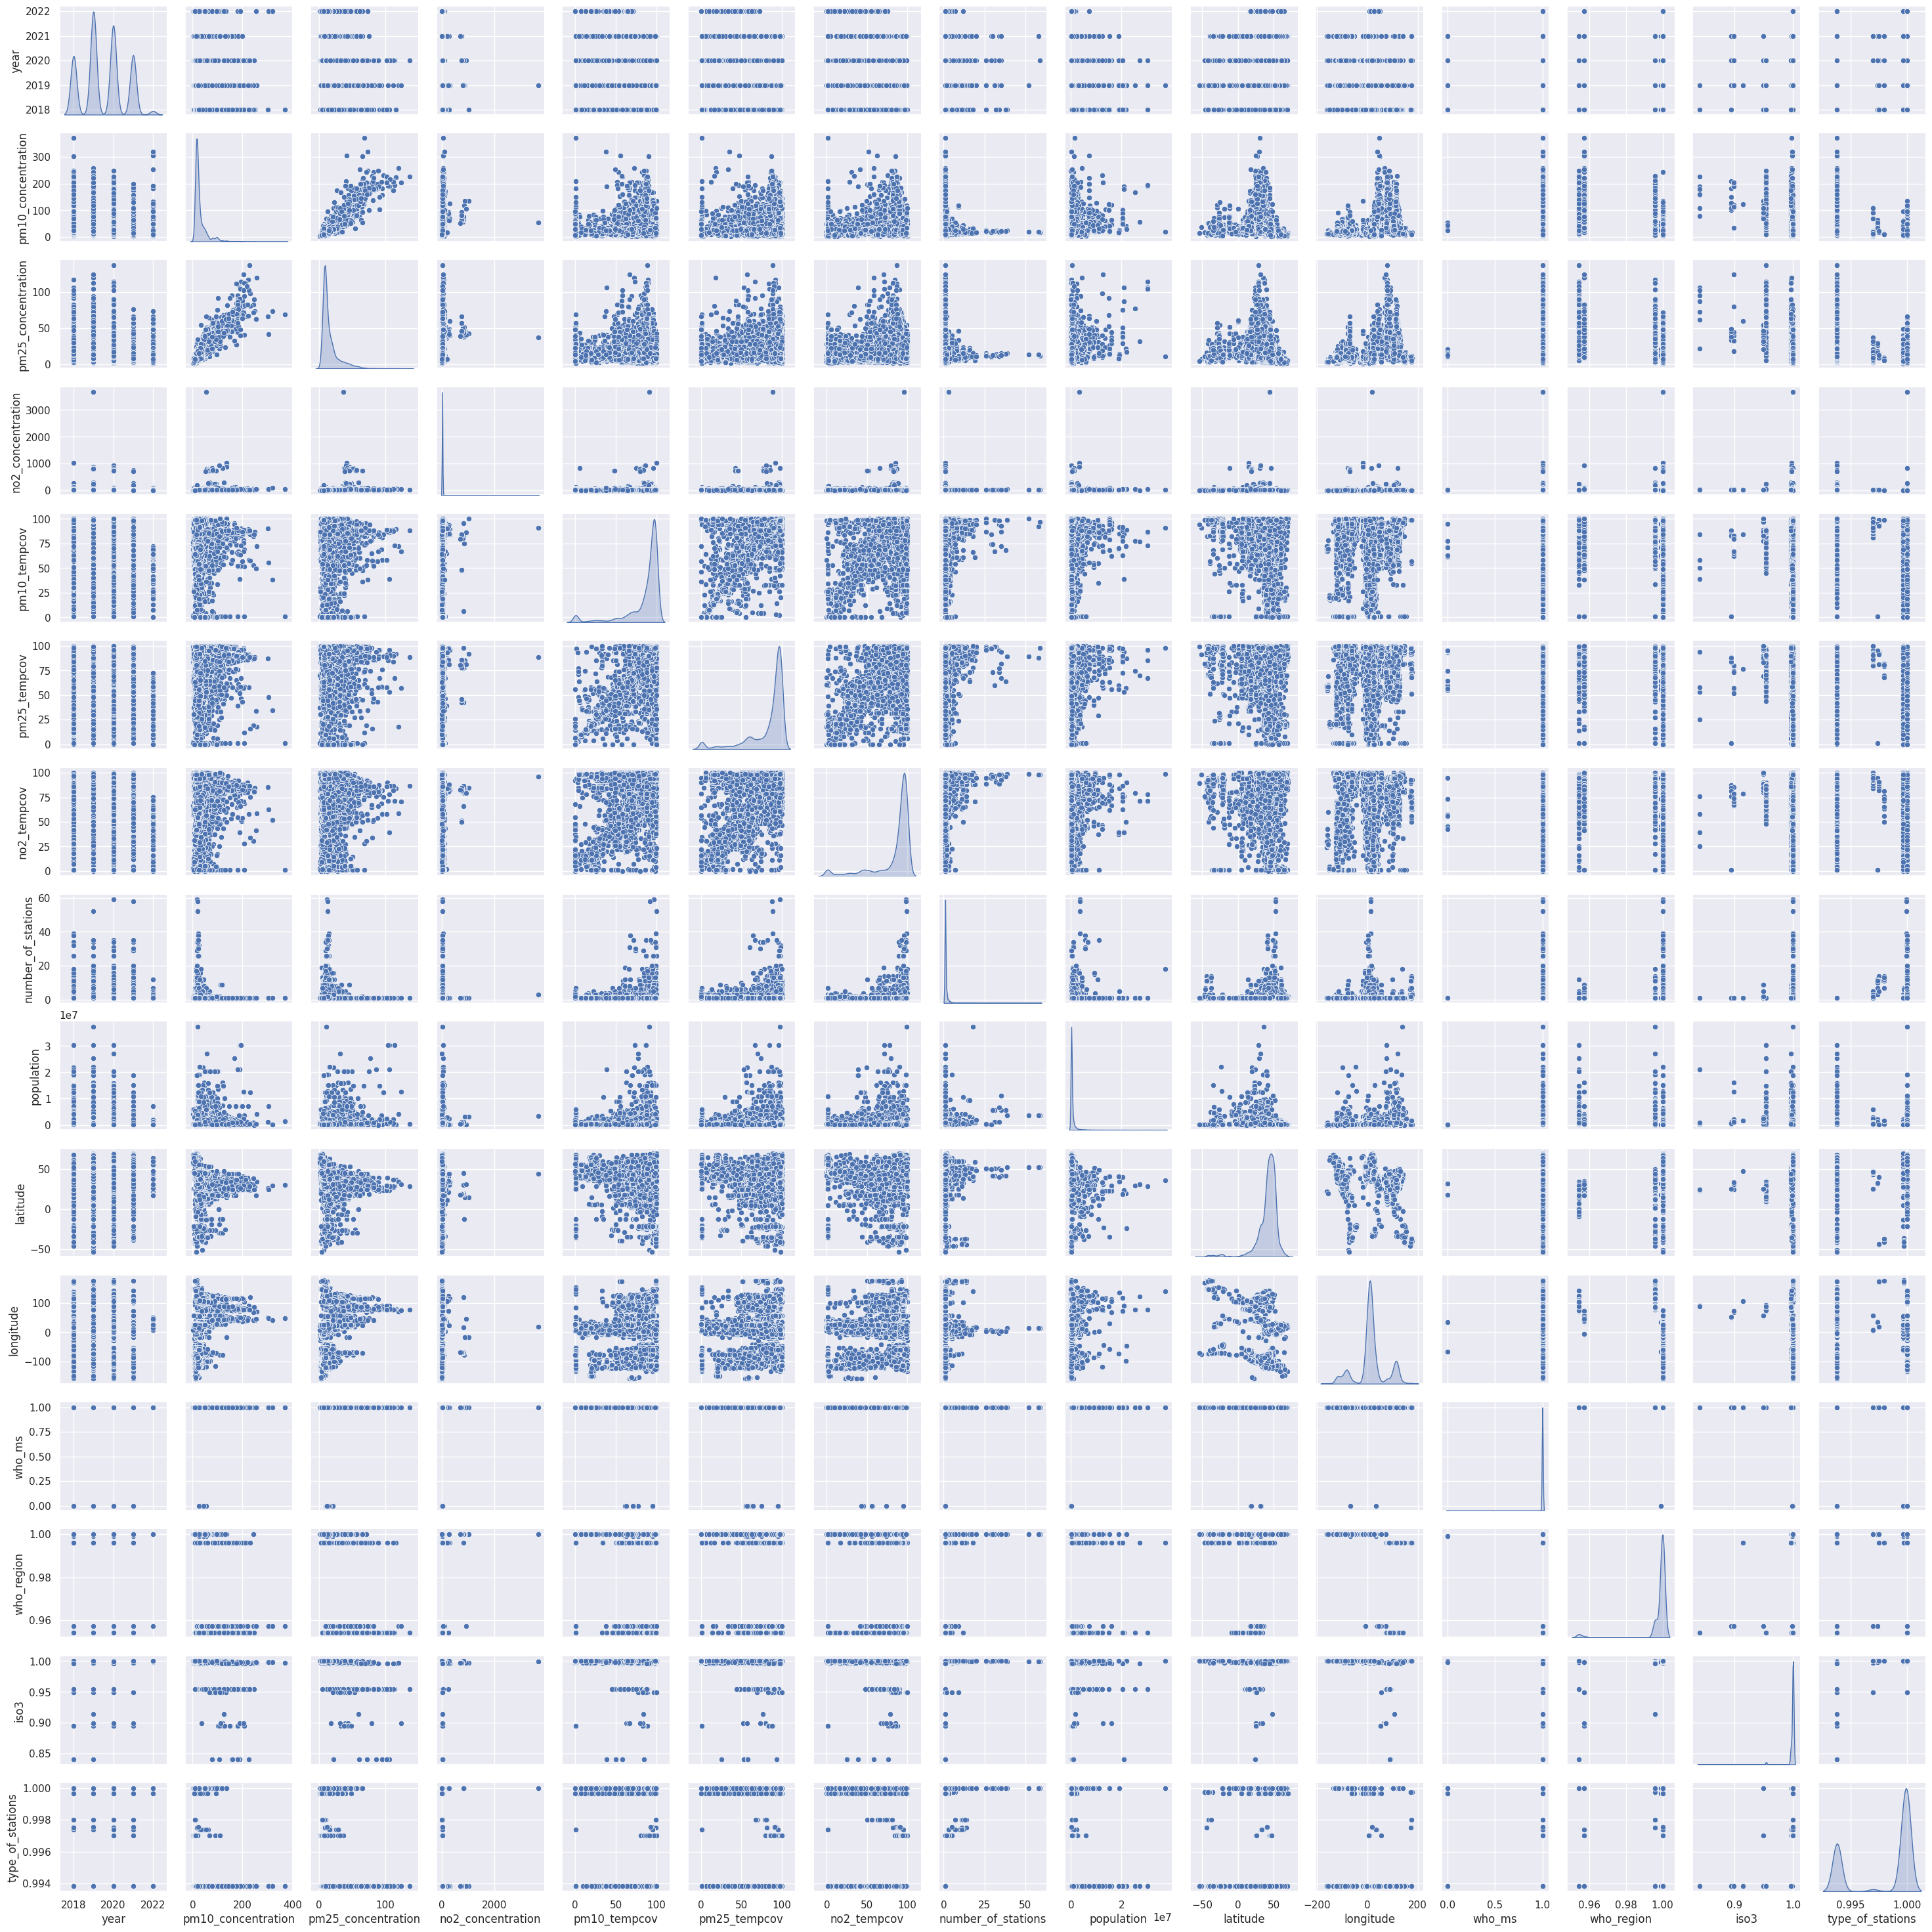

In [ ]:
sns.set()
sns.pairplot(df_test,size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

# TAHAPAN 3: MODELLING

#### Installing Optuna
Optuna is an open source hyperparameter optimization framework to automate hyperparameter search https://optuna.org/

It is a much better option than traditional GridSearchCV or RandomSearchCV.

It can automatically search for optimal hyperparameters using Python conditionals, loops, and syntax.

You can read the documentation here - https://optuna.readthedocs.io/en/stable/

In [ ]:
!pip install optuna optuna-integration

In [ ]:
import optuna
optuna.logging.set_verbosity(optuna.logging.ERROR)

from optuna.distributions import IntDistribution, FloatDistribution
from optuna.exceptions import ExperimentalWarning
from optuna.integration import OptunaSearchCV

warnings.filterwarnings('ignore', category=ExperimentalWarning)

#### Modelling Strategy
1. We will train a high number of models (e.g. 100) on a different random sample of the training data
2. Each random sample consists of all the negative samples from training data and 100 random positive samples
3. We do hyperparameter tuning for 50 trials using optuna on this set for each of the model and the best version of this model is chosen
4. From the 100 best chosen models, we remove the "bad" ones with less than 50% f1 score.
5. Using Precision-Recall curve the best probability threshold for the classification will be chosen
5. The ensemble will be validated on the validation set using the best threshold

In [ ]:
# Callback method used by optuna to save the best model after each trial
def callback(study, trial):
    if study.best_trial.number == trial.number:
        study.set_user_attr(key="best_estimator", value=trial.user_attrs["best_estimator"], callbacks=[callback])

In [ ]:
# Parameter grid for the Gradient Boosting Classifier model
# For definitions of the params check here - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
gbc_param_grid = {
    "n_estimators": IntDistribution(1, 50),
    "learning_rate": FloatDistribution(1e-4, 0.3, log=True),
    "max_depth": IntDistribution(3, 12),
    "subsample": FloatDistribution(0.1, 1.0),
    "max_features": IntDistribution(1, 10),
    "min_samples_split": FloatDistribution(0.1, 1.0),
    'min_samples_leaf': IntDistribution(3, 50),
}


def objective(trial):
    # Separate positive and negative class samples
    positive_samples = training_frame[training_frame['Air_quality_category'] == 0]
    negative_samples = training_frame[training_frame['Air_quality_category'] == 1].sample(100)

    # Combine positive and negative samples
    frame = pd.concat([negative_samples, positive_samples])
    x, y = frame.drop(['Air_quality_category'], axis=1), frame['Air_quality_category']

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

    model = GradientBoostingClassifier(loss='log_loss', validation_fraction=0.1, n_iter_no_change=5)
    dt_grid = OptunaSearchCV(model, gbc_param_grid, cv=5, n_trials=50, scoring='f1', n_jobs=-1)
    dt_grid.fit(X_train, y_train)

    # Evaluate the model
    best_estimator = dt_grid.best_estimator_
    y_pred = best_estimator.predict(X_test)
    trial.set_user_attr(key="best_estimator", value=best_estimator)

    precision = precision_score(y_test, y_pred, zero_division=0.0)
    recall = recall_score(y_test, y_pred, zero_division=0.0)
    trial.set_user_attr(key="precision", value=precision)
    trial.set_user_attr(key="recall", value=recall)

    f1 = f1_score(y_test, y_pred, zero_division=0.0)
    return f1

In [ ]:
%%time

# We use the dask client to parallelize model training
# https://optuna.readthedocs.io/en/stable/tutorial/10_key_features/004_distributed.html
!pip install "dask[distributed]" --upgrade
from dask.distributed import Client
from dask.distributed import wait
import dask

dask.config.set({'distributed.worker.daemon': False})

# Initialize a list to store the models
metrics = ['precision', 'recall', 'f1']
results = pd.DataFrame(columns=metrics)
models = []

# Define the number of models in the ensemble
n_models = 150

with (Client() as client):
    print(f"Dask dashboard is available at {client.dashboard_link}")
    storage = optuna.integration.dask.DaskStorage()
    study = optuna.create_study(storage=storage, direction="maximize")
    futures = [
        client.submit(study.optimize, objective, n_trials=1, pure=False) for _ in range(n_models)
    ]
    wait(futures)
    for i, trial in enumerate(study.trials):
        precision, recall, f1 = trial.user_attrs['precision'], trial.user_attrs[
            'recall'], trial.value
        results.loc[f"Model {i + 1}"] = precision, recall, f1
        models.append(trial.user_attrs['best_estimator'])

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:42583
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:38343'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43439'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:37465', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:37465
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:51110
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:36547', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:36547
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:51114
INFO:distributed.scheduler:Receive c

Dask dashboard is available at http://127.0.0.1:8787/status


INFO:distributed.scheduler:Receive client connection: Client-worker-df35835f-8e0f-11ef-8707-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:51172
INFO:distributed.scheduler:Receive client connection: Client-worker-df39ad07-8e0f-11ef-870a-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:51174
INFO:distributed.scheduler:Remove client Client-db47129a-8e0f-11ef-b7b7-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:51128; closing.
INFO:distributed.scheduler:Remove client Client-db47129a-8e0f-11ef-b7b7-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-db47129a-8e0f-11ef-b7b7-0242ac1c000c
INFO:distributed.scheduler:Retire worker addresses (0, 1)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:38343'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:43439'. Re

CPU times: user 2min 33s, sys: 18.9 s, total: 2min 52s
Wall time: 26min 55s


In [ ]:
results

precision    recall        f1
Model 1     1.000000  0.935484  0.966667
Model 2     0.937500  0.967742  0.952381
Model 3     1.000000  0.935484  0.966667
Model 4     1.000000  1.000000  1.000000
Model 5     0.688889  1.000000  0.815789
...              ...       ...       ...
Model 146   1.000000  1.000000  1.000000
Model 147   0.688889  1.000000  0.815789
Model 148   0.935484  0.935484  0.935484
Model 149   0.939394  1.000000  0.968750
Model 150   0.885714  1.000000  0.939394

[150 rows x 3 columns]

In [ ]:
# remove bad models
for i, model in enumerate(models):
    # Filter bad models
    model_f1 = results.iloc[i]['f1']
    if model_f1 < 0.5:
        models.remove(model)
        results.drop(results.index[i], inplace=True)

In [ ]:
print(f'Remaining models {len(models)}')

Remaining models 150


# TAHAPAN 4: MODEL EVALUATION

In [ ]:
# Make predictions with the ensemble
def ensemble_predict(models, X, threshold=0.5):
    probs = np.zeros((X.shape[0], len(models)))
    for i, model in enumerate(models):
        probs[:, i] = model.predict_proba(X)[:, 1]
    preds = (np.mean(probs, axis=1) > threshold).astype(int)
    mean_probs = probs.mean(axis=1)
    return preds, mean_probs

In [ ]:
# Verify the metrics on the ensemble on the validation data
X_test = validation_frame.drop('Air_quality_category', axis=1)
y_test = validation_frame['Air_quality_category']
y_pred, mean_probs = ensemble_predict(models, X_test)
precision_ensemble = precision_score(y_test, y_pred, zero_division=0.0)
recall_ensemble = recall_score(y_test, y_pred, zero_division=0.0)
f1_ensemble = f1_score(y_test, y_pred, zero_division=0.0)

print(confusion_matrix(y_test, y_pred))
print(f"Ensemble {metrics} = {precision_ensemble}, {recall_ensemble}, {f1_ensemble}")

[[  31    0]
 [  68 2524]]
Ensemble ['precision', 'recall', 'f1'] = 1.0, 0.9737654320987654, 0.9867083659108679


#### Choosing the best threshold
By default the model chooses 50% as the threshold for the predictions.
We will use the Precision-Recall curve to choose the best threshold that maximizes the F1 score

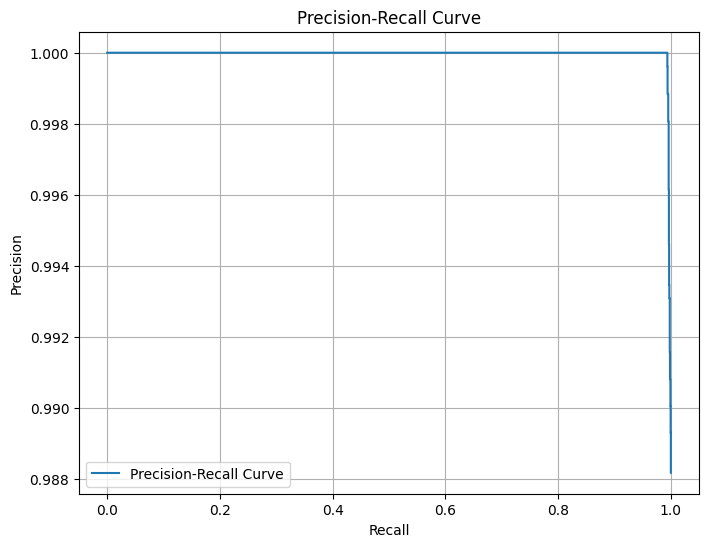

Best Threshold: 0.2462474278097551


In [ ]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt


# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, mean_probs)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Find the index of the threshold corresponding to the highest F1 score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]
print(f'Best Threshold: {best_threshold}')

#### Saving the model
We can pickle the models together in one file for later use

In [ ]:
import joblib
from sklearn.base import BaseEstimator, ClassifierMixin


class CustomEnsemble(BaseEstimator, ClassifierMixin):
    def __init__(self, models):
        self.models = models
        # feature_names_in_ available only if feature names are strings
        # self.features = models[0].feature_names_in_
        self.best_threshold = best_threshold

    def predict_proba(self, X):
        predictions = np.zeros((X.shape[0], len(self.models)))
        for i, model in enumerate(self.models):
            predictions[:, i] = model.predict_proba(X)[:, 1]  # assuming binary classification
        ensemble_prediction_proba = np.mean(predictions, axis=1)
        return np.column_stack(
            (1 - ensemble_prediction_proba, ensemble_prediction_proba))  # return probabilities for both classes

    def predict(self, X):
        probabilities = self.predict_proba(X)[:, 1]
        return (probabilities >= self.best_threshold).astype(int)

    def feature_importances_(self):
        # Feature importance is the average of feature importances for all the models
        feature_importances = np.zeros(self.models[0].feature_importances_.shape)
        for model in self.models:
            feature_importances += model.feature_importances_
        return feature_importances / len(self.models)


ensemble_model3 = CustomEnsemble(models)

# Save the ensemble model to a single file
joblib.dump(ensemble_model3, 'ensemble_model4.pkl')

['ensemble_model4.pkl']

In [ ]:
y_pred2 = ensemble_model3.predict(df_test)

In [ ]:
result_df1 = df_test.copy()  # Salin df_test untuk menyimpan hasil prediksi
result_df1['Predicted_Air_quality_category'] = y_pred2  # Tambahkan kolom hasil prediksi

result_df1 = result_df1.drop(['year', 'pm10_concentration', 'pm25_concentration', 'no2_concentration',
       'pm10_tempcov', 'pm25_tempcov', 'no2_tempcov', 'number_of_stations',
       'population', 'latitude', 'longitude', 'who_ms', 'who_region', 'iso3',
       'type_of_stations'], axis=1)

submit2 = pd.DataFrame({
    'DataId': raw_test['DataId'],
    'Air_quality_category': result_df1['Predicted_Air_quality_category']
})
submit2

DataId  Air_quality_category
0       26095                     1
1       26096                     1
2       26097                     1
3       26098                     1
4       26099                     1
...       ...                   ...
14000   24057                     1
14001   24114                     1
14002   24125                     1
14003   24347                     1
14004   24878                     0

[14005 rows x 2 columns]

In [ ]:
submit2.replace({1: "Safety", 0: "Dangerous"}, inplace=True)
submit2

DataId Air_quality_category
0       26095               Safety
1       26096               Safety
2       26097               Safety
3       26098               Safety
4       26099               Safety
...       ...                  ...
14000   24057               Safety
14001   24114               Safety
14002   24125               Safety
14003   24347               Safety
14004   24878            Dangerous

[14005 rows x 2 columns]

In [ ]:
submit2.to_csv('submit5.csv', index=False, sep=',')

Here we can see a significant improvement in the metrics

In [ ]:
feature_importances = ensemble_model3.feature_importances_() * 100.0
pd.DataFrame(data=feature_importances, columns=["Feature Importance"]).sort_values(by="Feature Importance", ascending=False)

Feature Importance
1            33.656357
2            31.985314
13           10.996951
10            5.295917
12            4.438670
3             2.403782
9             1.614008
8             1.182194
4             0.794122
6             0.706083
0             0.424220
14            0.257893
5             0.242286
7             0.002201
11            0.000000